## Problem Statement

### Context

AllLife Bank is a US bank that has a growing customer base. The majority of these customers are liability customers (depositors) with varying sizes of deposits. The number of customers who are also borrowers (asset customers) is quite small, and the bank is interested in expanding this base rapidly to bring in more loan business and in the process, earn more through the interest on loans. In particular, the management wants to explore ways of converting its liability customers to personal loan customers (while retaining them as depositors).

A campaign that the bank ran last year for liability customers showed a healthy conversion rate of over 9% success. This has encouraged the retail marketing department to devise campaigns with better target marketing to increase the success ratio.

You as a Data scientist at AllLife bank have to build a model that will help the marketing department to identify the potential customers who have a higher probability of purchasing the loan.

### Objective

To predict whether a liability customer will buy personal loans, to understand which customer attributes are most significant in driving purchases, and identify which segment of customers to target more.

### Data Dictionary
* `ID`: Customer ID
* `Age`: Customer’s age in completed years
* `Experience`: #years of professional experience
* `Income`: Annual income of the customer (in thousand dollars)
* `ZIP Code`: Home Address ZIP code.
* `Family`: the Family size of the customer
* `CCAvg`: Average spending on credit cards per month (in thousand dollars)
* `Education`: Education Level. 1: Undergrad; 2: Graduate;3: Advanced/Professional
* `Mortgage`: Value of house mortgage if any. (in thousand dollars)
* `Personal_Loan`: Did this customer accept the personal loan offered in the last campaign? (0: No, 1: Yes)
* `Securities_Account`: Does the customer have securities account with the bank? (0: No, 1: Yes)
* `CD_Account`: Does the customer have a certificate of deposit (CD) account with the bank? (0: No, 1: Yes)
* `Online`: Do customers use internet banking facilities? (0: No, 1: Yes)
* `CreditCard`: Does the customer use a credit card issued by any other Bank (excluding All life Bank)? (0: No, 1: Yes)

## Importing necessary libraries

In [ ]:
# Installing the libraries with the specified version.
!pip install numpy==1.25.2 pandas==2.2.2 matplotlib==3.7.1 seaborn==0.13.1 scikit-learn==1.2.2 sklearn-pandas==2.2.0 -q --user

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 18.2/18.2 MB 23.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 294.8/294.8 kB 5.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 9.6/9.6 MB 17.2 MB/s eta 0:00:00
  Consider adding this directory to PATH or, if you prefer to suppress this warning, use --no-warn-script-location.


In [ ]:
# for uszipcode package, install the below package
!pip install sqlalchemy-mate==2.0.0.0 uszipcode

  Preparing metadata (setup.py) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 57.0/57.0 kB 4.0 MB/s eta 0:00:00
  Created wheel for atomicwrites: filename=atomicwrites-1.4.1-py2.py3-none-any.whl size=6941 sha256=f9c83d07df2c2913a20c2daf7af54df0f4511ae719ad5b037b76722408ae4ba1
  Stored in directory: /root/.cache/pip/wheels/34/07/0b/33b15f68736109f72ea0bb2499521d87312b932620737447a2
Successfully built atomicwrites


**Note**:

1. After running the above cell, kindly restart the notebook kernel (for Jupyter Notebook) or runtime (for Google Colab), write the relevant code for the project from the next cell, and run all cells sequentially from the next cell.

2. On executing the above line of code, you might see a warning regarding package dependencies. This error message can be ignored as the above code ensures that all necessary libraries and their dependencies are maintained to successfully execute the code in this notebook.

In [ ]:
# for Data manipulations
import pandas as pd
import numpy as np

# for plotting graphs and drawing inferences
import matplotlib.pyplot as plt
import seaborn as sns

# for Data Pre-processing and building,displaying Models
from sklearn.model_selection import train_test_split
from sklearn import tree
from sklearn.tree import DecisionTreeClassifier
from sklearn.preprocessing import LabelEncoder

# for Model evaluation
from sklearn.metrics import (
    accuracy_score,
    recall_score,
    f1_score,
    confusion_matrix,
    precision_score

)
# for ZipCode data intepretations
from uszipcode import SearchEngine
import warnings
warnings.filterwarnings('ignore')

/usr/local/lib/python3.10/dist-packages/fuzzywuzzy/fuzz.py:11: UserWarning: Using slow pure-python SequenceMatcher. Install python-Levenshtein to remove this warning
  warnings.warn('Using slow pure-python SequenceMatcher. Install python-Levenshtein to remove this warning')


## Loading the dataset

In [ ]:
#Google colab import
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
#load Data
orig_data = pd.read_csv('/content/drive/MyDrive/MyGreatLearning/1-MachineLearning/ML_Project/Loan_Modelling.csv')

In [ ]:
#copy of the original Data
loanData = orig_data.copy()

## Data Overview

* Observations
* Sanity checks

In [ ]:
#Shape of the dataset
loanData.shape

(5000, 14)

There are 5000 rows with 14 columns in the dataset.

In [ ]:
#First 10 records
loanData.head(10)

ID  Age  Experience  Income  ZIPCode  Family  CCAvg  Education  Mortgage  \
0   1   25           1      49    91107       4    1.6          1         0   
1   2   45          19      34    90089       3    1.5          1         0   
2   3   39          15      11    94720       1    1.0          1         0   
3   4   35           9     100    94112       1    2.7          2         0   
4   5   35           8      45    91330       4    1.0          2         0   
5   6   37          13      29    92121       4    0.4          2       155   
6   7   53          27      72    91711       2    1.5          2         0   
7   8   50          24      22    93943       1    0.3          3         0   
8   9   35          10      81    90089       3    0.6          2       104   
9  10   34           9     180    93023       1    8.9          3         0   

   Personal_Loan  Securities_Account  CD_Account  Online  CreditCard  
0              0                   1           0       0           0  
1              0                   1           0       0           0  
2              0                   0           0       0           0  
3              0                   0           0       0           0  
4              0                   0           0       0           1  
5              0                   0           0       1           0  
6              0                   0           0       1           0  
7              0                   0           0       0           1  
8              0                   0           0       1           0  
9              1                   0           0       0           0

In [ ]:
#Last 10 records
loanData.tail(10)

ID  Age  Experience  Income  ZIPCode  Family  CCAvg  Education  \
4990  4991   55          25      58    95023       4   2.00          3   
4991  4992   51          25      92    91330       1   1.90          2   
4992  4993   30           5      13    90037       4   0.50          3   
4993  4994   45          21     218    91801       2   6.67          1   
4994  4995   64          40      75    94588       3   2.00          3   
4995  4996   29           3      40    92697       1   1.90          3   
4996  4997   30           4      15    92037       4   0.40          1   
4997  4998   63          39      24    93023       2   0.30          3   
4998  4999   65          40      49    90034       3   0.50          2   
4999  5000   28           4      83    92612       3   0.80          1   

      Mortgage  Personal_Loan  Securities_Account  CD_Account  Online  \
4990       219              0                   0           0       0   
4991       100              0                   0           0       0   
4992         0              0                   0           0       0   
4993         0              0                   0           0       1   
4994         0              0                   0           0       1   
4995         0              0                   0           0       1   
4996        85              0                   0           0       1   
4997         0              0                   0           0       0   
4998         0              0                   0           0       1   
4999         0              0                   0           0       1   

      CreditCard  
4990           1  
4991           1  
4992           0  
4993           0  
4994           0  
4995           0  
4996           0  
4997           0  
4998           0  
4999           1

Observations:
* ID is unique primary key of the dataset
* There are lot of categorical variables along with numerical variables.
* Have to check datatypes of these variables and potentially convert them to categorical.

In [ ]:
# Data types
loanData.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 14 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   ID                  5000 non-null   int64  
 1   Age                 5000 non-null   int64  
 2   Experience          5000 non-null   int64  
 3   Income              5000 non-null   int64  
 4   ZIPCode             5000 non-null   int64  
 5   Family              5000 non-null   int64  
 6   CCAvg               5000 non-null   float64
 7   Education           5000 non-null   int64  
 8   Mortgage            5000 non-null   int64  
 9   Personal_Loan       5000 non-null   int64  
 10  Securities_Account  5000 non-null   int64  
 11  CD_Account          5000 non-null   int64  
 12  Online              5000 non-null   int64  
 13  CreditCard          5000 non-null   int64  
dtypes: float64(1), int64(13)
memory usage: 547.0 KB


**Observations:**
ID: Unique variable of type integer and rest of all variables are integer/float.

Categorical Variables that are of int type: Family, Education, Personal_loan,Securities_Account,CD_Account,Online and Credit Card - Only Family and Education would require conversion to categorical as others are already 0s/1s.

Numerical Variables:Age, Experience,Income,CCAvg, Mortgage are numerical in nature.

ZIPCode: Presented numerically but cannot be converted to categorical either as there are lot of values. Need to process this value using a package to arrive at a standardized set of values which can be used for grouping.

In [ ]:
#Stats for the data
loanData.describe().T

count          mean          std      min       25%  \
ID                  5000.0   2500.500000  1443.520003      1.0   1250.75   
Age                 5000.0     45.338400    11.463166     23.0     35.00   
Experience          5000.0     20.104600    11.467954     -3.0     10.00   
Income              5000.0     73.774200    46.033729      8.0     39.00   
ZIPCode             5000.0  93169.257000  1759.455086  90005.0  91911.00   
Family              5000.0      2.396400     1.147663      1.0      1.00   
CCAvg               5000.0      1.937938     1.747659      0.0      0.70   
Education           5000.0      1.881000     0.839869      1.0      1.00   
Mortgage            5000.0     56.498800   101.713802      0.0      0.00   
Personal_Loan       5000.0      0.096000     0.294621      0.0      0.00   
Securities_Account  5000.0      0.104400     0.305809      0.0      0.00   
CD_Account          5000.0      0.060400     0.238250      0.0      0.00   
Online              5000.0      0.596800     0.490589      0.0      0.00   
CreditCard          5000.0      0.294000     0.455637      0.0      0.00   

                        50%       75%      max  
ID                   2500.5   3750.25   5000.0  
Age                    45.0     55.00     67.0  
Experience             20.0     30.00     43.0  
Income                 64.0     98.00    224.0  
ZIPCode             93437.0  94608.00  96651.0  
Family                  2.0      3.00      4.0  
CCAvg                   1.5      2.50     10.0  
Education               2.0      3.00      3.0  
Mortgage                0.0    101.00    635.0  
Personal_Loan           0.0      0.00      1.0  
Securities_Account      0.0      0.00      1.0  
CD_Account              0.0      0.00      1.0  
Online                  1.0      1.00      1.0  
CreditCard              0.0      1.00      1.0

Observations:
*   There are NO missing rows as all columns contain 5000 values.
*   ID is unique as shown by Mean=Median=2500, so it can be dropped.
*   Age - Ranges from 23 Years to 67 Years with Mean and Median at 45 Years indicating a normal distribution.
*   Experience - Interestingly has negative values, have to be treated. Ranges from -3 Years[to be treated] to 43 years. Also, Mean and Median are at 20 years indicating normal distribution.
* Spread of Experience & Age appear to be the same, indicating the same kind of distribution and each of the data points for both experience and Age appear to be from the same distance from their respective means
  * This could indicate high correlation which can lead to multicollinearity.
  * if highly correlated,it can affect the stability of the model, so, would potentially need to be dropped.
* Income - Right skewed distribution ranging from 8K USD to 224K USD with 75% data at 98K, indicating outliers leading to 224K.
* ZIPCode - Though appearing numerical, it has to be interpreted as string, will have to process this information in detail.
* Family, Education, Personal_Loan,Securities_Account,CD_Account,Online and CreditCard are categorical.
* CCAvg - Right skewed distribution ranging from 0K USD to 10K USD with 75% data at 2.5K, indicating outliers leading to 10K.
* Mortgage - Right skewed distribution ranging from 0K USD to 635K USD with 50% data at 0K USD, 75% data at 101K, indicating outliers leading to 635K.



In [ ]:
#Drop unique key
loanData.drop("ID",axis=1,inplace=True)

Observations: Dropped the ID variable as its unique and primary key.

## Data Preprocessing

### Checking for Anomalous Values

In [ ]:
#Null values check
loanData.isnull().values.any()

False

Observations: There are no NULL values, its as indicated by info() command.

In [ ]:
#Duplicates check
loanData.duplicated().sum()

0

Observations: No Duplicates either even after dropping ID Column.

In [ ]:
#Check for Negative values in Experience
loanData[loanData.Experience < 0]['Experience'].value_counts()

Experience
-1    33
-2    15
-3     4
Name: count, dtype: int64

Observations:
* Since the negative sign is properly indicated with 1,2 and 3 years, We can substitute the absolute values for the same for those 52 rows.

In [ ]:
#Replace negative values with its respective positive values.
loanData['Experience'].replace(-1,1,inplace=True)
loanData['Experience'].replace(-2,2,inplace=True)
loanData['Experience'].replace(-3,3,inplace=True)

In [ ]:
#Check for Negative values in Experience
loanData[loanData.Experience < 0]['Experience'].value_counts()

Series([], Name: count, dtype: int64)

Observations:
* Replaced negative experience with its absolute values.

### Feature Engineering - ZIPCode

In [ ]:
# From uszipcode package, leverage searchEngine and search for every zip code present in dataset
search = SearchEngine()
zipData = [(zip, search.by_zipcode(zip)) for zip in loanData['ZIPCode']]

Download /root/.uszipcode/simple_db.sqlite from https://github.com/MacHu-GWU/uszipcode-project/releases/download/1.0.1.db/simple_db.sqlite ...
  1.00 MB downloaded ...
  2.00 MB downloaded ...
  3.00 MB downloaded ...
  4.00 MB downloaded ...
  5.00 MB downloaded ...
  6.00 MB downloaded ...
  7.00 MB downloaded ...
  8.00 MB downloaded ...
  9.00 MB downloaded ...
  10.00 MB downloaded ...
  11.00 MB downloaded ...
  Complete!


In [ ]:
# Find out zipcodes adn count of records for which there are no hits in uszipcode package
zipNone = pd.Series([i for i,indvZip in zipData if indvZip is None])
zipNone.value_counts()

92717    22
96651     6
92634     5
93077     1
Name: count, dtype: int64

In [ ]:
# Manually Find the City, State and County details of the missed zipcodes found in previous step and assign them the found values.
for i,indvZipData in enumerate(zipData):
  if indvZipData[1] is not None:
    (loanData.loc[i,"City"], loanData.loc[i,"State"],loanData.loc[i,"County"]) = (indvZipData[1].major_city, indvZipData[1].state, indvZipData[1].county)
  elif (indvZipData[1] is None and indvZipData[0] == 92717):
    (loanData.loc[i,"City"], loanData.loc[i,"State"],loanData.loc[i,"County"]) = ('Santa Ana', 'CA', 'Orange')
  elif (indvZipData[1] is None and indvZipData[0] == 92634):
    (loanData.loc[i,"City"], loanData.loc[i,"State"],loanData.loc[i,"County"]) = ('Laguna Hills', 'CA', 'Orange')
  elif (indvZipData[1] is None and indvZipData[0] == 93077):
    (loanData.loc[i,"City"], loanData.loc[i,"State"],loanData.loc[i,"County"]) = ('Summerland', 'CA', 'Santa Barbara')
  elif (indvZipData[1] is None and indvZipData[0] == 96651):
    (loanData.loc[i,"City"], loanData.loc[i,"State"],loanData.loc[i,"County"]) = ('Fpo', 'AP', 'Armed Forces Pacific')

In [ ]:
#validate if the missing data in zipcodes are accurately replaced with correct values from previous step
loanData.loc[loanData.ZIPCode == 96651]

Age  Experience  Income  ZIPCode  Family  CCAvg  Education  Mortgage  \
630    32           7      35    96651       3    1.3          1       108   
672    51          27      23    96651       1    0.2          1         0   
1426   37          11      60    96651       3    0.5          3         0   
1653   26           1      24    96651       2    0.9          3       123   
2731   29           5      28    96651       1    0.2          3         0   
3525   59          34      13    96651       4    0.9          2         0   

      Personal_Loan  Securities_Account  CD_Account  Online  CreditCard City  \
630               0                   0           0       0           1  Fpo   
672               0                   0           0       1           0  Fpo   
1426              0                   0           0       1           0  Fpo   
1653              0                   0           0       0           1  Fpo   
2731              0                   0           0       1           0  Fpo   
3525              0                   0           0       0           0  Fpo   

     State                County  
630     AP  Armed Forces Pacific  
672     AP  Armed Forces Pacific  
1426    AP  Armed Forces Pacific  
1653    AP  Armed Forces Pacific  
2731    AP  Armed Forces Pacific  
3525    AP  Armed Forces Pacific

In [ ]:
# Find out distinct states after zipcode mapping
loanData.State.value_counts()

State
CA    4994
AP       6
Name: count, dtype: int64

In [ ]:
# Find the count of distinct Counties after zipcode mapping
loanData.County.value_counts().shape

(41,)

In [ ]:
# Find the distinct count of records belonging to every County after zipcode mapping
loanData.County.value_counts()

County
Los Angeles County        1095
San Diego County           568
Santa Clara County         563
Alameda County             500
Orange County              339
San Francisco County       257
San Mateo County           204
Sacramento County          184
Santa Barbara County       154
Yolo County                130
Monterey County            128
Ventura County             114
San Bernardino County      101
Contra Costa County         85
Santa Cruz County           68
Riverside County            56
Kern County                 54
Marin County                54
Solano County               33
San Luis Obispo County      33
Humboldt County             32
Sonoma County               28
Orange                      27
Fresno County               26
Placer County               24
Butte County                19
Shasta County               18
El Dorado County            17
Stanislaus County           15
San Benito County           14
San Joaquin County          13
Mendocino County             8
Siskiyou County              7
Tuolumne County              7
Armed Forces Pacific         6
Merced County                4
Trinity County               4
Lake County                  4
Imperial County              3
Napa County                  3
Santa Barbara                1
Name: count, dtype: int64

In [ ]:
#Find the count of distinct Cities after zipcode mapping
loanData.City.value_counts().shape

(246,)

**Observations:**
* There are 2 distinct States, mainly California with 4994 records and 6 records belonging to Armed Forces.
* There are 41 distinct Counties and 246 different cities.
  * Top 5 counties include Los Angeles County, San Diego County, Santa Clara County,Alameda county, Orange county.

### Type of Categorical Variables

In [ ]:
# Used for converting numerically present categorical into proper category type variables.
loanData.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 16 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Age                 5000 non-null   int64  
 1   Experience          5000 non-null   int64  
 2   Income              5000 non-null   int64  
 3   ZIPCode             5000 non-null   int64  
 4   Family              5000 non-null   int64  
 5   CCAvg               5000 non-null   float64
 6   Education           5000 non-null   int64  
 7   Mortgage            5000 non-null   int64  
 8   Personal_Loan       5000 non-null   int64  
 9   Securities_Account  5000 non-null   int64  
 10  CD_Account          5000 non-null   int64  
 11  Online              5000 non-null   int64  
 12  CreditCard          5000 non-null   int64  
 13  City                5000 non-null   object 
 14  State               5000 non-null   object 
 15  County              5000 non-null   object 
dtypes: flo

In [ ]:
# Except for City, as identified from head and tail command, convert the types of columns into categorical wherever applicable
cat_cols = ['Family','Education','Personal_Loan', 'Securities_Account','CD_Account','Online','CreditCard','State','County']
loanData[cat_cols] = loanData[cat_cols].astype('category')

In [ ]:
#validate the datatype change
loanData.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 16 columns):
 #   Column              Non-Null Count  Dtype   
---  ------              --------------  -----   
 0   Age                 5000 non-null   int64   
 1   Experience          5000 non-null   int64   
 2   Income              5000 non-null   int64   
 3   ZIPCode             5000 non-null   int64   
 4   Family              5000 non-null   category
 5   CCAvg               5000 non-null   float64 
 6   Education           5000 non-null   category
 7   Mortgage            5000 non-null   int64   
 8   Personal_Loan       5000 non-null   category
 9   Securities_Account  5000 non-null   category
 10  CD_Account          5000 non-null   category
 11  Online              5000 non-null   category
 12  CreditCard          5000 non-null   category
 13  City                5000 non-null   object  
 14  State               5000 non-null   category
 15  County              5000 non-null   ca

## Exploratory Data Analysis.

- EDA is an important part of any project involving data.
- It is important to investigate and understand the data better before building a model with it.
- A few questions have been mentioned below which will help you approach the analysis in the right manner and generate insights from the data.
- A thorough analysis of the data, in addition to the questions mentioned below, should be done.

**Questions**:

1. What is the distribution of mortgage attribute? Are there any noticeable patterns or outliers in the distribution?
2. How many customers have credit cards?
3. What are the attributes that have a strong correlation with the target attribute (personal loan)?
4. How does a customer's interest in purchasing a loan vary with their age?
5. How does a customer's interest in purchasing a loan vary with their education?

### Univariate Analysis

### Helper Functions

In [ ]:
#Function to plot histogram and boxplot for a feature to understand its distribution
def histogram_boxplots(data, feature,kde=True,bins=None,figsize=(15,7)):
  """
  Plots both boxplot and histogram as 2 separate rows with their x axis shared and with Mean and median indicated
  data: dataframe
  feature: column for which plots are depictde
  kde : Kernel Density Estimation On
  bins :  None or number could be provided
  figsize: figsize of the plot
  """
  fig,(ax_box, ax_hist) = plt.subplots(2,1,sharex=True,gridspec_kw={'height_ratios':[0.25,0.75]},figsize=figsize)
  sns.boxplot(data,x=feature,showmeans=True,ax=ax_box,color='orange')
  sns.histplot(data,x=feature,kde=kde,ax=ax_hist,palette='colorblind'
  ) if bins is None else sns.histplot(data,x=feature,kde=kde,bins=bins,ax=ax_hist,palette='colorblind')
  ax_hist.axvline(data[feature].median(), color='black', linestyle='--')
  ax_hist.axvline(data[feature].mean(), color='green', linestyle='-')
  plt.tight_layout()
  plt.show()


In [ ]:
#Function to plot labeled bar plot for categorical var to understand its distribution
def labeled_barplot(data,feature,perc=False,n=None):
  """
  plot labeled bar plot for categorical var to understand its distribution
  data: dataframe
  feature: categorical var for which barplot is done
  perc : Label the barplot with data distribution in %
  n: Top n Records for this categorical variable
  """
  total = len(data[feature])
  nuniq = data[feature].nunique()
  if n is None:
    plt.figure(figsize=(nuniq + 1, 5))
  else:
    plt.figure(figsize=(n+1,5))
  plt.xticks(rotation=90,fontsize=10)
  ax = sns.countplot(data,x=feature,color='orange',order=data[feature].value_counts().index[:n].sort_values(ascending=False))
  for bar in ax.patches:
    if perc == True:
      lbl = "{:.2f}%".format(100 * bar.get_height()/total)
    else:
      lbl = bar.get_height()
    x = bar.get_x() + bar.get_width()/2
    y = bar.get_height()
    ax.annotate(
        lbl,
        (x,y),
          ha="center",
          va="center",
          size=10,
          xytext=(0, 5),
          textcoords="offset points",
    )
  plt.show()

### Observations on Age

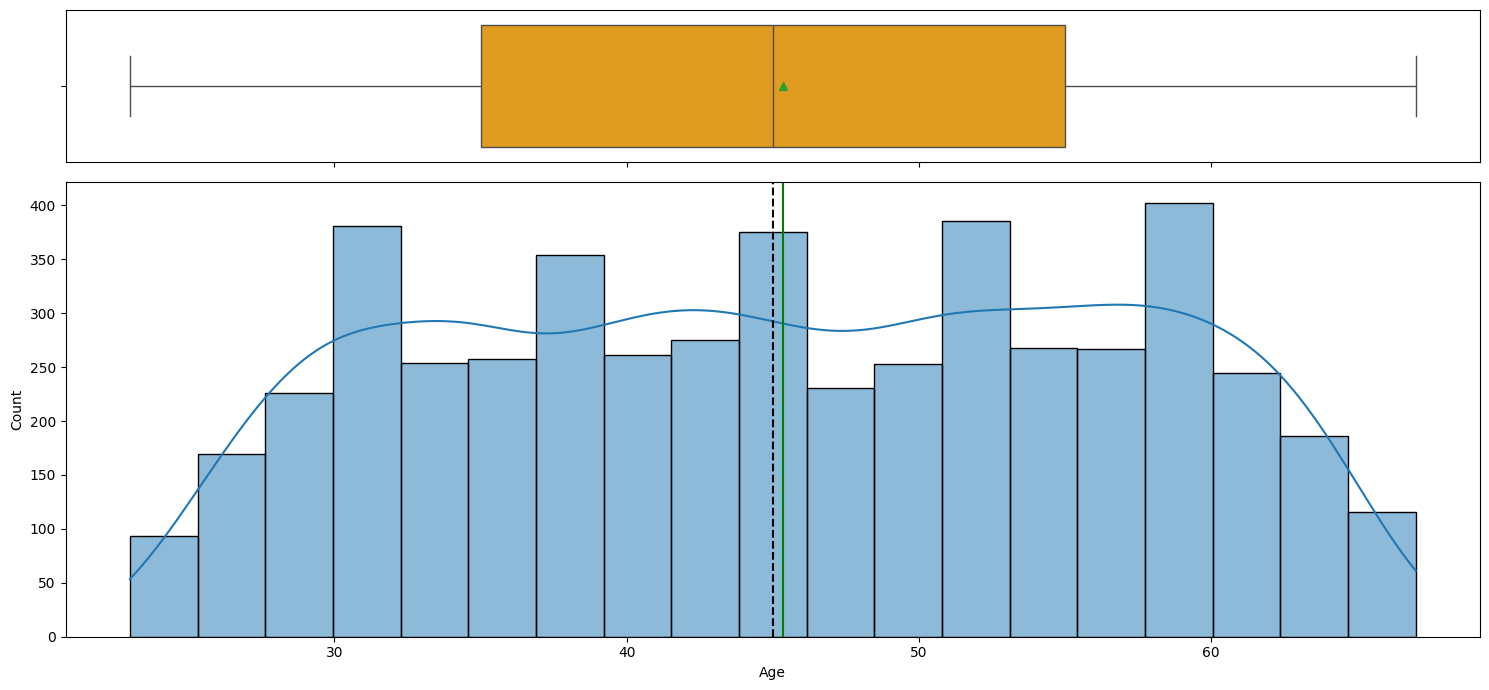

In [ ]:
# Age distribution illustrated with histogram and boxplot
histogram_boxplots(loanData,"Age")

Observations:
* Age - Mean and median are close, it resembles uniform distribution with no visible outliers.

### Observations on Experience

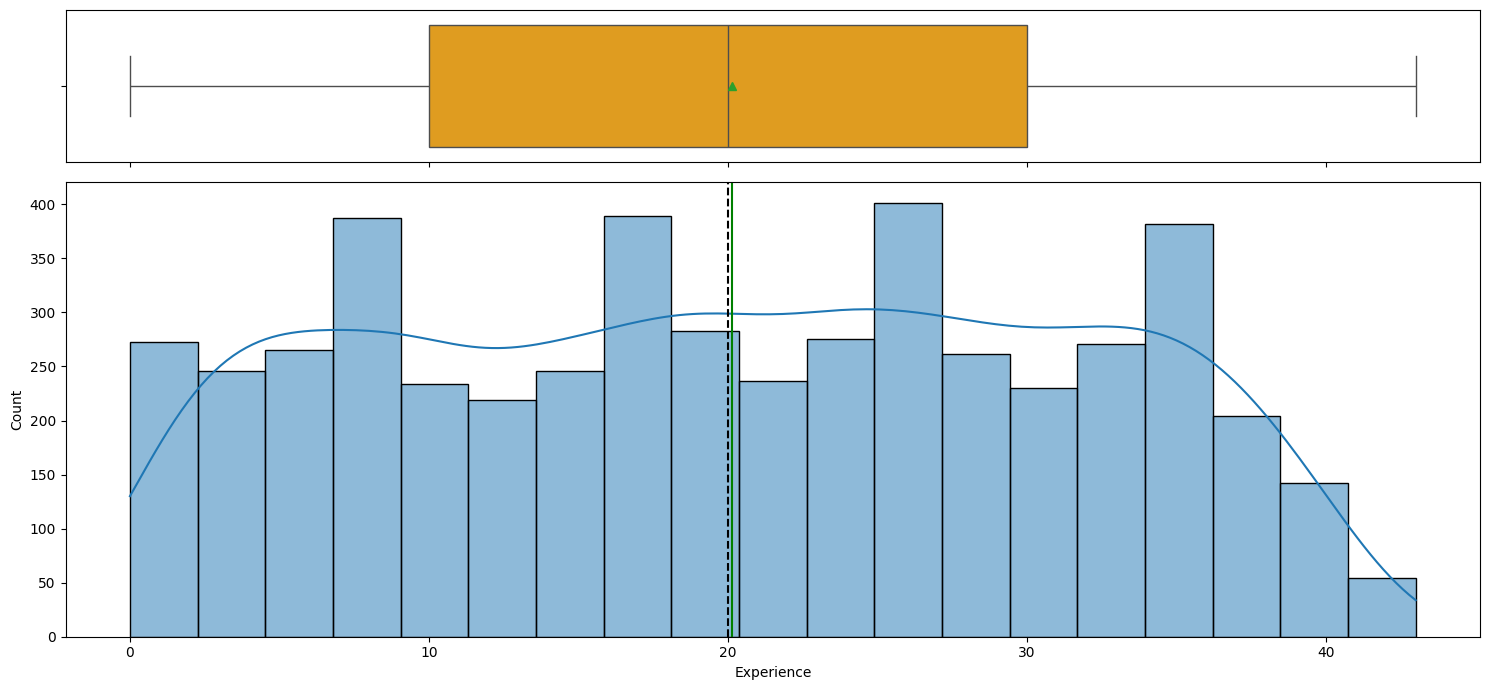

In [ ]:
# Experience distribution illustrated with histogram and boxplot
histogram_boxplots(loanData,'Experience')

Observations:
* Similar to Age, Experience also has Means and median close to each other and resembles a uniform distribution with no visible outliers.  
* For both, Age and Experience, Spread of the data also resembles each other, indicating further evidence supporting multicollinearity.

### Observations on Income

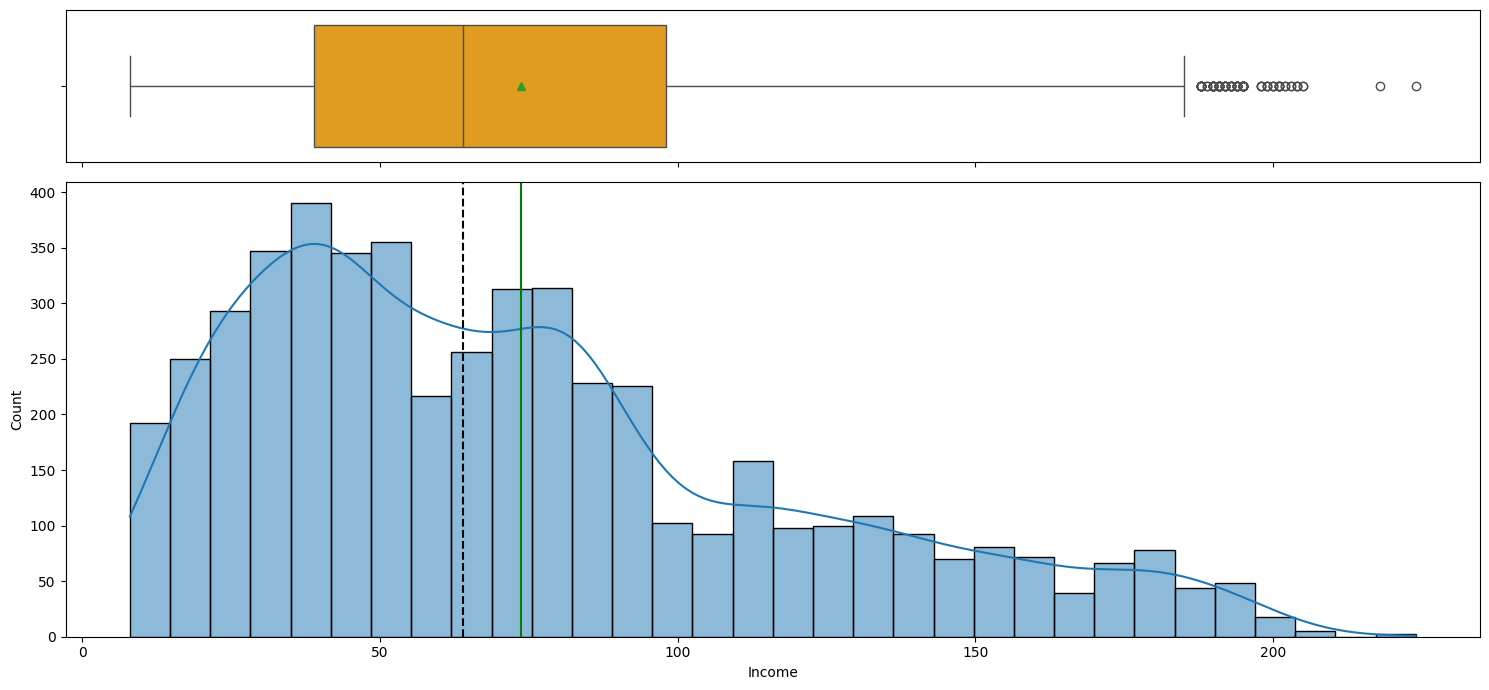

In [ ]:
# Income distribution illustrated with histogram and boxplot
histogram_boxplots(loanData,"Income")

Observations:
* Income -  Right skewed distribution ranging from 8K USD to 224K USD with 75% data at 98K, indicating outliers leading to 224K
* Need to check if these outliers are to be treated.

### Observations on CCAvg

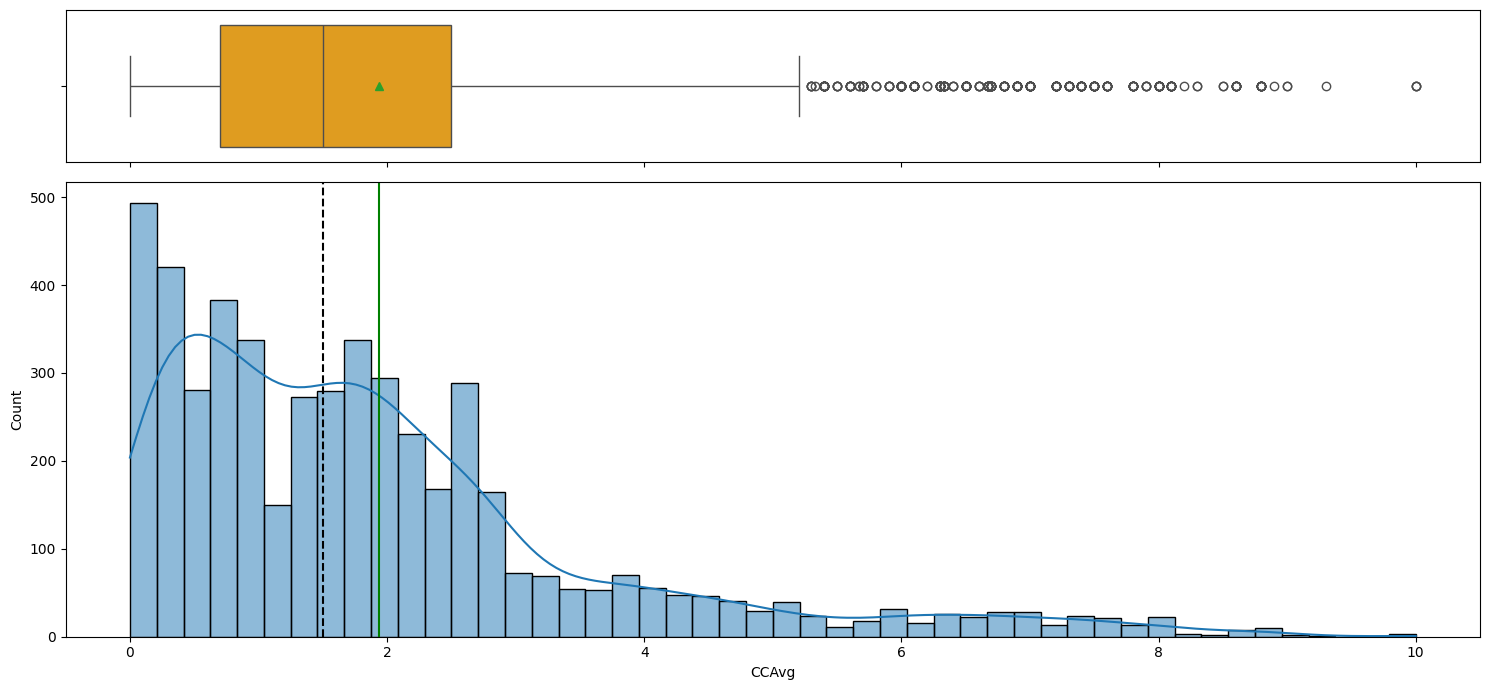

In [ ]:
# CCAvg distribution illustrated with histogram and boxplot
histogram_boxplots(loanData,'CCAvg')

Observations:
* CCAvg - Highly Right skewed distribution with 50% of data heavily present between ~1K USD to ~2.5K and most of the data above ~5K are outliers

### Observations on Mortgage

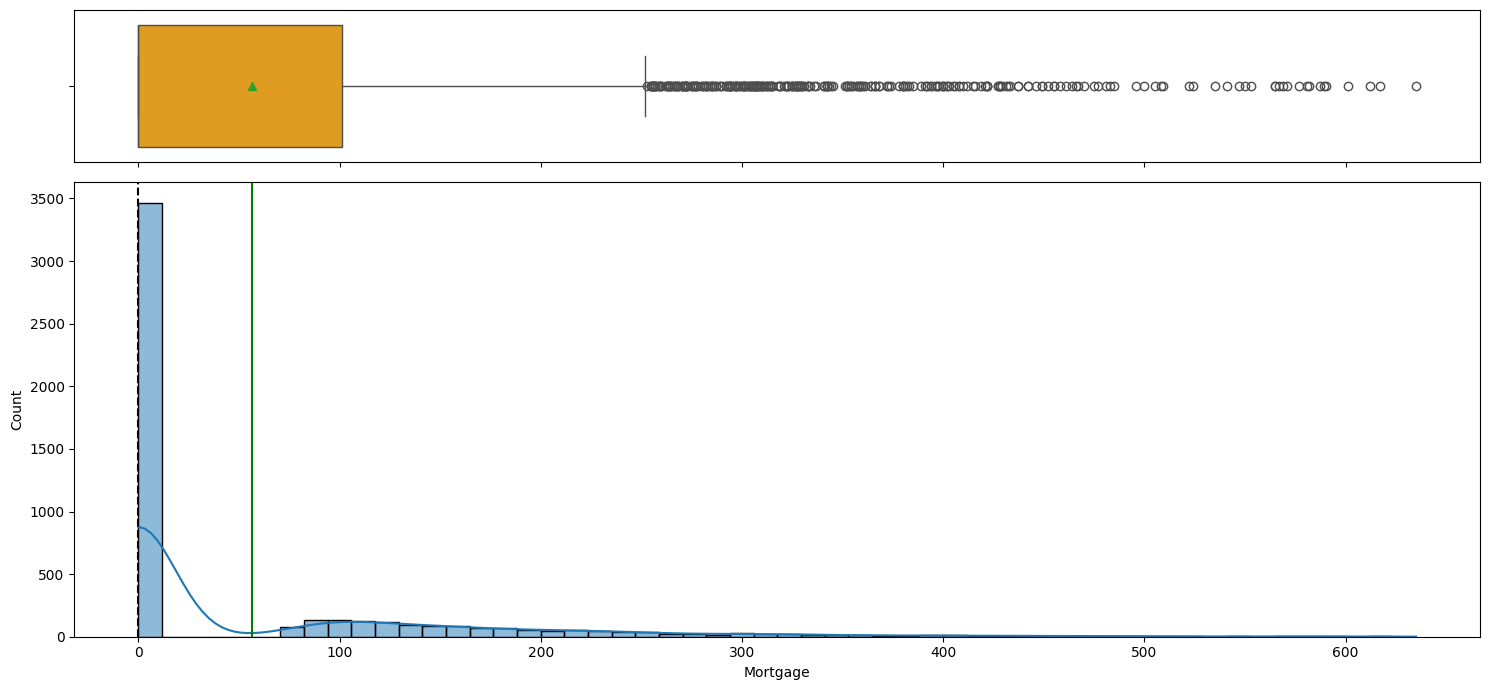

In [ ]:
# Mortgage distribution illustrated with histogram and boxplot
histogram_boxplots(loanData,"Mortgage")

Observations:
* Mortgage - Heavily right skewed distribution with more than 50% of data [~3400 records] concentrated at 0K USD and no/sparse presence of data between 0K-100K and mortgage data above ~250K USD are all outliers.
* This indicates majority of the customers do not have mortgage while the rest are sparsely distributed from ~80K to ~650K

### Observations on Family

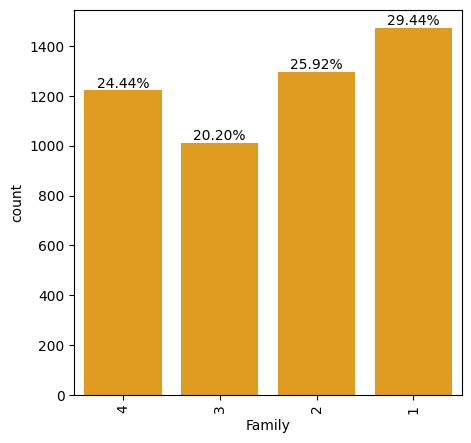

In [ ]:
# Family distribution illustrated with barplot
labeled_barplot(loanData,'Family',perc=True)

Observations:
* Family -
 * Close to ~30% of AllLife customers are single,
 * next is ~26% with a family of 2, and
 * 3rd with ~24.5% with a family of 4 and
 * lastly, around 20% with a family of 3.

### Observations on Education

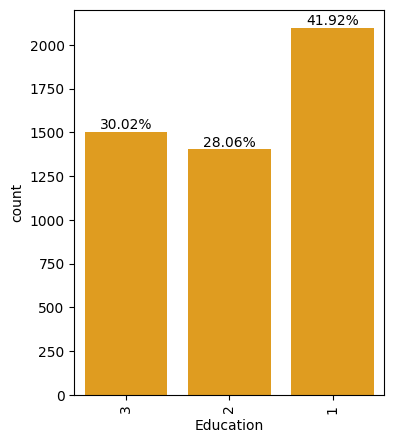

In [ ]:
# Education distribution illustrated with barplot
labeled_barplot(loanData,'Education',perc=True)

Observations:
Education -
* Around 42% of customers did their Undergrad[1], followed by
* 30% with an Advanced Degree[3], and
* 28% of customers did their Graduate degree[2]

### Observations on Personal_Loan

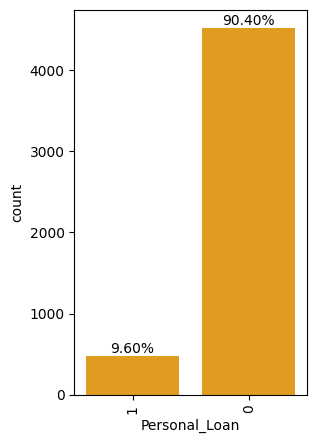

In [ ]:
# Personal Loan distribution illustrated with barplot
labeled_barplot(loanData,'Personal_Loan',perc=True)

Observations: Personal_Loan -
* Highly unequal distribution of Yes/No's on Personal Loan with only 480 out of 5000 have converted from their existing status to acquiring a loan as part of the campaign last time.
* Roughly 9.6%. Might need to stratify data for equi distribution during model training.

### Observations on Securities_Account

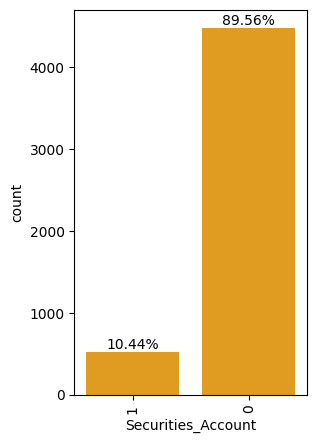

In [ ]:
# Securities_Account distribution illustrated with barplot
labeled_barplot(loanData,'Securities_Account',perc=True)

Observations: Securities_Account -
* Highly unequal distribution of Yes/No's on Securities_Account with 10.4% having their Security deposit account in this bank.

### Observations on CD_Account

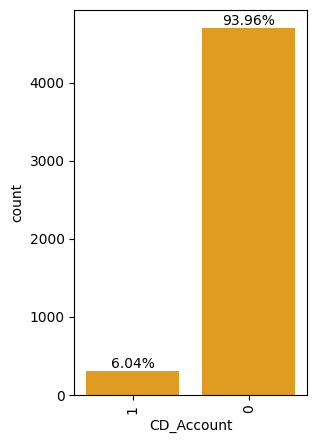

In [ ]:
# CD_Account distribution illustrated with barplot
labeled_barplot(loanData,'CD_Account',perc=True)

Observations: CD_Account -
* Highly unequal distribution of Yes/No's on CD_Account with 6.04% having their CD account in this bank.

### Observations on Online

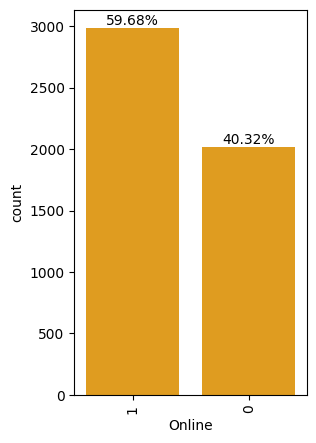

In [ ]:
# Online distribution illustrated with barplot
labeled_barplot(loanData,'Online',perc=True)

Observations:
* Quite close to ~60% of customers avail the internet banking facility offered by the bank and remaining 40% use bank premises to make transactions.

### Observations on CreditCard

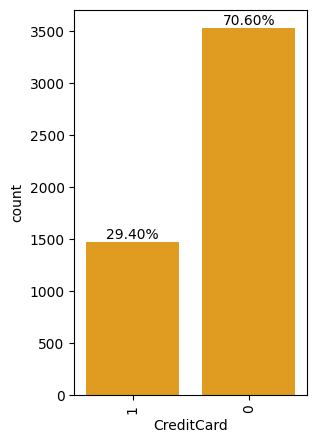

In [ ]:
# CreditCard Y/N distribution illustrated with barplot
labeled_barplot(loanData,'CreditCard',perc=True)

Observations:
* 29.4%/1470 of customers have credit cards with other banks,
* remaining 70.6% of our customers might either not have credit cards or use the credit card offered by AllLife Bank.

### Observations on ZIPCode - County [Top 5]

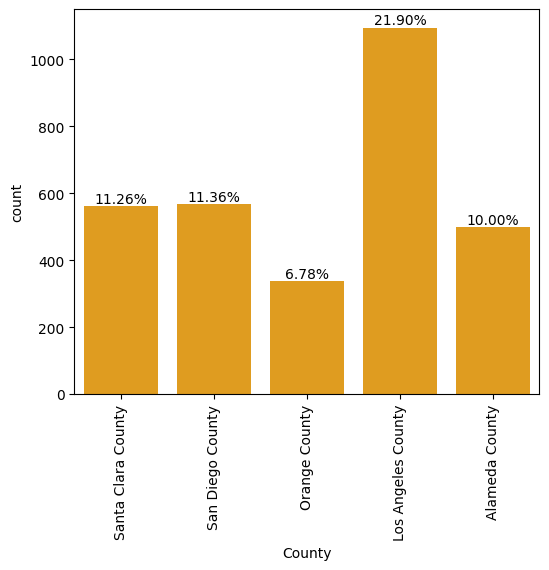

In [ ]:
# Zipcode - Top 5 County distribution illustrated with barplot
labeled_barplot(loanData,'County',perc=True,n=5)

Observations:
Top 5 Counties from which customer base has been predominant are
*   Los Angeles County - ~22%
*   San Diego County - 11.36%
*   Santa Clara County - 11.26%
*   Alameda County - 10%
*   Orange County - 6.78%



### Observations on ZIPCode - City [Top 10]

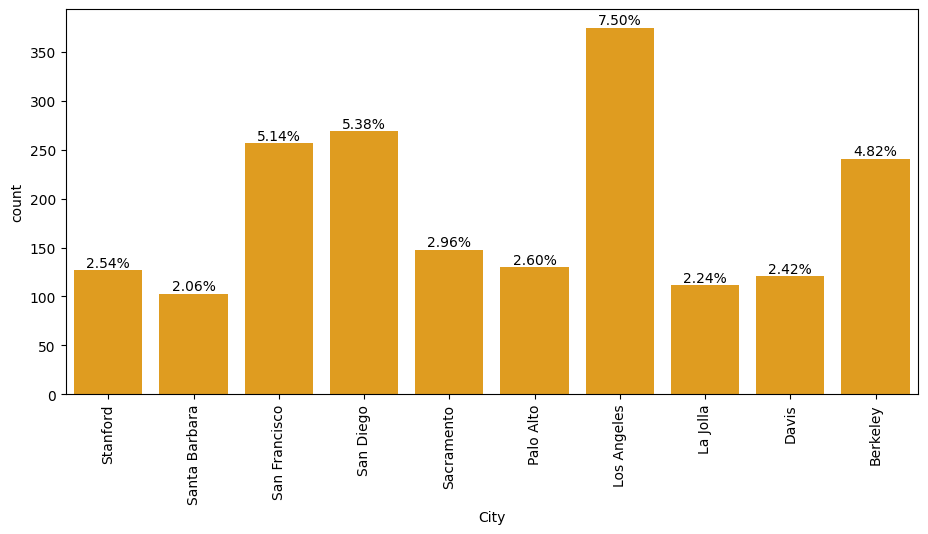

In [ ]:
# Zipcode- Top 10 Cities distribution illustrated with barplot
labeled_barplot(loanData,'City',perc=True,n=10)

In [ ]:
# No. of customers in Cities along with County Information
loanData.groupby("County")['City'].value_counts().sort_values(ascending=False).head(10)

County                City         
Los Angeles County    Los Angeles      375
San Diego County      San Diego        269
San Francisco County  San Francisco    257
Alameda County        Berkeley         241
Sacramento County     Sacramento       148
Santa Clara County    Stanford         127
Yolo County           Davis            121
San Diego County      La Jolla         112
Santa Clara County    Palo Alto        105
Santa Barbara County  Santa Barbara    103
Name: count, dtype: int64

Observations:
Top 5 Cities with their County Details and Count and % distribution of customer base

* Los Angeles County - Los Angeles - 375 - 7.5%
* San Diego County - San Diego - 269 - 5.38%
* San Francisco County - San Francisco - 257 - 5.14%
* Alameda County - Berkeley - 241 - 4.82%
* Sacramento County - Sacramento - 148 - 2.96%





### Observations on ZIPCode - State

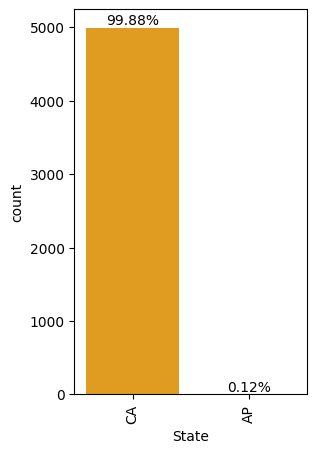

In [ ]:
# ZIPcode - State distribution illustrated with barplot
labeled_barplot(loanData,'State',perc=True)

Observations: State -
* Almost all customers belong to CA and less than 10 customers belong to Armed Forces

### Bivariate Analysis

#### Helper Functions

In [ ]:
# Prints the stacked barplot of hue as target over the predictor variable
def stacked_barplot(data, predictor,target):
  """
  Prints the stacked barplot of hue as target over the predictor variable
  data: Dataset
  predictor: Influencer variable
  target: distribution of target over the influencing variable
  """
  count = data[predictor].nunique()
  sorter = data[target].value_counts().index[-1]
  tab1 = pd.crosstab(index=data[predictor],columns=data[target],margins=True).sort_values( by=sorter,ascending=False)
  print(tab1)
  print("--"*120)
  tab2 = pd.crosstab(index=data[predictor],columns=data[target],normalize='index').sort_values(by=sorter, ascending=False)
  tab2.plot(kind='bar',figsize=(count+5,5),stacked=True)
  plt.legend(bbox_to_anchor=(1,1))
  plt.show()

In [ ]:
# Distribution Plot of Predictor w.r.to Target
def distribution_plot_wrt_target(data,predictor,target):
  """
  Distribution Plot of Predictor w.r.to Target
  predictor: Independent vars
  target: Dependent var
  """
  fig, ax = plt.subplots(2,2,figsize=(12, 10))
  target_unique = data[target].unique()
  ax[0,0].set_title('Distribution of ' + predictor + ' w.r.to ' + str(target_unique[0]))
  sns.histplot(data[data[target] == target_unique[0]],
              x=predictor,
              kde=True,
              ax=ax[0,0],
              color='teal',
              stat='density'
              )
  ax[0,0].axvline(data[data[target] == target_unique[0]][predictor].median(),color='black',linestyle='--')
  ax[0,0].axvline(data[data[target] == target_unique[0]][predictor].mean(), color='green',linestyle='-')
  ax[0,1].set_title('Distribution of ' + predictor + ' w.r.to ' + str(target_unique[1]))
  sns.histplot(data[data[target] == target_unique[1]],
              x=predictor,
              kde=True,
              ax=ax[0,1],
              color='orange',
              stat='density'
              )
  ax[0,1].axvline(data[data[target] == target_unique[1]][predictor].median(),color='black',linestyle='--')
  ax[0,1].axvline(data[data[target] == target_unique[1]][predictor].mean(), color='green',linestyle='-')
  ax[1,0].set_title('Boxplot of ' + predictor + ' w.r.to ' + target)
  sns.boxplot(data,y=target,x=predictor,palette="gist_rainbow",ax=ax[1,0],showmeans=True)
  ax[1,1].set_title('Boxplot of ' + predictor + ' w.r.to ' + target + ' without outliers')
  sns.boxplot(data,y=target,x=predictor,palette="gist_rainbow",ax=ax[1,1],showfliers=False,showmeans=True)
  plt.show();

#### Correlations

<Axes: >

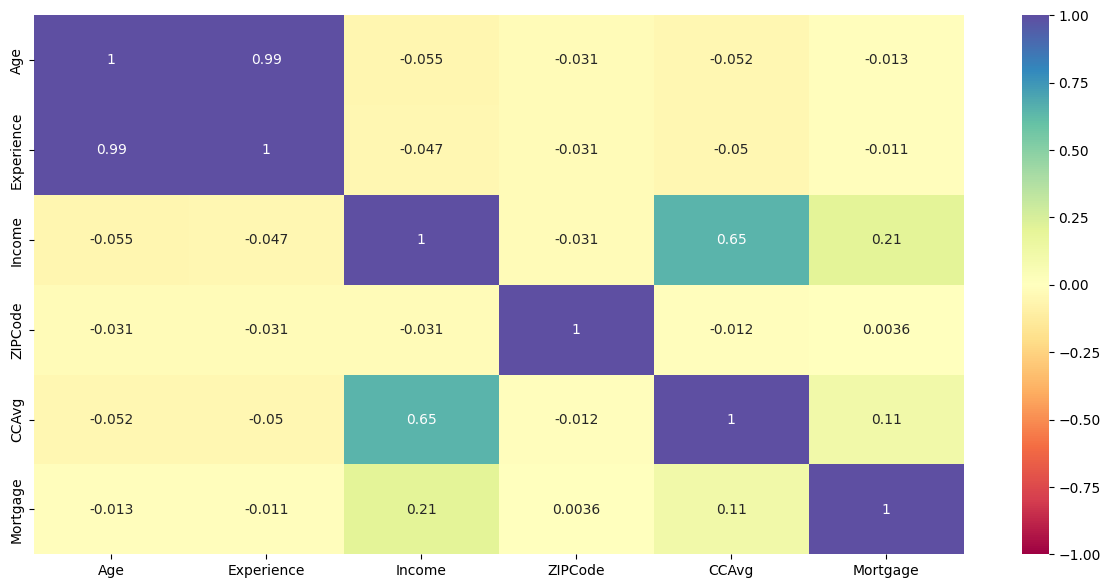

In [ ]:
#Correlation amongst the continuous numerical variables
plt.figure(figsize=(15,7))
sns.heatmap(loanData.corr(numeric_only=True),vmax=1,vmin=-1,cmap='Spectral',annot=True)

Observations:
* Age and Experience are extremely postively correlated, so one of them could be dropped. Since experience had negative values, it could be dropped.
* Income and CCAvg[Credit card Avg] are strongly positively correlated[0.65], when one raises, another raises as well.
* Income and Mortgage are postively correlated[0.21], when Income raises, Mortgage has raised as well. For low income, mortgage is low or they have not taken any mortgage.
* As income is correlated with both CCAvg and Mortgage, both CCAvg and Mortgage are positively correlated as well [0.11]



Correlation of Personal Loan vs Continuous numerical variables -Pairplot with hue as Personal_Loan:

In [ ]:
# Pairplot with hue as Personal_Loan : Correlation of Personal Loan vs Continuous numerical variables
plt.figure(figsize=(12, 8))
num_cols = loanData.select_dtypes(include=np.number).columns.tolist()
sns.pairplot(loanData, vars=num_cols, hue='Personal_Loan',diag_kind='kde')

Output hidden; open in https://colab.research.google.com to view.

Observations: Correlation of Personal Loan vs Continuous numerical variables:
* No matter what the dependent variables are in this dataset, number of Personal loan being approved is tremendously lower[~ 10%] when compared to being rejected/not availed[~90%].
* Age Vs
  * Experience  - Strong linear relationship as indicated earlier as well from correlation table. One of them will be dropped.
  * Income - Regardless of Age,
    * When Income is higher [above 100K], Chances of Personal Loan being granted are visibly higher.
    * For lower income, chances of personal loan being granted is lower.
  * CCAvg - Regardless of Age/Experience,
    * When avg CC amount is higher than 3K,Chances of Approval of Personal loans is higher
    *  When avg CC amount is lower than 3K,Chances of Approval of Personal loans is lower
  * Mortgage -  Regardless of Age,
    * Mortage is 0, with approval of personal loans being lower as well.
    * There is no mortgage data between 0- ~100K, indicating mortgage starts at 100K cap.
    * When mortage is higher, chances of personal loan is higher when compared to lower mortgage where the chances of personal loan are lower.
* Income Vs
  * CCAvg/Mortgage : Both CCAvg and Mortgage exhibit similar relationship against Income. POsitive correlation with higher incomes above 100K exhibiting higher chances of Personal Loan Approval.

#### Discrete Bivariate Analysis -  Personal Loan vs Education

Personal_Loan     0    1   All
Education                     
All            4520  480  5000
3              1296  205  1501
2              1221  182  1403
1              2003   93  2096
------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------


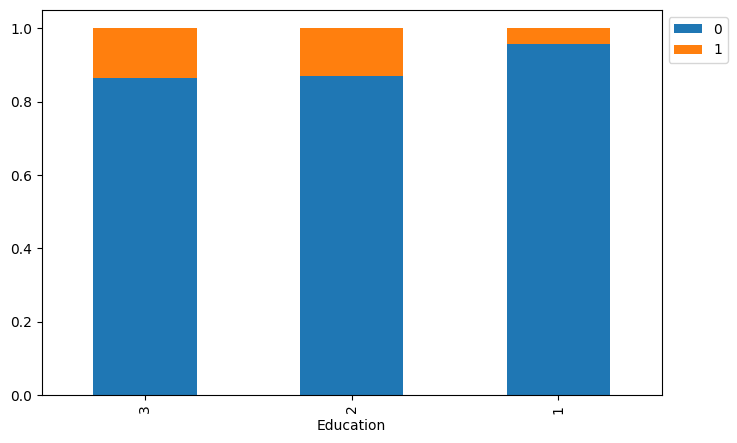

In [ ]:
# Stacked barplot illustration of Education vs Personal Loan
stacked_barplot(loanData, 'Education', 'Personal_Loan')

Observations:
Loan Approval chances -
* Comparatively higher in customers with Advanced Degree[3] - ~14%
* Lowest in customers with just UnderGrad degree[1] - ~4.4%

#### Discrete Bivariate Analysis -  Personal Loan vs Family

Personal_Loan     0    1   All
Family                        
All            4520  480  5000
4              1088  134  1222
3               877  133  1010
1              1365  107  1472
2              1190  106  1296
------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------


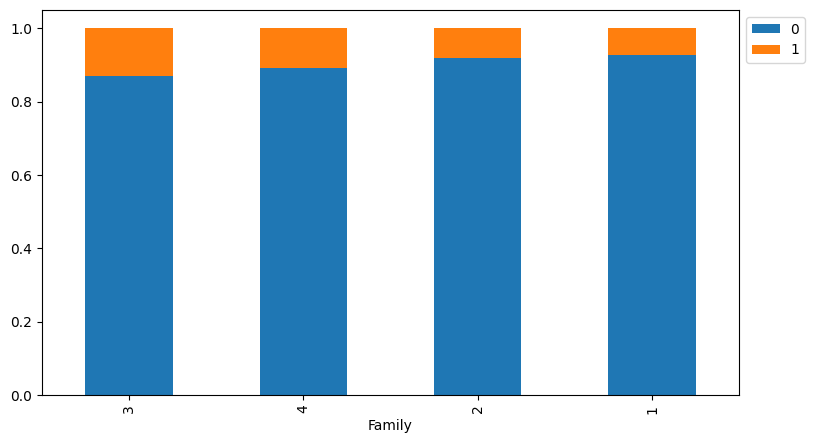

In [ ]:
# Stacked barplot illustration of Family vs Personal Loan
stacked_barplot(loanData, 'Family', 'Personal_Loan')

Observations: Loan Approval chances -
* Family of 3 - 13.1%
* Family of 4 - 10.9%
* Family of 2 - 8.1%
* Family of 1 - 7.2%

#### Discrete Bivariate Analysis -  Personal Loan vs Securities_Account

Personal_Loan          0    1   All
Securities_Account                 
All                 4520  480  5000
0                   4058  420  4478
1                    462   60   522
------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------


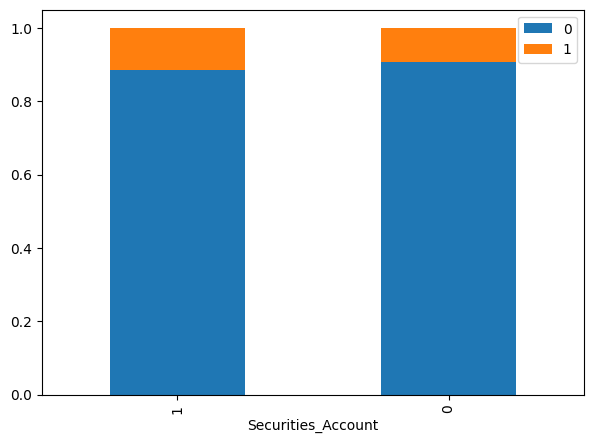

In [ ]:
# Stacked barplot illustration of Securities_Account vs Personal Loan
stacked_barplot(loanData, 'Securities_Account', 'Personal_Loan')

Loan Approval chances -
* With Securities_Account - ~11.5%
* With no Securities_Account - 9.3%

#### Discrete Bivariate Analysis -  Personal Loan vs CD_Account

Personal_Loan     0    1   All
CD_Account                    
All            4520  480  5000
0              4358  340  4698
1               162  140   302
------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------


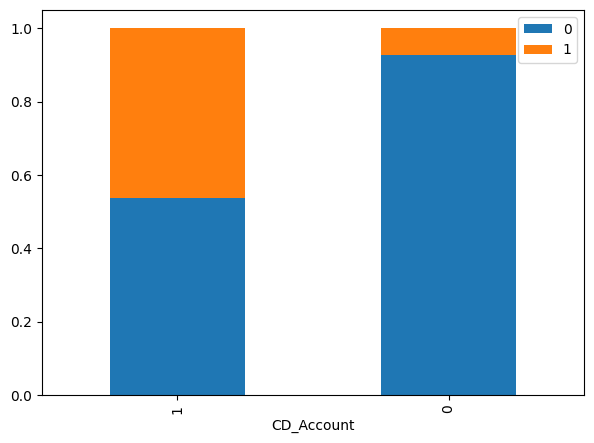

In [ ]:
# Stacked barplot illustration of CD_Account vs Personal Loan
stacked_barplot(loanData, 'CD_Account', 'Personal_Loan')

Observations: Loan Approval chances -
* With CD_Account - 46.3%
* Without CD_Account - 7.2%

#### Discrete Bivariate Analysis -  Personal Loan vs Online

Personal_Loan     0    1   All
Online                        
All            4520  480  5000
1              2693  291  2984
0              1827  189  2016
------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------


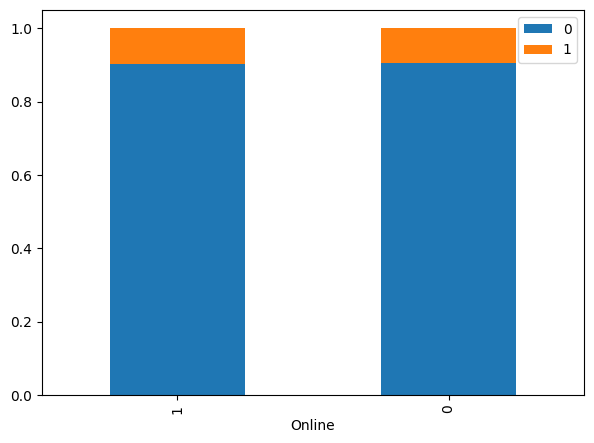

In [ ]:
# Stacked barplot illustration of Online vs Personal Loan
stacked_barplot(loanData, 'Online', 'Personal_Loan')

Observations: Loan Approval chances -
* With Online Internet facilities availed - 9.7%
* Without Online Internet facilities availed - 9.3%

#### Discrete Bivariate Analysis -  Personal Loan vs CreditCard

Personal_Loan     0    1   All
CreditCard                    
All            4520  480  5000
0              3193  337  3530
1              1327  143  1470
------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------


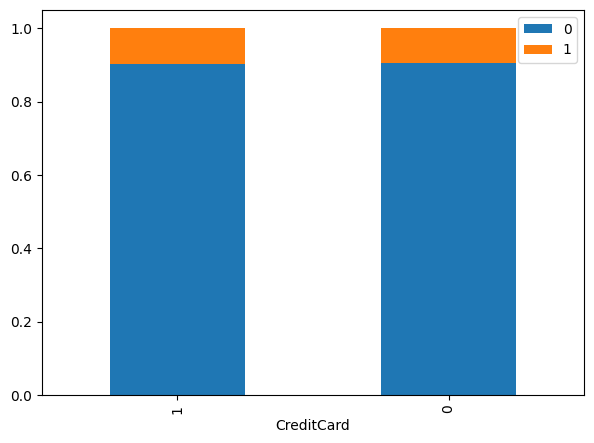

In [ ]:
# Stacked barplot illustration of Credit Card Y/N vs Personal Loan
stacked_barplot(loanData, 'CreditCard', 'Personal_Loan')

Observations: Loan Approval chances -
* With Customers having CreditCard in other Banks - 9.7%
* Without Creditcard in other banks/have credit card in AllLife Bank - 9.5%

#### Discrete Bivariate Analysis -  Personal Loan Approved vs Top 5 Counties

In [ ]:
# Stacked barplot illustration of Top 5 Counties vs Personal Loan
loanData[loanData.Personal_Loan == 1]['County'].value_counts(normalize=True).head(5)

County
Los Angeles County    0.231250
Santa Clara County    0.147917
San Diego County      0.122917
Alameda County        0.091667
Orange County         0.062500
Name: proportion, dtype: float64

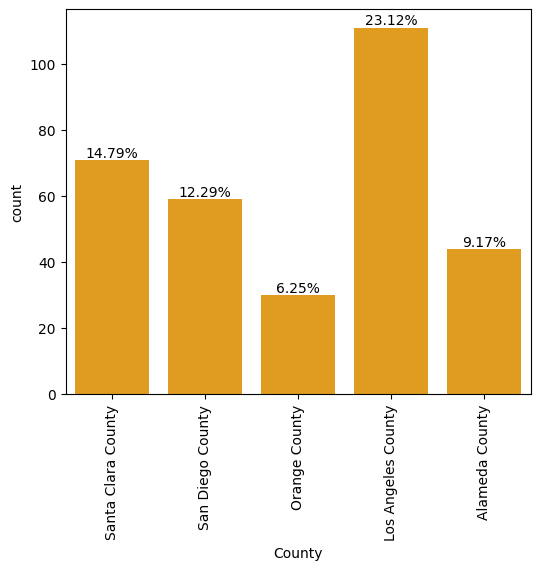

In [ ]:
# Stacked barplot illustration of Top 5 counties vs Personal Loan
labeled_barplot(loanData[loanData.Personal_Loan == 1],'County',perc=True,n=5)


Observations: Out of total 480 Personal Loan Approval records in the data set; These are the Top 5 Counties which had highest approval rates.
* Los Angeles County - 23.12%
* Santa Clara County - 14.79%
* San Diego County - 12.29%
* Alameda County - 9.17%
* Orange County - 6.25%

Please note that individual County Approval rate [i.e.against its own total customers] might be significantly lower as this dataset has a disproportionate rate of Rejections/No Personal Loans[No] vs Personal Loan Approvals[Yes]


#### Discrete Bivariate Analysis -  Personal Loan Approved vs Top 10 Cities-Counties

In [ ]:
# Stacked barplot illustration of Top 10 Cities - Counties vs Personal Loan
approvedCountiesCities = loanData[loanData.Personal_Loan == 1].groupby(['City','County']).agg(cnt = ('City','value_counts')).sort_values(by=['cnt','County'],ascending=False).reset_index()
approvedCountiesCities.head(10)

City                County  cnt
0    Los Angeles    Los Angeles County   38
1       Berkeley        Alameda County   27
2      San Diego      San Diego County   21
3  San Francisco  San Francisco County   19
4       La Jolla      San Diego County   15
5      Palo Alto    Santa Clara County   14
6       Stanford    Santa Clara County   13
7     Sacramento     Sacramento County   13
8    Santa Clara    Santa Clara County   12
9       San Jose    Santa Clara County   11

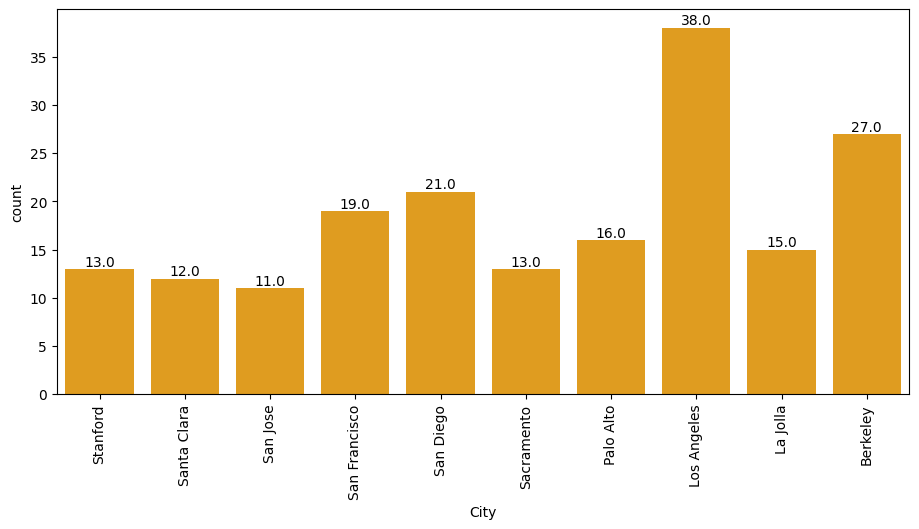

In [ ]:
labeled_barplot(loanData[loanData.Personal_Loan == 1],'City',perc=False,n=10)

Observations: Top 10 Cities - Counties with most number of Loan Approvals
1.  Los Angeles - Los Angeles County - 38
2. 	Berkeley - Alameda County - 27
3. 	San Diego - San Diego County - 21
4. 	San Francisco - San Francisco County - 19
5. 	La Jolla - San Diego County - 15
6. 	Palo Alto - Santa Clara County - 14 [shows up 16 in Plot as another county has Palo Alto City with 2 Approvals in it]
7. 	Stanford - Santa Clara County - 13
8. 	Sacramento - Sacramento County - 13
9. 	Santa Clara - Santa Clara County - 12
10. San Jose - Santa Clara County - 11

#### Continuous vs Discrete[Personal Loan] Bivariate Analysis

Personal Loan vs Age

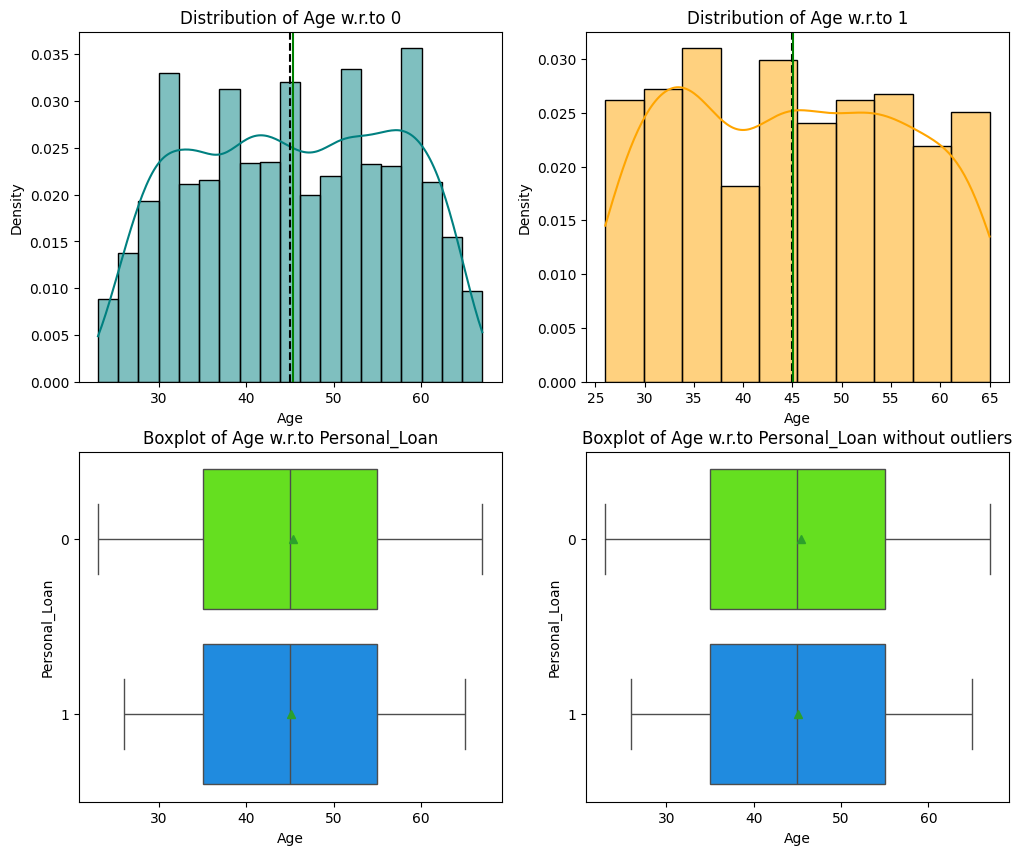

In [ ]:
#Distribution Plot of Age vs Personal_Loan - 0/1 and boxplot with and without outliers
distribution_plot_wrt_target(loanData,'Age','Personal_Loan')

Observations: Age vs Personal Loan:
* whether loan being Accepted or not, Mean and Median of Age for both cases are close to 45 Years and each indicating symmetric distribution on either sides of mean/median.

* Personal_Loan: Accepted - 1:
  * Histplot: Almost symmetric distribution, with little skewness to right
  * Boxplot: No outliers for Age, data ranging from ~15 - ~80, with 50% of data heavily distributed between 35-55 years
* Personal_Loan: Not Accepted - 0:
  * Histplot: symmetric distribution
  * Boxplot: No outliers for Age, data ranging from ~5 - ~75, with 50% of data heavily distributed between 35-55 years

Personal Loan vs Experience

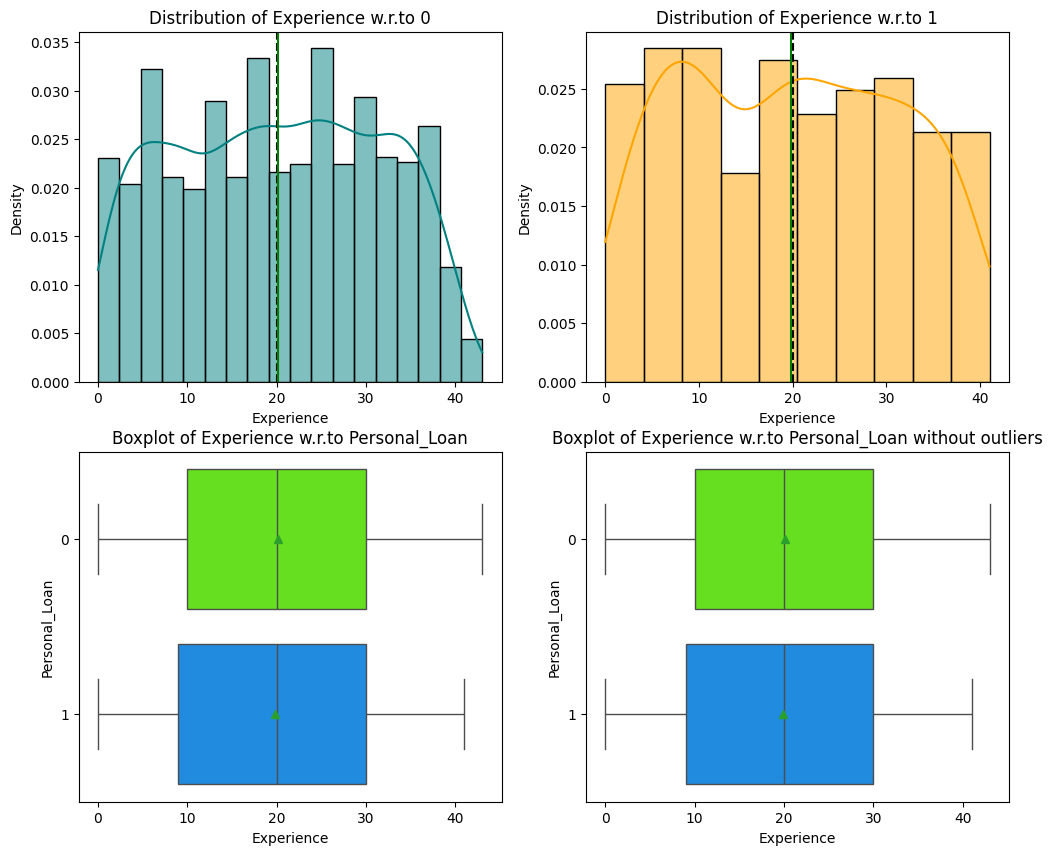

In [ ]:
#Distribution Plot of Experience vs Personal_Loan - 0/1 and boxplot with and without outliers
distribution_plot_wrt_target(loanData,'Experience','Personal_Loan')

Observations: Experience vs Personal Loan:
* whether loan being Accepted or not, Mean and Median of Age for both cases are close to 20 years and each indicating symmteric distribution on either sides of mean/median.

* Personal_Loan: Accepted - 1:
  * Histplot: Almost symmteric distribution, with little skewness to right
  * Boxplot: No outliers for Experience, data ranging from ~0 - ~40, with 50% of data heavily distributed between ~8-30 years
* Personal_Loan: Not Accepted - 0:
  * Histplot: symmteric distribution
  * Boxplot: No outliers for Experience, data ranging from ~0 - ~45, with 50% of data heavily distributed between 10-30 years

Personal Loan vs Income

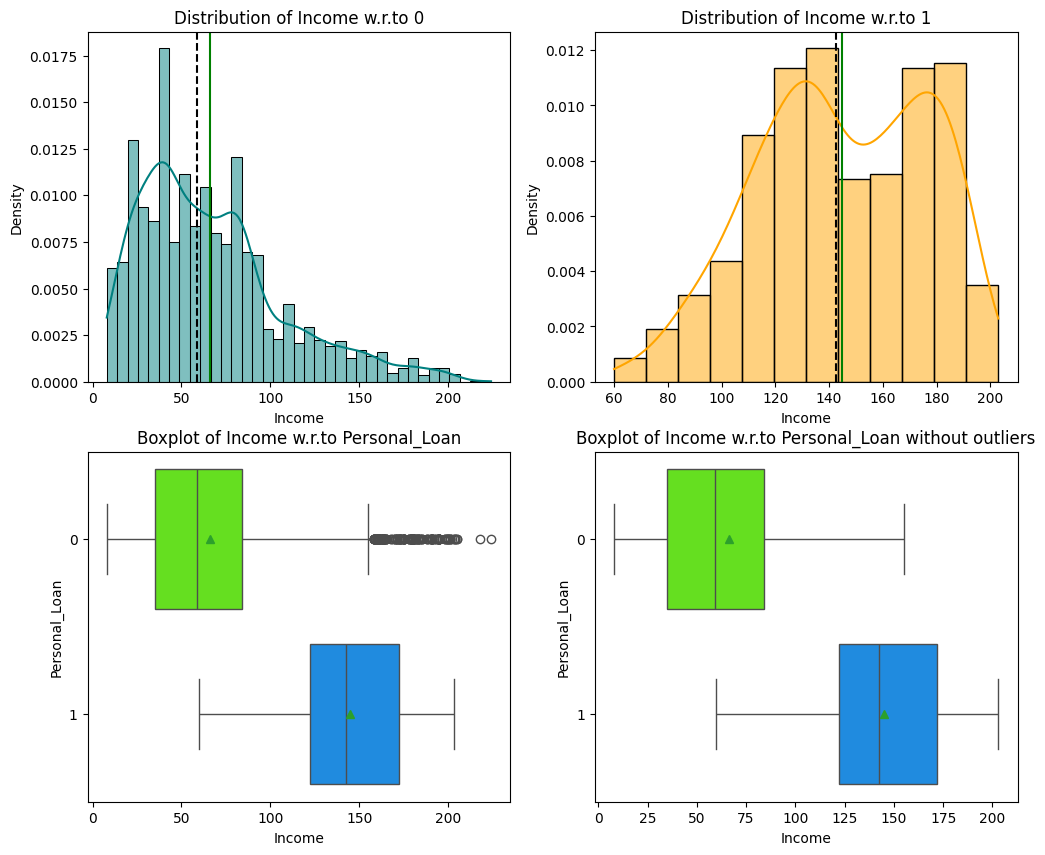

In [ ]:
#Distribution Plot of Income vs Personal_Loan - 0/1 and boxplot with and without outliers
distribution_plot_wrt_target(loanData,'Income','Personal_Loan')

Income vs Personal Loan:

* Personal_Loan: Accepted - 1:
  * Histplot: Little bit of Left Skewed distribution,Mean and median are almost close to ~145K
  * Boxplot: No outliers for this Income subset of customers, data ranging from ~55K - ~200K, with 50% of data heavily distributed between ~120K-170K
* Personal_Loan: Not Accepted - 0:
  * Histplot: Right Skewed distribution,Mean at ~60K, Median at ~54K.
  * Boxplot: Significant number of outliers on the right for this Income subset of customers, data ranging from ~10K - ~150K, with 50% of data heavily distributed between ~30K-80K

Personal Loan vs Mortgage

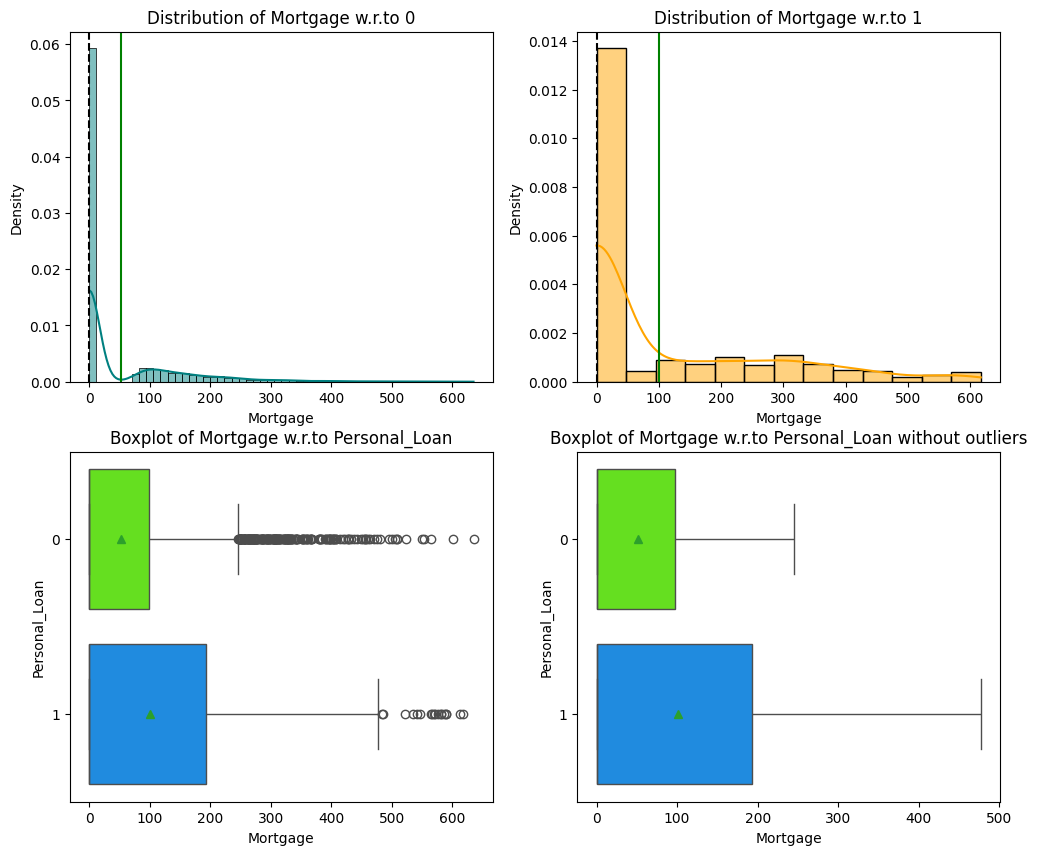

In [ ]:
#Distribution Plot of Mortgage vs Personal_Loan - 0/1 and boxplot with and without outliers
distribution_plot_wrt_target(loanData,'Mortgage','Personal_Loan')

Mortgage vs Personal Loan:

* Personal_Loan: Accepted - 1:
  * Histplot: Extremely Right skewed Distribution,Mean at ~100K, Median at 0K- indicating half of the customers has 0K mortgage.
  * Boxplot: Significant number of outliers on the right beyond 470K USD for this Mortgage subset of customers, data ranging from ~0K - ~470K, with 50% of data heavily distributed between ~0K - ~200K
* Personal_Loan: Not Accepted - 0:
  * Histplot: Extremely Right skewed Distribution,Mean at ~50K, Median at 0K- indicating half of the customers has 0K mortgage.
  * Boxplot: Significant number of outliers on the right beyond $230K for this Mortgage subset of customers, data ranging from 0K - ~ 230K, with 50% of data heavily distributed between ~0K - ~100K

Personal Loan vs CCAvg

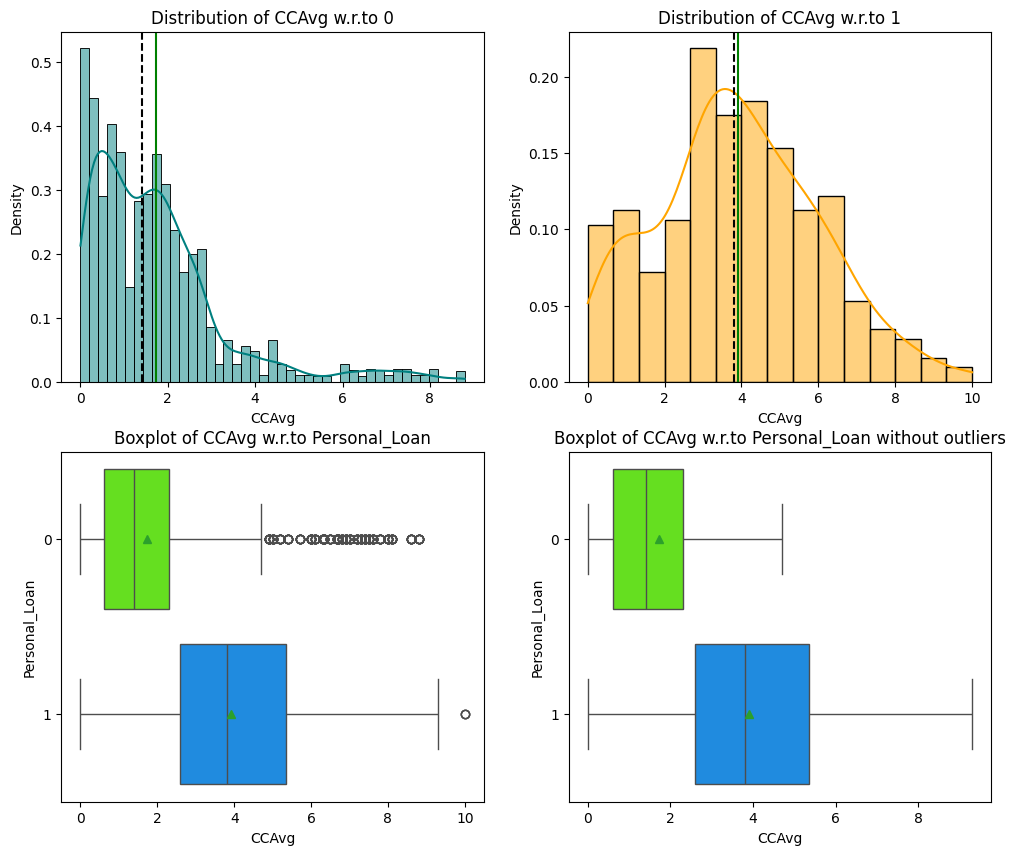

In [ ]:
#Distribution Plot of CCAvg vs Personal_Loan - 0/1 and boxplot with and without outliers
distribution_plot_wrt_target(loanData,'CCAvg','Personal_Loan')

CCAvg vs Personal Loan:

* Personal_Loan: Accepted - 1:
  * Histplot: Lightly Right skewed Distribution,Mean and Median are close to each other at ~3.8K-3.9K.
  * Boxplot: Single/group of outliers at 10K for this CCAvg subset of customers, data ranging from ~0K - ~9.2K, with 50% of data heavily distributed between ~2.5K - ~5.3K
* Personal_Loan: Not Accepted - 0:
  * Histplot: Right skewed Distribution,Mean at ~1.7K, Median at ~1.4K.
  * Boxplot: Significant number of outliers on the right beyond ~4.75K for this CCAvg subset of customers, data ranging from 0K - ~ 4.75K, with 50% of data heavily distributed between ~0.5K - ~2.2K

## Data Preprocessing

* Missing value treatment
* Feature engineering (if needed)
* Outlier detection and treatment (if needed)
* Preparing data for modeling
* Any other preprocessing steps (if needed)

* No Missing Value
* Feature Engineering - ZIPCode field is treated.

### Outlier Detection

In [ ]:
#Function to detect outliers
def detectOutliers(data, feature):
  """
  Function to detect outliers
  data: dataframe
  feature: column
  returns Dataframe with values for columns found to have outliers from EDA
  """
  q1 = data[feature].quantile(0.25)
  q3 = data[feature].quantile(0.75)
  iqr = q3-q1
  upper = q3 + 1.5 * iqr
  lower = q1 - 1.5 * iqr
  df = data[((data[feature] < lower)   | (data[feature] > upper))][feature].agg({'Minimum': 'min','Maximum': 'max','OutlierCnt':'count'})
  newRows = pd.DataFrame([[lower],[upper]],index=["Lower","Upper"],columns=[feature])
  return pd.concat([newRows,df])

In [ ]:
#columns found to have outliers from EDA, detects outliers for each of these columns and present outlierStats
outlier_num_cols = ['Income','CCAvg','Mortgage','Experience']
outlierdf = []
for col in outlier_num_cols:
  df = detectOutliers(loanData,col)
  outlierdf.append(df)
outlierStats = pd.concat(outlierdf,axis=1)
outlierStats

Income  CCAvg  Mortgage  Experience
Lower        -49.5   -2.0    -151.5       -20.0
Upper        186.5    5.2     252.5        60.0
Minimum      188.0    5.3     253.0         NaN
Maximum      224.0   10.0     635.0         NaN
OutlierCnt    96.0  324.0     291.0         0.0

In [ ]:
loanData_wo_outliers = loanData.copy() # New dataset copied from original dataset, so as to have a separate dataset with outliers being treated.

In [ ]:
# Function to treat outliers by clipping the data with min/max
def treatOutliers(data, feature,lower,upper):
  """
  Function to treat outliers to clip the extremes with lower and upper values found earlier.
  data: Dataset
  feature: column with outlier
  lower: Minimum: Q1-1.5*IQR
  upper: Maximum: Q3+1.5*IQR
  """
  data[feature] = np.clip(data[feature],lower, upper)

# Treat outliers for Income, CCAvg, Mortgage and run separate Models for original[not treated for outliers] and new dataset[which is treated for outliers] datasets.
outlier_num_cols = ['Income','CCAvg','Mortgage']
for outlierStatsIndex,col in enumerate(outlier_num_cols):
  print("Lower for",col,"is",outlierStats.T['Lower'][outlierStatsIndex])
  print("Upper for",col,"is",outlierStats.T['Upper'][outlierStatsIndex])
  treatOutliers(loanData_wo_outliers,col,outlierStats.T['Lower'][outlierStatsIndex],outlierStats.T['Upper'][outlierStatsIndex])

Lower for Income is -49.5
Upper for Income is 186.5
Lower for CCAvg is -2.0
Upper for CCAvg is 5.2
Lower for Mortgage is -151.5
Upper for Mortgage is 252.5


In [ ]:
#Validate if there are any outliers to these columns after outlier treatment in previous step
outlier_num_cols = ['Income','CCAvg','Mortgage']
treatedOutlierdf = []
for col in outlier_num_cols:
  df = detectOutliers(loanData_wo_outliers,col)
  treatedOutlierdf.append(df)
treatedOutlierStats = pd.concat(treatedOutlierdf,axis=1)
treatedOutlierStats #it appears outlier Counts are 0 for these 3 columns so, outlier treatment worked.

Income  CCAvg  Mortgage
Lower        -49.5   -2.0    -151.5
Upper        186.5    5.2     252.5
Minimum        NaN    NaN       NaN
Maximum        NaN    NaN       NaN
OutlierCnt     0.0    0.0       0.0

### Data Preparation for Modeling

In [ ]:
# 2 Datasets, 1 with outliers treated for Income, CCAvg and Mortgage and 2. Original Dataset without the treatment of outliers.
# Experience and Age are highly correlated - Experience will not be used for Model Building
# ZIPCode will not be used for Modeling as it has been processed to City, COunty, State Variables in Dataset.
# City has 241 distinct values so, not using this object type in Modeling, instead, run with County which has 41 distinct values and State that has 2 distinct values.
X = loanData.drop(['ZIPCode','City','Experience','Personal_Loan'],axis=1)
Y = loanData['Personal_Loan']

treatedX = loanData_wo_outliers.drop(['ZIPCode','City','Experience','Personal_Loan'],axis=1)
treatedY = loanData_wo_outliers['Personal_Loan']

In [ ]:
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 12 columns):
 #   Column              Non-Null Count  Dtype   
---  ------              --------------  -----   
 0   Age                 5000 non-null   int64   
 1   Income              5000 non-null   int64   
 2   Family              5000 non-null   category
 3   CCAvg               5000 non-null   float64 
 4   Education           5000 non-null   category
 5   Mortgage            5000 non-null   int64   
 6   Securities_Account  5000 non-null   category
 7   CD_Account          5000 non-null   category
 8   Online              5000 non-null   category
 9   CreditCard          5000 non-null   category
 10  State               5000 non-null   category
 11  County              5000 non-null   category
dtypes: category(8), float64(1), int64(3)
memory usage: 197.7 KB


In [ ]:
#Find the category cols for Dummies creation but if the categorical var has just 0s/1s, it does not require dummy treatment
cat_cols = X.select_dtypes(include='category').columns.tolist()
cat_cols

['Family',
 'Education',
 'Securities_Account',
 'CD_Account',
 'Online',
 'CreditCard',
 'State',
 'County']

In [ ]:
# Convert Categorical values to numerical - Part 1 - Education & State for both Datasets with and w/o outliers
X= pd.get_dummies(X,columns=['Education','State'],drop_first=True)
treatedX = pd.get_dummies(treatedX,columns=['Education','State'],drop_first=True)

In [ ]:
# Convert Categorical values to numerical - Part 2 - County for both Datasets with and w/o outliers
le = LabelEncoder()
X['County'] = le.fit_transform(X['County'])
treatedX['County']= le.fit_transform(treatedX['County'])

In [ ]:
X.head(10) #Display data to check for Dummies creation

Age  Income Family  CCAvg  Mortgage Securities_Account CD_Account Online  \
0   25      49      4    1.6         0                  1          0      0   
1   45      34      3    1.5         0                  1          0      0   
2   39      11      1    1.0         0                  0          0      0   
3   35     100      1    2.7         0                  0          0      0   
4   35      45      4    1.0         0                  0          0      0   
5   37      29      4    0.4       155                  0          0      1   
6   53      72      2    1.5         0                  0          0      1   
7   50      22      1    0.3         0                  0          0      0   
8   35      81      3    0.6       104                  0          0      1   
9   34     180      1    8.9         0                  0          0      0   

  CreditCard  County  Education_2  Education_3  State_CA  
0          0      10        False        False      True  
1          0      10        False        False      True  
2          0       0        False        False      True  
3          0      24         True        False      True  
4          1      10         True        False      True  
5          0      23         True        False      True  
6          0      10         True        False      True  
7          1      14        False         True      True  
8          0      10         True        False      True  
9          0      39        False         True      True

In [ ]:
treatedX.head(10) #Display data to check for Dummies creation

Age  Income Family  CCAvg  Mortgage Securities_Account CD_Account Online  \
0   25    49.0      4    1.6       0.0                  1          0      0   
1   45    34.0      3    1.5       0.0                  1          0      0   
2   39    11.0      1    1.0       0.0                  0          0      0   
3   35   100.0      1    2.7       0.0                  0          0      0   
4   35    45.0      4    1.0       0.0                  0          0      0   
5   37    29.0      4    0.4     155.0                  0          0      1   
6   53    72.0      2    1.5       0.0                  0          0      1   
7   50    22.0      1    0.3       0.0                  0          0      0   
8   35    81.0      3    0.6     104.0                  0          0      1   
9   34   180.0      1    5.2       0.0                  0          0      0   

  CreditCard  County  Education_2  Education_3  State_CA  
0          0      10        False        False      True  
1          0      10        False        False      True  
2          0       0        False        False      True  
3          0      24         True        False      True  
4          1      10         True        False      True  
5          0      23         True        False      True  
6          0      10         True        False      True  
7          1      14        False         True      True  
8          0      10         True        False      True  
9          0      39        False         True      True

In [ ]:
# Convert all of the cols in both datasets[with and without Outliers] to float to give as input to Model
X=X.astype(float)
treatedX = treatedX.astype(float)

In [ ]:
Y.value_counts() # check for Personal_Loan value_counts distribution

Personal_Loan
0    4520
1     480
Name: count, dtype: int64

In [ ]:
# Split the training and test datasets for both Datasets, including Stratify as data for Y column is disproportionate as seen in earlier step.
X_train,X_test,Y_train,Y_test = train_test_split(X,Y,test_size=0.3,stratify=Y,random_state=1)
treatedX_train,treatedX_test,treatedY_train,treatedY_test = train_test_split(treatedX,treatedY,test_size=0.3,stratify=treatedY,random_state=1)

In [ ]:
print("With Outliers")
print("------------------")
print("X_train:",X_train.shape)
print("X_test:",X_test.shape)
print("Y_train dist:",Y_train.value_counts(normalize=True))
print("Y_test dist:",Y_test.value_counts(normalize=True))
print("--"*120)
print("With out Outliers")
print("------------------")
print("treatedX_train:",treatedX_train.shape)
print("treatedX_test:",treatedX_test.shape)
print("treatedY_train dist:",treatedY_train.value_counts(normalize=True))
print("treatedY_test dist:",treatedY_test.value_counts(normalize=True))
print("--"*120)

With Outliers
------------------
X_train: (3500, 13)
X_test: (1500, 13)
Y_train dist: Personal_Loan
0    0.904
1    0.096
Name: proportion, dtype: float64
Y_test dist: Personal_Loan
0    0.904
1    0.096
Name: proportion, dtype: float64
------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------
With out Outliers
------------------
treatedX_train: (3500, 13)
treatedX_test: (1500, 13)
treatedY_train dist: Personal_Loan
0    0.904
1    0.096
Name: proportion, dtype: float64
treatedY_test dist: Personal_Loan
0    0.904
1    0.096
Name: proportion, dtype: float64
------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------


## Model Building

### Model Evaluation Criterion

Model can make wrong predictions as:
* Predicting a customer will buy personal loans, but in reality the customer would not buy Personal Loan.
* Predicting a customer will not buy Personal Loan but in reality the customer would buy Personal Loan.

Which case is more important?
- If we predict a customer not buying Personal Loan but he/she actually does in reality, bank would lose an opportunity of providing loan to a potential customer. False Negatives matter.
- On the other hand, if we predict a customer will buy Personal Loan, but in reality, he/she doesn't get a loan, it is just that the customer has been targetted for the campaign, might have got some offers to get enticed and potentially in future, could avail a loan too. so, no potential loss to Bank., so False positives do not matter much.

How to reduce this loss i.e need to reduce False Negatives?
- recall should be maximized, the greater the recall higher the chances of minimizing the false negatives.




### Model Evaluation Helper Functions

In [ ]:
#Function to provide assessment of the classification model
def model_evaluation_classification(model,predictors,target):
  """
  Function to provide assessment of the model
  model: Classification Model
  predictors: Independent vars
  target: Dependent var
  """
  y_pred = model.predict(predictors)
  acc = accuracy_score(target, y_pred)
  recall = recall_score(target, y_pred)
  precision = precision_score(target, y_pred)
  f1 = f1_score(target,y_pred)
  perf_df = pd.DataFrame({"Accuracy":acc, "Recall":recall,"Precision": precision, "F1":f1},index=[0])
  return perf_df

In [1]:
#Function to provide confusion matrix of the classification model
def confusion_matrix_classification(model, predictors,target):
  """
  Function to provide confusion matrix of the model
  model: Classification Model
  predictors: Independent vars
  target: Dependent var
  """
  y_pred = model.predict(predictors)
  cm = confusion_matrix(target, y_pred)
  print(cm)
  lbls = np.array([["{:.0f}".format(item)+"\n{:.2f}%".format(100 * (item/cm.flatten().sum()))] for item in cm.flatten()]).reshape(2,2)
  plt.figure(figsize=(6,4))
  sns.heatmap(cm,annot=lbls,cmap='Spectral',fmt='')
  plt.ylabel("Actual Values")
  plt.xlabel("Predicted Values")
  plt.show()

### Model Building

### Decision Tree (sklearn default) - With Outliers

In [ ]:
#Initialize and train with training data for default Decision Tree classifier for dataset with outliers
defaultModel_outliers = DecisionTreeClassifier(random_state=1)
defaultModel_outliers.fit(X_train,Y_train)
defaultModel_outliers

DecisionTreeClassifier(random_state=1)

#### Performance Evaluation

[[3164    0]
 [   0  336]]


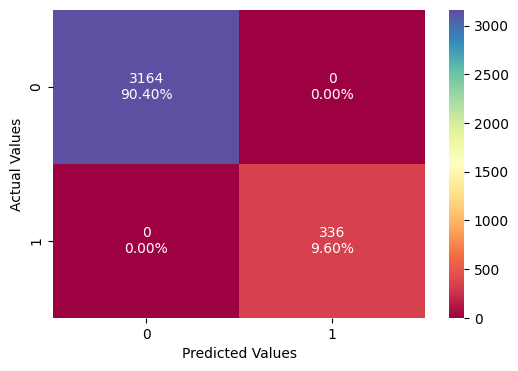

In [ ]:
#Model evaluation -  confusion matrix with training data [with outliers] for default Model
confusion_matrix_classification(defaultModel_outliers,X_train,Y_train)

In [ ]:
#Model evaluation -  Accuracy,recall, Precision, F1 score with training data [with outliers] for default Model
perf_defaultModel_outliers_train = model_evaluation_classification(defaultModel_outliers,X_train,Y_train)
perf_defaultModel_outliers_train

Accuracy  Recall  Precision   F1
0       1.0     1.0        1.0  1.0

#### Visualizing Tree

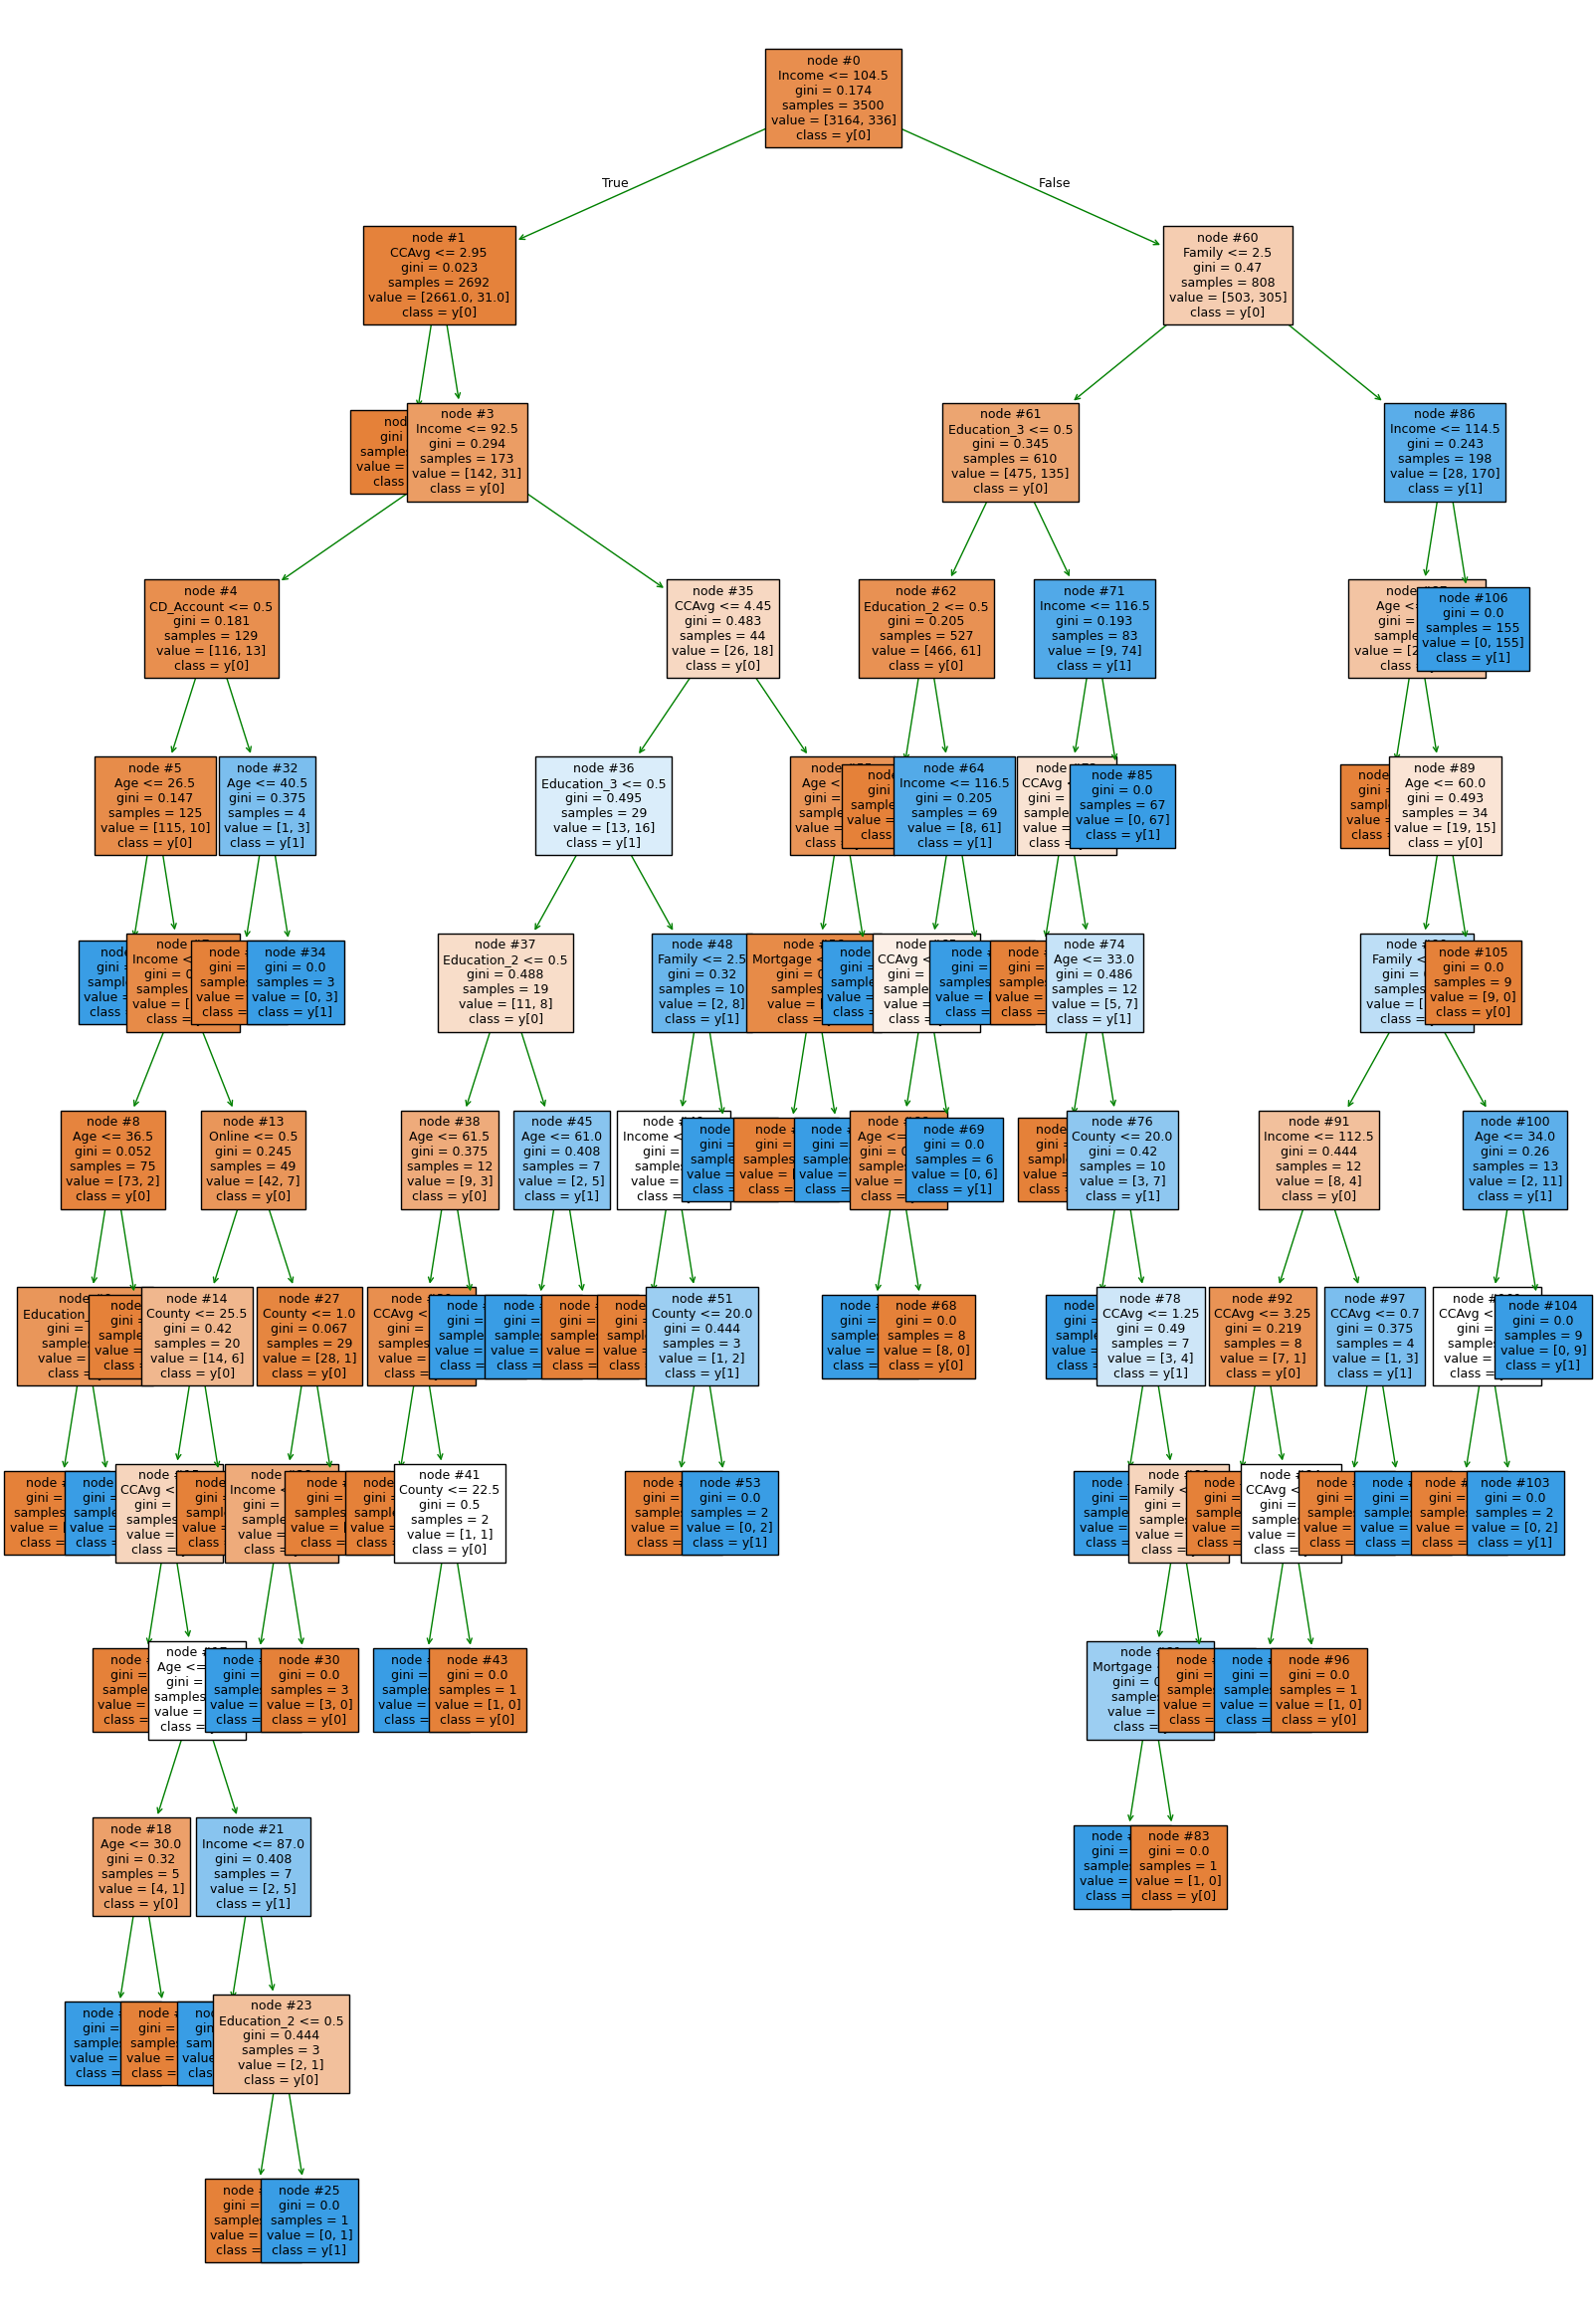

In [ ]:
# Default model with outliers decision tree visualization
cols = X_train.columns.tolist()
plt.figure(figsize=(20,30))
out = tree.plot_tree(defaultModel_outliers, feature_names=cols,class_names=True,filled=True,node_ids=True,fontsize=9 )
for o in out:
  arrow = o.arrow_patch
  if arrow is not None:
    arrow.set_edgecolor('green')
    arrow.set_linewidth(1)
plt.show()

In [ ]:
# Default model with outliers decision tree visualization in text format
print(tree.export_text(show_weights=True,decision_tree=defaultModel_outliers,feature_names=cols ))

|--- Income <= 104.50
|   |--- CCAvg <= 2.95
|   |   |--- weights: [2519.00, 0.00] class: 0
|   |--- CCAvg >  2.95
|   |   |--- Income <= 92.50
|   |   |   |--- CD_Account <= 0.50
|   |   |   |   |--- Age <= 26.50
|   |   |   |   |   |--- weights: [0.00, 1.00] class: 1
|   |   |   |   |--- Age >  26.50
|   |   |   |   |   |--- Income <= 81.50
|   |   |   |   |   |   |--- Age <= 36.50
|   |   |   |   |   |   |   |--- Education_2 <= 0.50
|   |   |   |   |   |   |   |   |--- weights: [12.00, 0.00] class: 0
|   |   |   |   |   |   |   |--- Education_2 >  0.50
|   |   |   |   |   |   |   |   |--- weights: [0.00, 2.00] class: 1
|   |   |   |   |   |   |--- Age >  36.50
|   |   |   |   |   |   |   |--- weights: [61.00, 0.00] class: 0
|   |   |   |   |   |--- Income >  81.50
|   |   |   |   |   |   |--- Online <= 0.50
|   |   |   |   |   |   |   |--- County <= 25.50
|   |   |   |   |   |   |   |   |--- CCAvg <= 3.05
|   |   |   |   |   |   |   |   |   |--- weights: [3.00, 0.00] class: 0
|   | 

**Feature Importances**

In [ ]:
# Feature Importances in Dataframe format for default model with outliers
feature_df = pd.DataFrame(defaultModel_outliers.feature_importances_,columns=['Imp'],index=X_train.columns).sort_values(by='Imp',ascending=False)
print(feature_df)

                         Imp
Income              0.366544
Family              0.208995
Education_2         0.165273
Education_3         0.145189
CCAvg               0.049163
Age                 0.043312
County              0.007796
CD_Account          0.005728
Mortgage            0.005252
Online              0.002747
Securities_Account  0.000000
CreditCard          0.000000
State_CA            0.000000


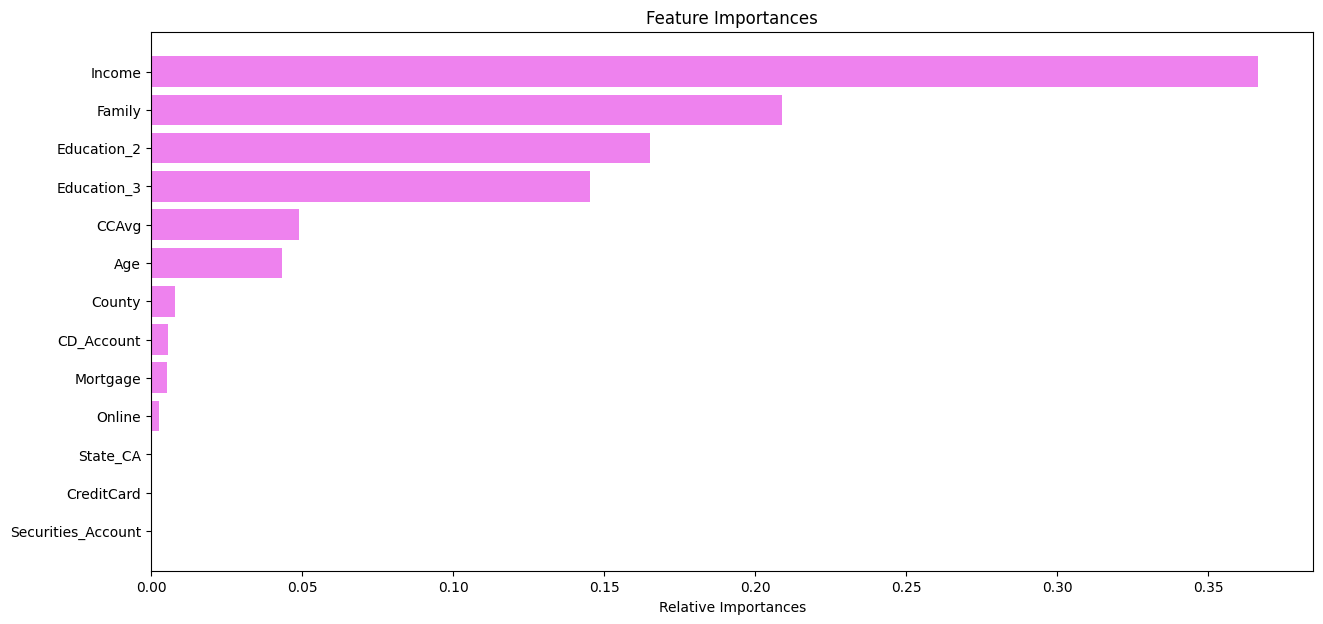

In [ ]:
# Feature Importances in Horizontal bar plot for default model with outliers
importances = defaultModel_outliers.feature_importances_
indices = np.argsort(importances)
plt.figure(figsize=(15,7))
plt.title("Feature Importances")
plt.barh(range(len(indices)),importances[indices],color='violet',align='center')
plt.yticks(ticks=range(len(indices)),labels=[cols[i] for i in indices])
plt.xlabel("Relative Importances")
plt.show()

#### Checking model performance on test data

[[1345   11]
 [  24  120]]


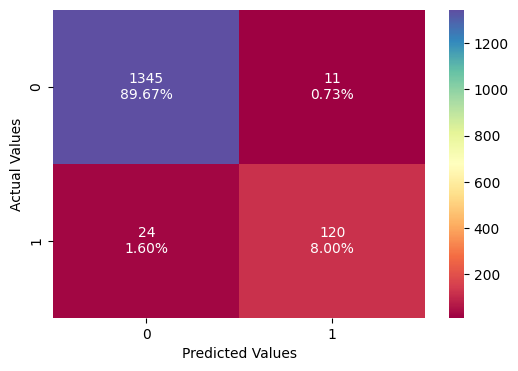

In [ ]:
#Model evaluation -  confusion matrix with test data [with outliers] for default Model
confusion_matrix_classification(defaultModel_outliers,X_test,Y_test)

In [ ]:
#Model evaluation -  Accuracy,recall, Precision, F1 score with test data [with outliers] for default Model
perf_defaultModel_outliers_test = model_evaluation_classification(defaultModel_outliers,X_test,Y_test)
perf_defaultModel_outliers_test

Accuracy    Recall  Precision        F1
0  0.976667  0.833333   0.916031  0.872727

Default Model suffers from generalizability and has 0.83 Recall score and 0.87 F1 score. Can be tuned for better model performance.

### Decision Tree (sklearn default) - Without Outliers

In [ ]:
#Initialize and train with training data for default Decision Tree classifier for dataset without outliers
defaultModel_WO_outliers = DecisionTreeClassifier(random_state=1)
defaultModel_WO_outliers.fit(treatedX_train,treatedY_train)
defaultModel_WO_outliers

DecisionTreeClassifier(random_state=1)

#### Performance Evaluation

[[3164    0]
 [   0  336]]


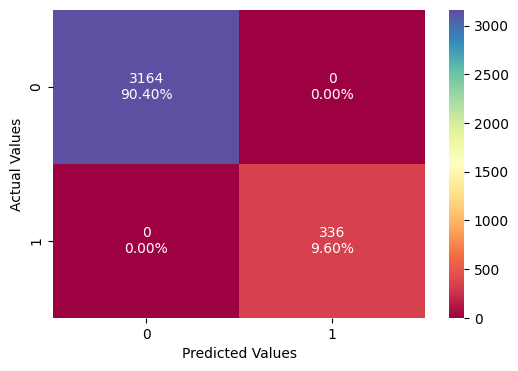

In [ ]:
#Model evaluation -  confusion matrix with training data [without outliers] for default Model
confusion_matrix_classification(defaultModel_WO_outliers,treatedX_train,treatedY_train)

In [ ]:
#Model evaluation -  Accuracy,recall, Precision, F1 score with training data [without outliers] for default Model
perf_defaultModel_WO_outliers_train = model_evaluation_classification(defaultModel_WO_outliers,treatedX_train,treatedY_train)
perf_defaultModel_WO_outliers_train

Accuracy  Recall  Precision   F1
0       1.0     1.0        1.0  1.0

#### Visualizing Tree

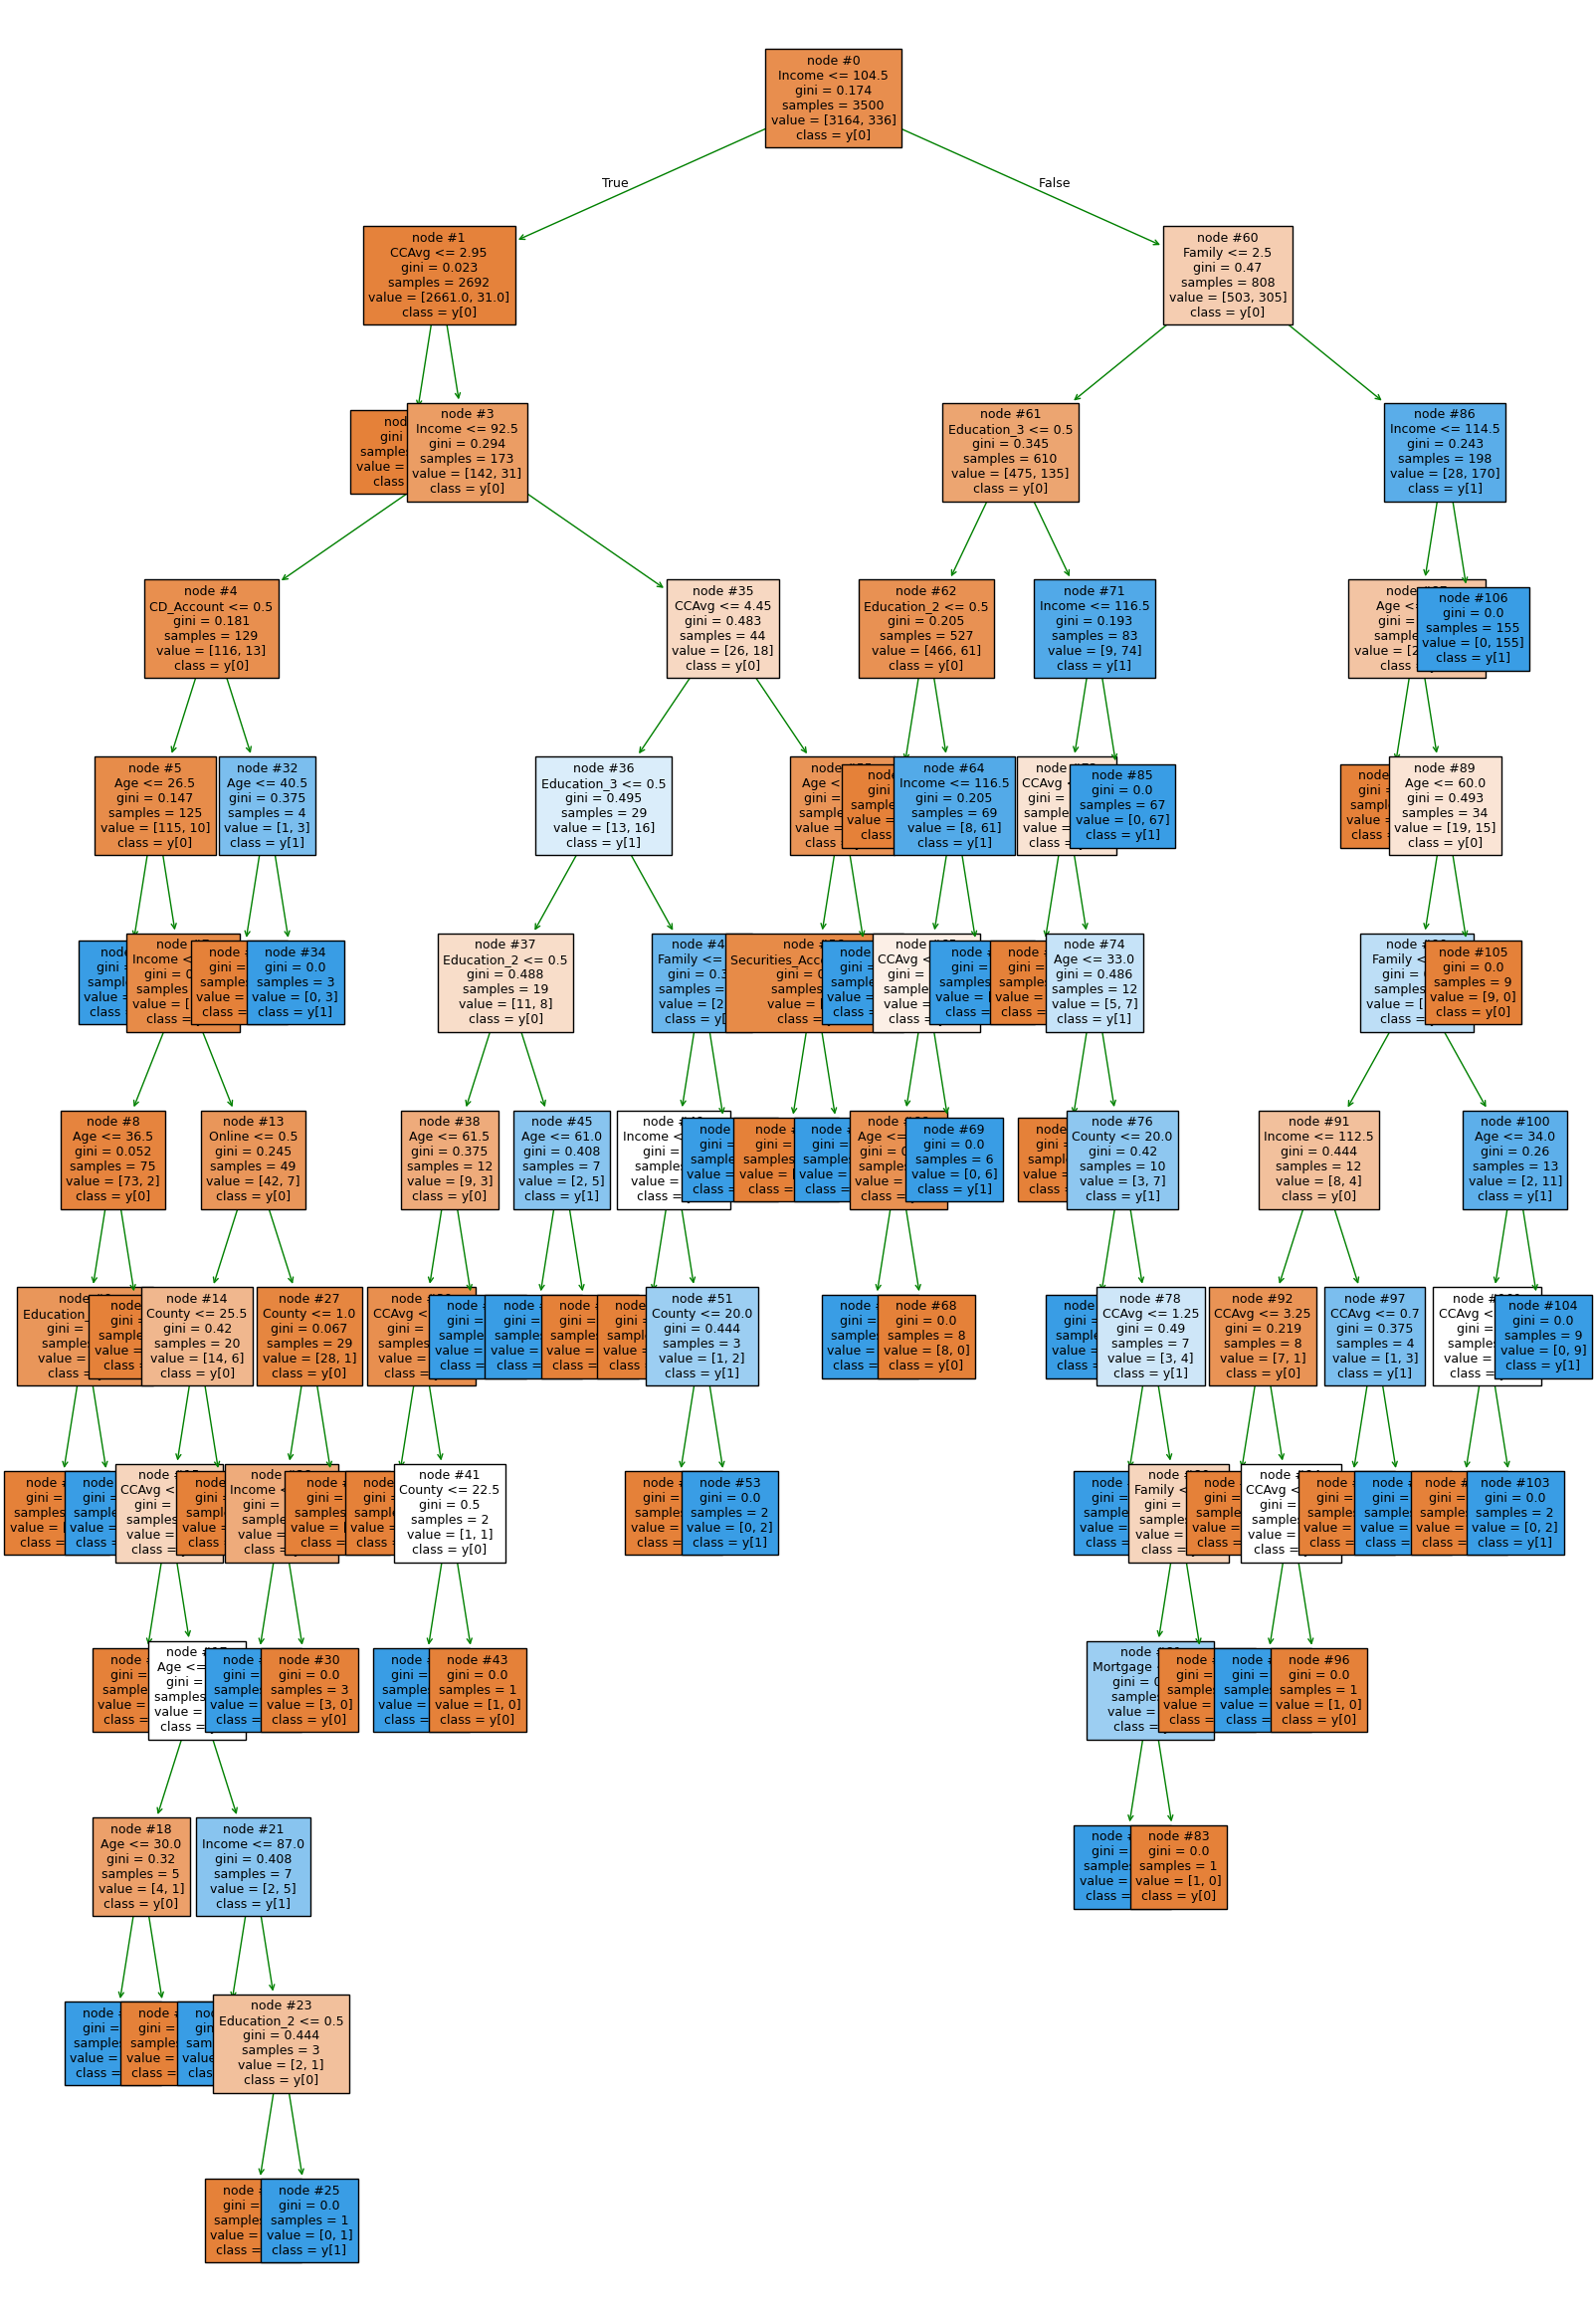

In [ ]:
# Default model without outliers decision tree visualization
cols_WO = treatedX_train.columns.tolist()
plt.figure(figsize=(20,30))
out = tree.plot_tree(defaultModel_WO_outliers, feature_names=cols_WO,class_names=True,filled=True,node_ids=True,fontsize=9 )
for o in out:
  arrow = o.arrow_patch
  if arrow is not None:
    arrow.set_edgecolor('green')
    arrow.set_linewidth(1)
plt.show()

In [ ]:
# Default model without outliers decision tree visualization in text format
print(tree.export_text(show_weights=True,decision_tree=defaultModel_WO_outliers,feature_names=cols_WO ))

|--- Income <= 104.50
|   |--- CCAvg <= 2.95
|   |   |--- weights: [2519.00, 0.00] class: 0
|   |--- CCAvg >  2.95
|   |   |--- Income <= 92.50
|   |   |   |--- CD_Account <= 0.50
|   |   |   |   |--- Age <= 26.50
|   |   |   |   |   |--- weights: [0.00, 1.00] class: 1
|   |   |   |   |--- Age >  26.50
|   |   |   |   |   |--- Income <= 81.50
|   |   |   |   |   |   |--- Age <= 36.50
|   |   |   |   |   |   |   |--- Education_2 <= 0.50
|   |   |   |   |   |   |   |   |--- weights: [12.00, 0.00] class: 0
|   |   |   |   |   |   |   |--- Education_2 >  0.50
|   |   |   |   |   |   |   |   |--- weights: [0.00, 2.00] class: 1
|   |   |   |   |   |   |--- Age >  36.50
|   |   |   |   |   |   |   |--- weights: [61.00, 0.00] class: 0
|   |   |   |   |   |--- Income >  81.50
|   |   |   |   |   |   |--- Online <= 0.50
|   |   |   |   |   |   |   |--- County <= 25.50
|   |   |   |   |   |   |   |   |--- CCAvg <= 3.05
|   |   |   |   |   |   |   |   |   |--- weights: [3.00, 0.00] class: 0
|   | 

In [ ]:
# Feature Importances in Dataframe format for default model without outliers
feature_df = pd.DataFrame(defaultModel_WO_outliers.feature_importances_,columns=['Imp'],index=treatedX_train.columns).sort_values(by='Imp',ascending=False)
print(feature_df)

                         Imp
Income              0.366544
Family              0.208995
Education_2         0.165273
Education_3         0.145189
CCAvg               0.049163
Age                 0.043312
County              0.007796
CD_Account          0.005728
Securities_Account  0.003057
Online              0.002747
Mortgage            0.002195
CreditCard          0.000000
State_CA            0.000000


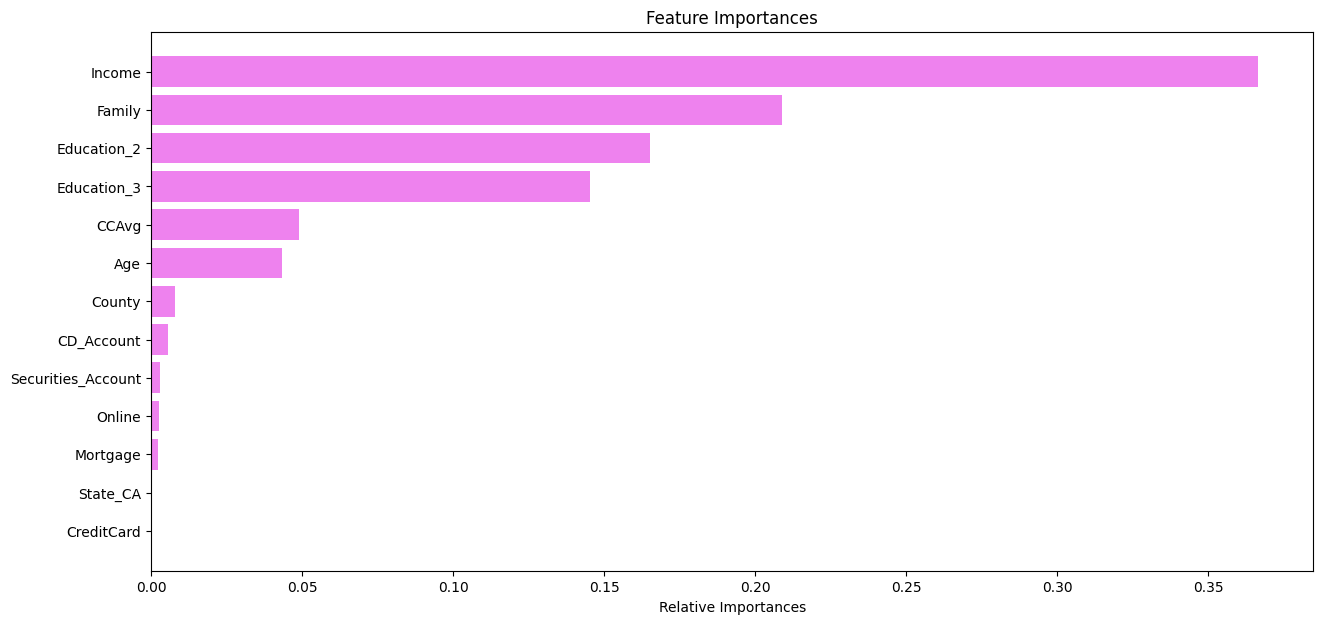

In [ ]:
# Feature Importances in Horizontal bar plot for default model without outliers
importances = defaultModel_WO_outliers.feature_importances_
indices = np.argsort(importances)
plt.figure(figsize=(15,7))
plt.title("Feature Importances")
plt.barh(range(len(indices)),importances[indices],color='violet',align='center')
plt.yticks(ticks=range(len(indices)),labels=[cols[i] for i in indices])
plt.xlabel("Relative Importances")
plt.show()

#### Checking model performance on test data

[[1345   11]
 [  24  120]]


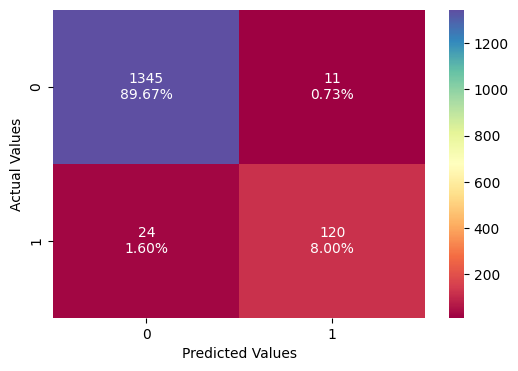

In [ ]:
#Model evaluation -  confusion matrix with test data [without outliers] for default Model
confusion_matrix_classification(defaultModel_WO_outliers,treatedX_test,treatedY_test)

In [ ]:
#Model evaluation -  Accuracy,recall, Precision, F1 score with test data [without outliers] for default Model
perf_defaultModel_WO_outliers_test = model_evaluation_classification(defaultModel_WO_outliers,treatedX_test,treatedY_test)
perf_defaultModel_WO_outliers_test

Accuracy    Recall  Precision        F1
0  0.976667  0.833333   0.916031  0.872727

Default Model suffers from generalizability and has 0.83 Recall score and 0.87 F1 score. Can be tuned for better model performance.

## Model Performance Improvement

In [ ]:
defaultModel_outliers.tree_.max_depth #Find the max_depth of the default tree for rough caliberation for pre-pruning

12

In [ ]:
defaultModel_outliers.min_samples_split #Find the min_samples_split of the default tree for rough caliberation for pre-pruning

2

### Decision Tree - Pre-Pruning - Sklearn

####Dataset with outliers

##### Custom Weight Classifer - Performance and feature importances

In [ ]:
#Pre-pruning - For the given list of hyperparameters, Initialize and train with training data for Decision Tree classifier with customWeight as class weight with those params for dataset with outliers
max_depth_values = np.arange(2,7,2)
max_leaf_nodes_values = [50, 75, 100, 150, 250]
min_samples_split_values = [10, 30, 50, 70, 90]

best_estimator = None
best_recall_score_diff = float('inf')
best_recall_test = 0.0

for max_depth in max_depth_values:
  for max_leaf_nodes in max_leaf_nodes_values:
    for min_samples_split in min_samples_split_values:
      estimator = DecisionTreeClassifier(random_state=1,max_depth=max_depth,max_leaf_nodes=max_leaf_nodes,min_samples_split=min_samples_split,class_weight={0:0.15,1:0.85})
      estimator.fit(X_train,Y_train)
      y_pred_train = estimator.predict(X_train)
      y_pred_test = estimator.predict(X_test)
      # Assess the best recall score for test and best minimum recall score difference of training and test for assessment of the model on generalizability
      recall_train = recall_score(Y_train,y_pred_train)
      recall_test = recall_score(Y_test,y_pred_test)
      score_diff = np.abs(recall_train - recall_test)
      if score_diff < best_recall_score_diff and recall_test > best_recall_test:
        best_recall_score_diff = score_diff
        best_recall_test = recall_test
        best_estimator = estimator

print("Best Estimator:",best_estimator,"\nmax_depth:",best_estimator.tree_.max_depth,"\nmax_leaf_nodes:",best_estimator.max_leaf_nodes,
      "\nmin_samples_split:",best_estimator.min_samples_split,"\nrecall score difference:{:.3f}".format(best_recall_score_diff),"\nrecall test score:{:.3f}".format(recall_test))

Best Estimator: DecisionTreeClassifier(class_weight={0: 0.15, 1: 0.85}, max_depth=4,
                       max_leaf_nodes=50, min_samples_split=10, random_state=1) 
max_depth: 4 
max_leaf_nodes: 50 
min_samples_split: 10 
recall score difference:0.014 
recall test score:0.951


In [ ]:
# Assign the best_estimator found in previous step and train with training data with outliers
prepruneModel_customWeight_outliers = best_estimator
prepruneModel_customWeight_outliers.fit(X_train,Y_train)

DecisionTreeClassifier(class_weight={0: 0.15, 1: 0.85}, max_depth=4,
                       max_leaf_nodes=50, min_samples_split=10, random_state=1)

**Checking performance on training data**

[[3066   98]
 [   7  329]]


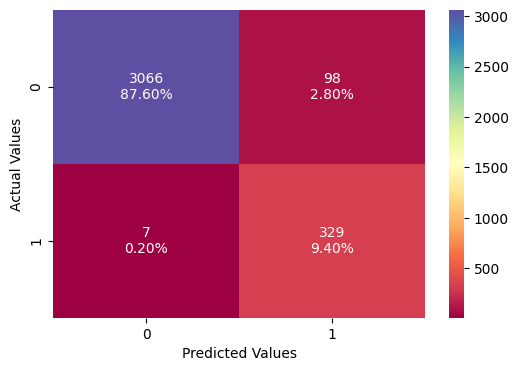

In [ ]:
#Model evaluation -  confusion matrix with training data [with outliers] for Preprune - customWeight Model
confusion_matrix_classification(prepruneModel_customWeight_outliers,X_train,Y_train)

In [ ]:
#Model evaluation -  Accuracy,recall, Precision, F1 score with training data [with outliers] for Preprune - customWeight Model
perf_prepruneModel_customWeight_outliers_train = model_evaluation_classification(prepruneModel_customWeight_outliers,X_train,Y_train)
perf_prepruneModel_customWeight_outliers_train

Accuracy    Recall  Precision        F1
0      0.97  0.979167   0.770492  0.862385

**Visualizing the Decision Tree**

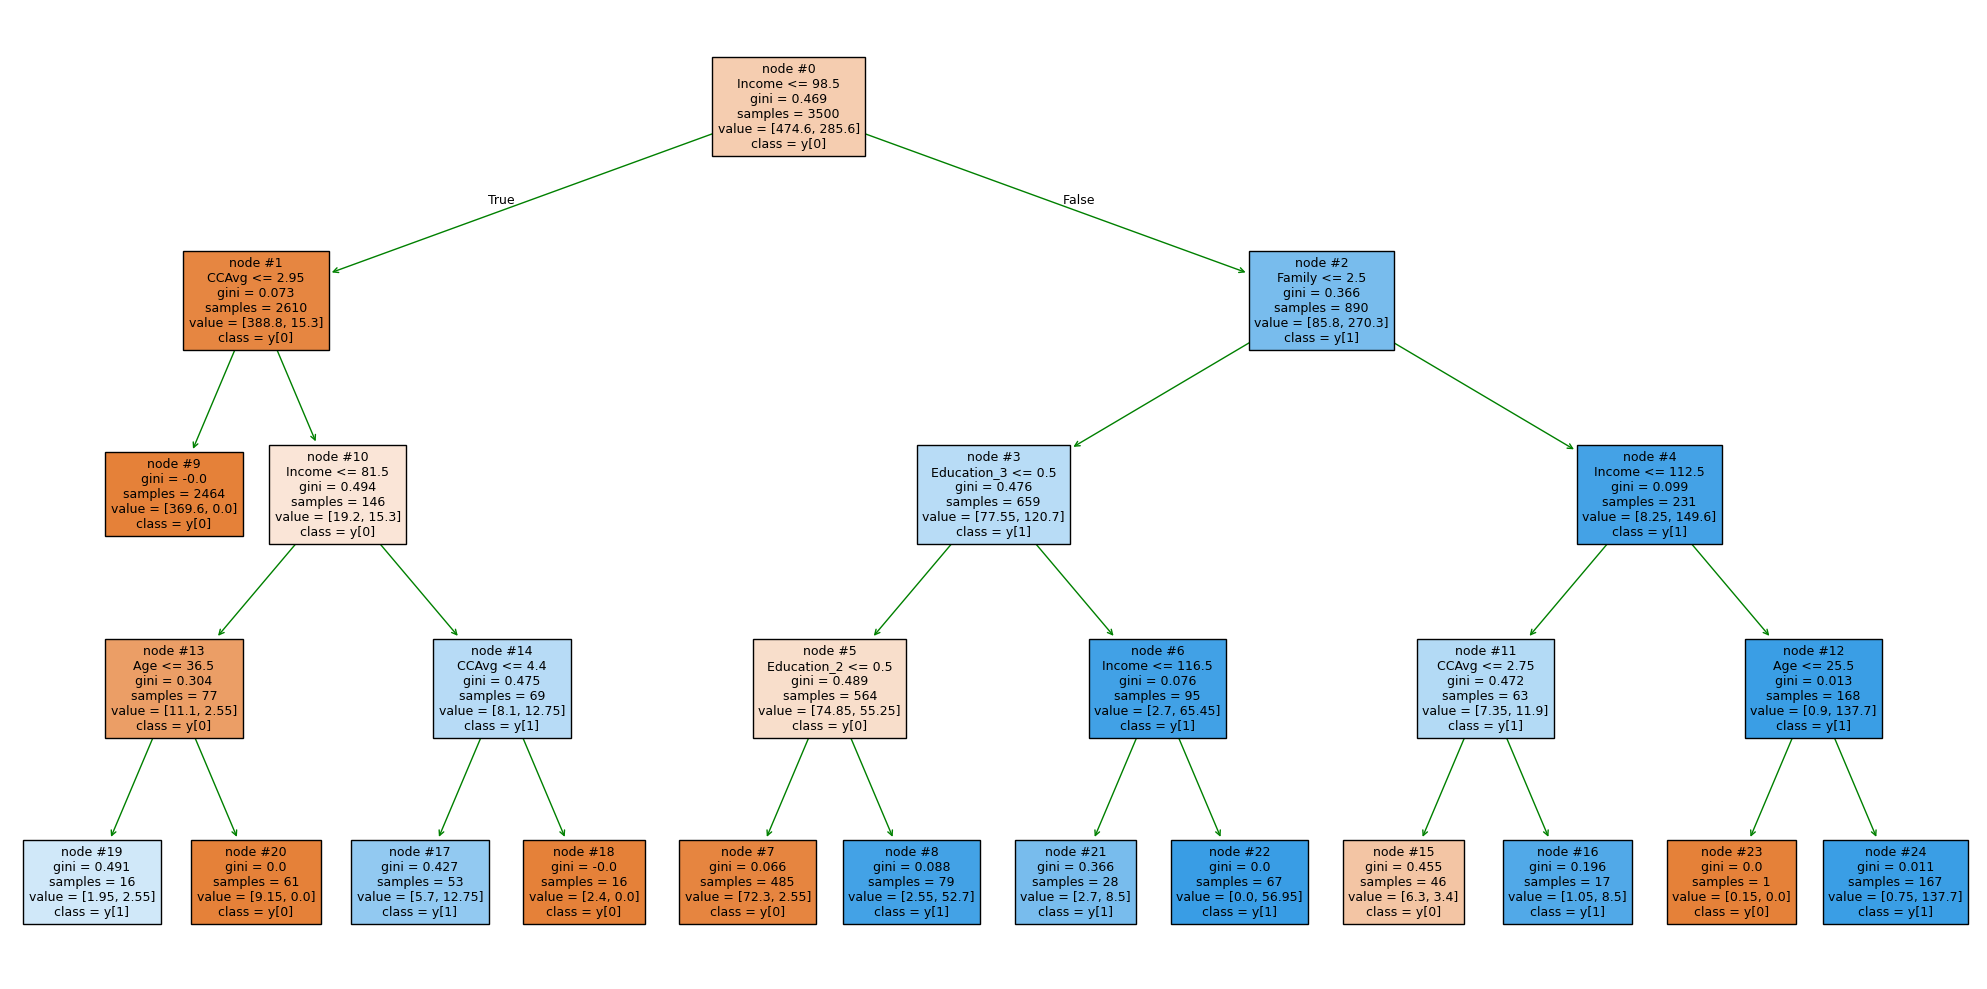

In [ ]:
# Preprune - customWeight Model with outliers decision tree visualization
plt.figure(figsize=(20,10))
cols = X_train.columns.tolist()
out = tree.plot_tree(prepruneModel_customWeight_outliers,feature_names=cols,class_names=True,filled=True,node_ids=True,fontsize=9)
for o in out:
  arrow = o.arrow_patch
  if arrow is not None:
    arrow.set_edgecolor('green')
    arrow.set_linewidth(1)
plt.tight_layout()
plt.show()

In [ ]:
# Preprune - customWeight Model with outliers decision tree visualization in text format
print(tree.export_text(decision_tree=prepruneModel_customWeight_outliers,feature_names=cols,show_weights=True))

|--- Income <= 98.50
|   |--- CCAvg <= 2.95
|   |   |--- weights: [369.60, 0.00] class: 0
|   |--- CCAvg >  2.95
|   |   |--- Income <= 81.50
|   |   |   |--- Age <= 36.50
|   |   |   |   |--- weights: [1.95, 2.55] class: 1
|   |   |   |--- Age >  36.50
|   |   |   |   |--- weights: [9.15, 0.00] class: 0
|   |   |--- Income >  81.50
|   |   |   |--- CCAvg <= 4.40
|   |   |   |   |--- weights: [5.70, 12.75] class: 1
|   |   |   |--- CCAvg >  4.40
|   |   |   |   |--- weights: [2.40, 0.00] class: 0
|--- Income >  98.50
|   |--- Family <= 2.50
|   |   |--- Education_3 <= 0.50
|   |   |   |--- Education_2 <= 0.50
|   |   |   |   |--- weights: [72.30, 2.55] class: 0
|   |   |   |--- Education_2 >  0.50
|   |   |   |   |--- weights: [2.55, 52.70] class: 1
|   |   |--- Education_3 >  0.50
|   |   |   |--- Income <= 116.50
|   |   |   |   |--- weights: [2.70, 8.50] class: 1
|   |   |   |--- Income >  116.50
|   |   |   |   |--- weights: [0.00, 56.95] class: 1
|   |--- Family >  2.50
|   |   |-

**Feature Importance**

In [ ]:
# Feature Importances in Dataframe format for Preprune - customWeight Model with outliers
pd.DataFrame(prepruneModel_customWeight_outliers.feature_importances_,columns=['Imp'],index=X_train.columns).sort_values(by='Imp',ascending=False)

Imp
Income              0.633324
Education_2         0.165561
Education_3         0.079019
Family              0.062143
CCAvg               0.053077
Age                 0.006876
Mortgage            0.000000
Securities_Account  0.000000
CD_Account          0.000000
Online              0.000000
CreditCard          0.000000
County              0.000000
State_CA            0.000000

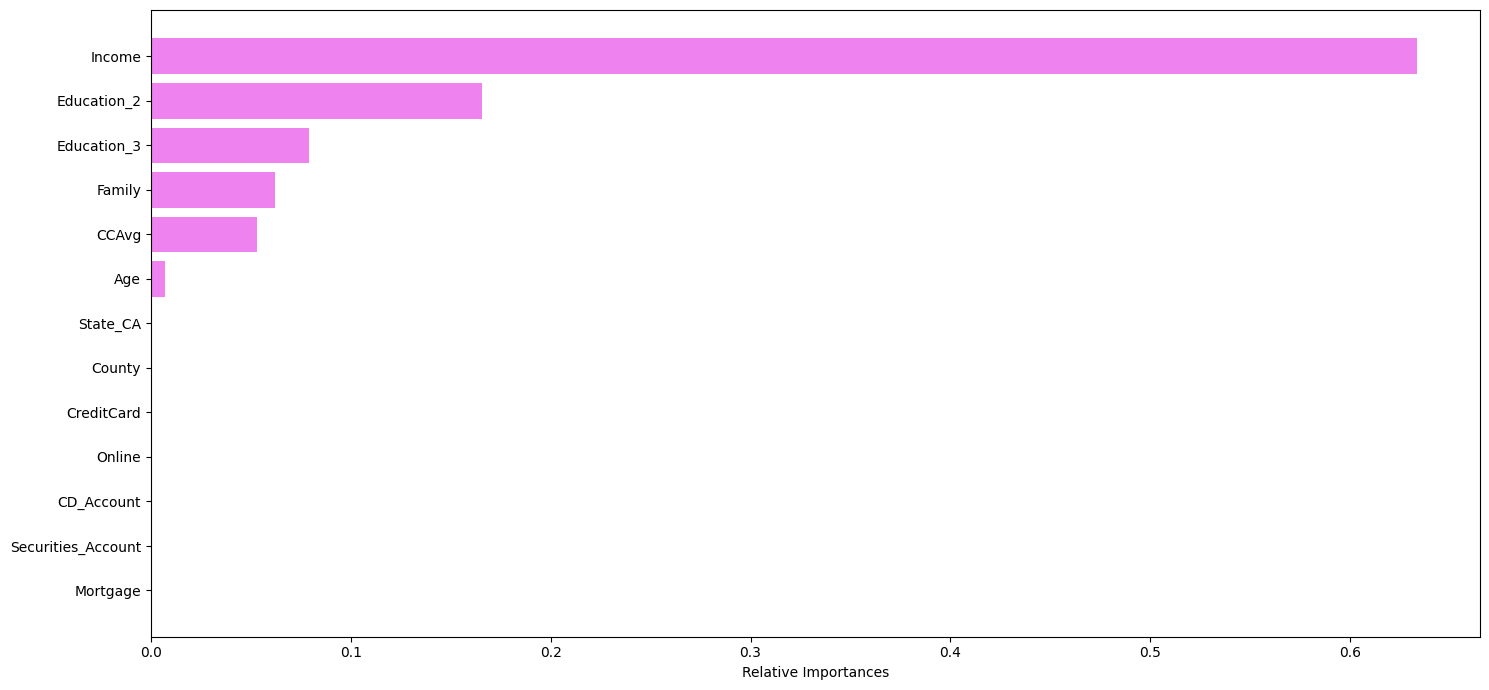

In [ ]:
# Feature Importances in Horizontal bar plot for Preprune - customWeight Model with outliers
plt.figure(figsize=(15,7))
importances = prepruneModel_customWeight_outliers.feature_importances_
indices = np.argsort(importances)
plt.barh(range(len(indices)),importances[indices],align='center',color='violet')
plt.yticks(range(len(indices)),[X_train.columns[i] for i in indices])
plt.xlabel("Relative Importances")
plt.tight_layout()
plt.show()

**Checking model performance on test data**

[[1312   44]
 [   5  139]]


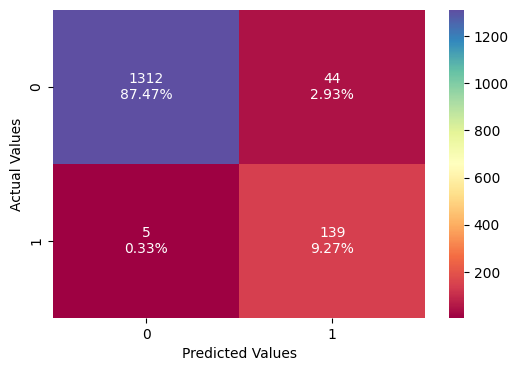

In [ ]:
#Model evaluation -  confusion matrix with test data [with outliers] for Preprune - customWeight Model
confusion_matrix_classification( prepruneModel_customWeight_outliers,X_test,Y_test)

In [ ]:
#Model evaluation -  Accuracy,recall, Precision, F1 score with test data [with outliers] for Preprune - customWeight Model
perf_preprunemodel_customWeight_outliers_test = model_evaluation_classification(prepruneModel_customWeight_outliers,X_test,Y_test)
perf_preprunemodel_customWeight_outliers_test

Accuracy    Recall  Precision        F1
0  0.967333  0.965278   0.759563  0.850153

Preprune - customWeight Model demonstrates very good generalizability and has 0.965 Recall score and 0.85 F1 score. Can tune with 'Balanced' class weight and check performance.

##### Balanced Weight Classifer - Performance and feature importances

In [ ]:
#Pre-pruning - For the given list of hyperparameters, Initialize and train with training data for Decision Tree classifier with Balanced as class weight with those params for dataset with outliers
max_depth_values = np.arange(2,7,2)
max_leaf_nodes_values = [50, 75, 100, 150, 250]
min_samples_split_values = [10, 30, 50, 70, 90]

best_estimator = None
best_recall_score_diff = float('inf')
best_recall_test = 0.0

for max_depth in max_depth_values:
  for max_leaf_nodes in max_leaf_nodes_values:
    for min_samples_split in min_samples_split_values:
      estimator = DecisionTreeClassifier(random_state=1,max_depth=max_depth,max_leaf_nodes=max_leaf_nodes,min_samples_split=min_samples_split,class_weight='balanced')
      estimator.fit(X_train,Y_train)
      y_pred_train = estimator.predict(X_train)
      y_pred_test = estimator.predict(X_test)
#Assess the best recall score for test and best minimum recall score difference of training and test for assessment of the model on generalizability
      recall_train = recall_score(Y_train,y_pred_train)
      recall_test = recall_score(Y_test,y_pred_test)
      score_diff = np.abs(recall_train - recall_test)
      if score_diff < best_recall_score_diff and recall_test > best_recall_test:
        best_recall_score_diff = score_diff
        best_recall_test = recall_test
        best_estimator = estimator

print("Best Estimator:",best_estimator,"\nmax_depth:",best_estimator.tree_.max_depth,"\nmax_leaf_nodes:",best_estimator.max_leaf_nodes,
      "\nmin_samples_split:",best_estimator.min_samples_split,"\nrecall score difference:{:.3f}".format(best_recall_score_diff),"\nrecall test score:{:.3f}".format(recall_test))

Best Estimator: DecisionTreeClassifier(class_weight='balanced', max_depth=2, max_leaf_nodes=50,
                       min_samples_split=10, random_state=1) 
max_depth: 2 
max_leaf_nodes: 50 
min_samples_split: 10 
recall score difference:0.000 
recall test score:0.951


In [ ]:
# Assign the best_estimator found in previous step and train with training data with outliers
prepruneModel_balanced_outliers = best_estimator
prepruneModel_balanced_outliers.fit(X_train,Y_train)

DecisionTreeClassifier(class_weight='balanced', max_depth=2, max_leaf_nodes=50,
                       min_samples_split=10, random_state=1)

**Checking performance on training data**

[[2464  700]
 [   0  336]]


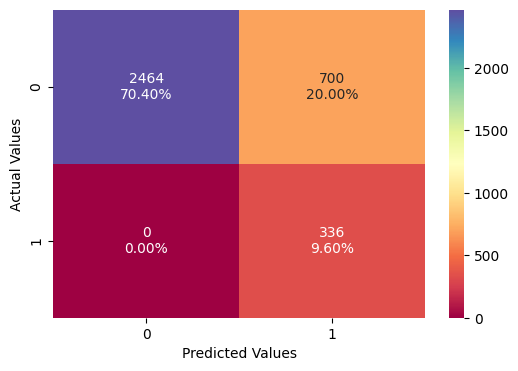

In [ ]:
#Model evaluation -  confusion matrix with training data [with outliers] for Preprune - Balanced Model
confusion_matrix_classification(prepruneModel_balanced_outliers,X_train,Y_train)

In [ ]:
#Model evaluation -  Accuracy,recall, Precision, F1 score with training data [with outliers] for Preprune - Balanced Model
perf_prepruneModel_balanced_outliers_train = model_evaluation_classification(prepruneModel_balanced_outliers,X_train,Y_train)
perf_prepruneModel_balanced_outliers_train

Accuracy  Recall  Precision        F1
0       0.8     1.0   0.324324  0.489796

**Visualizing the Decision Tree**

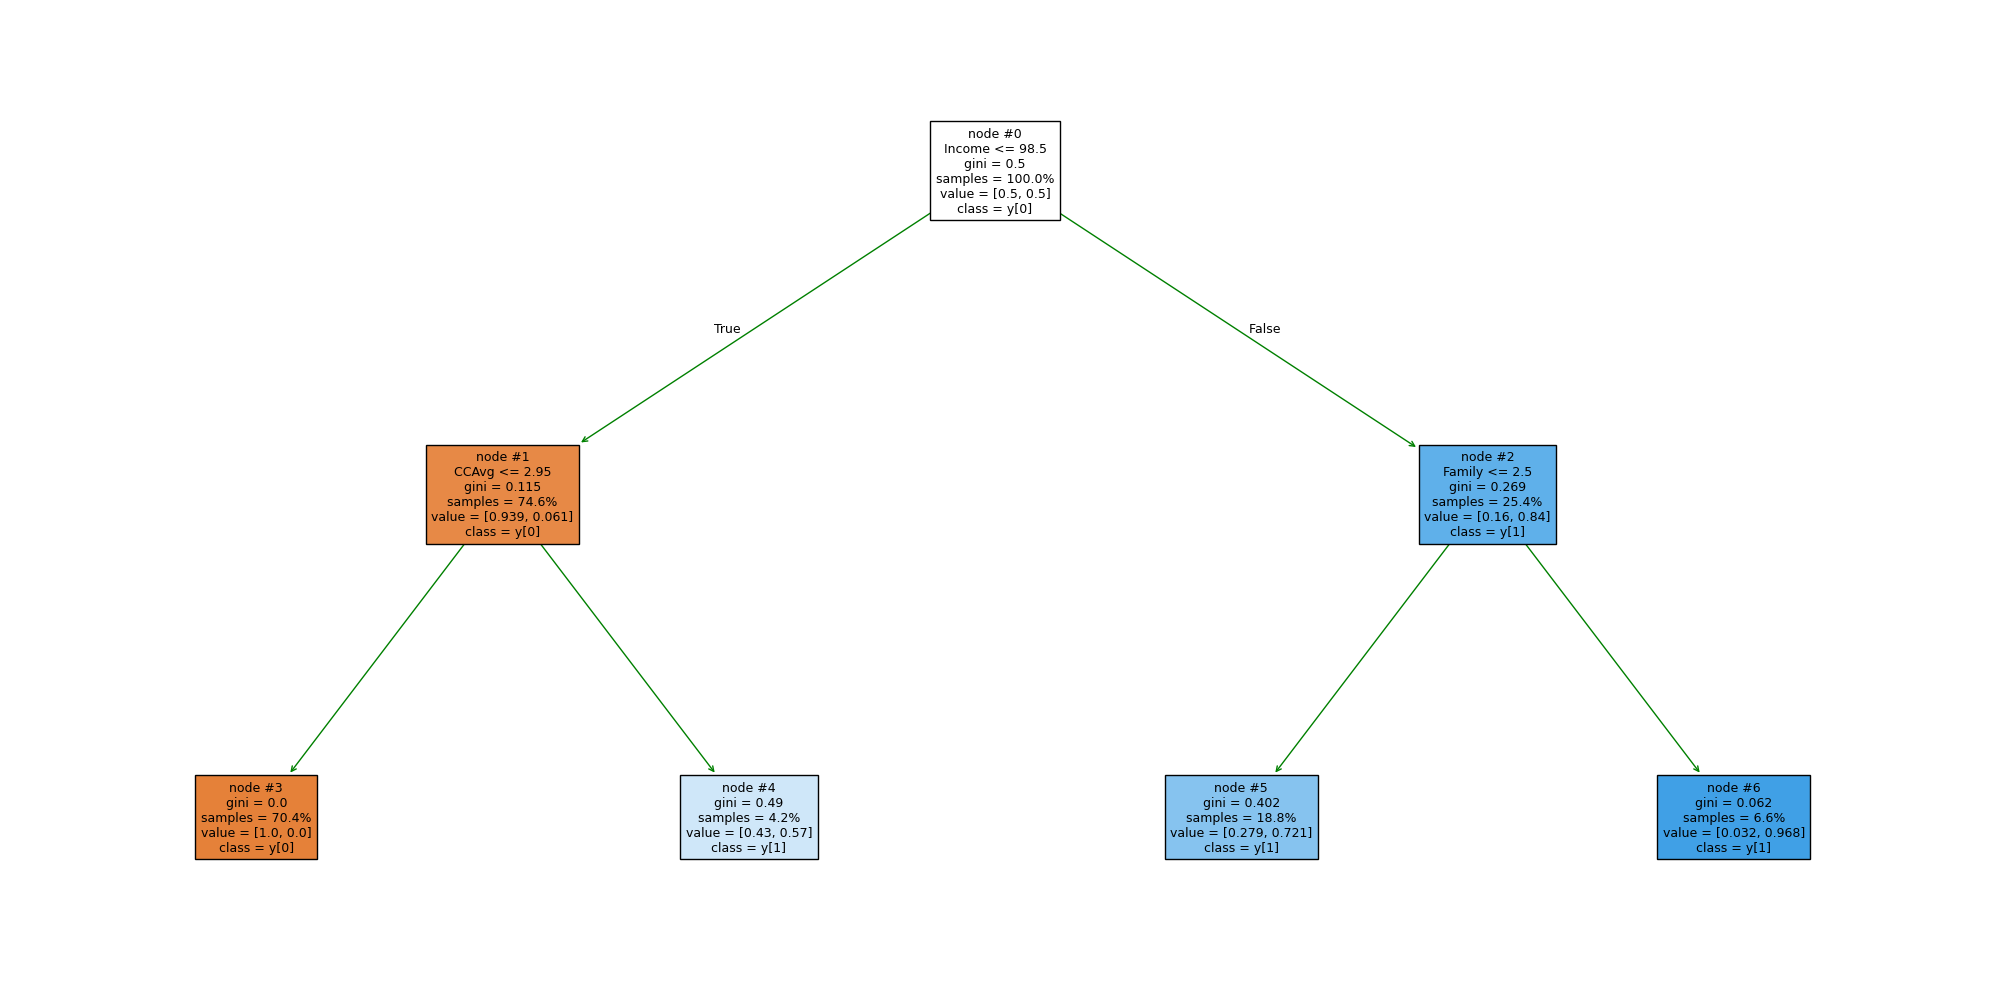

In [ ]:
# Preprune - Balanced Model with outliers decision tree visualization
plt.figure(figsize=(20,10))
cols = X_train.columns.tolist()
out = tree.plot_tree(prepruneModel_balanced_outliers,feature_names=cols,class_names=True,filled=True,node_ids=True,fontsize=9,proportion=True)
for o in out:
  arrow = o.arrow_patch
  if arrow is not None:
    arrow.set_edgecolor('green')
    arrow.set_linewidth(1)
plt.tight_layout()
plt.show()

In [ ]:
# Preprune - Balanced Model with outliers decision tree visualization in text format
print(tree.export_text(decision_tree=prepruneModel_balanced_outliers,feature_names=cols,show_weights=True))

|--- Income <= 98.50
|   |--- CCAvg <= 2.95
|   |   |--- weights: [1362.83, 0.00] class: 0
|   |--- CCAvg >  2.95
|   |   |--- weights: [70.80, 93.75] class: 1
|--- Income >  98.50
|   |--- Family <= 2.50
|   |   |--- weights: [285.95, 739.58] class: 1
|   |--- Family >  2.50
|   |   |--- weights: [30.42, 916.67] class: 1



**Feature Importance**

In [ ]:
# Feature Importances in Dataframe format for Preprune - Balanced Model with outliers
pd.DataFrame(prepruneModel_balanced_outliers.feature_importances_,columns=['Imp'],index=X_train.columns).sort_values(by='Imp',ascending=False)

Imp
Income              0.870403
CCAvg               0.079565
Family              0.050032
Age                 0.000000
Mortgage            0.000000
Securities_Account  0.000000
CD_Account          0.000000
Online              0.000000
CreditCard          0.000000
County              0.000000
Education_2         0.000000
Education_3         0.000000
State_CA            0.000000

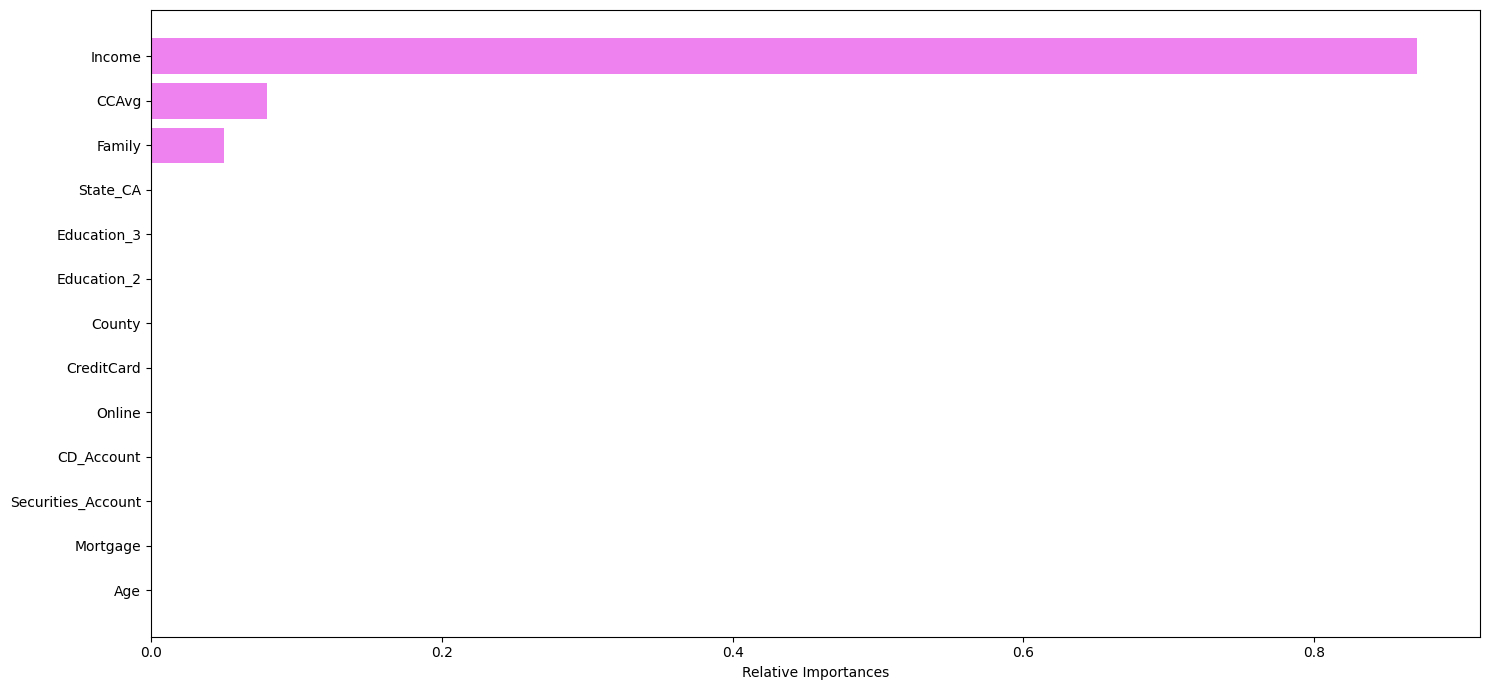

In [ ]:
# Feature Importances in Horizontal bar plot for Preprune - Balanced Model with outliers
plt.figure(figsize=(15,7))
importances = prepruneModel_balanced_outliers.feature_importances_
indices = np.argsort(importances)
plt.barh(range(len(indices)),importances[indices],align='center',color='violet')
plt.yticks(range(len(indices)),[X_train.columns[i] for i in indices])
plt.xlabel("Relative Importances")
plt.tight_layout()
plt.show()

**Checking model performance on test data**

[[1080  276]
 [   0  144]]


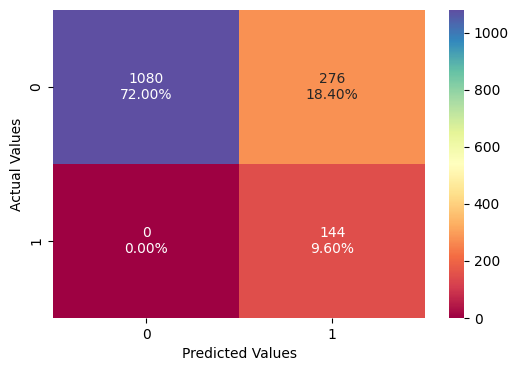

In [ ]:
#Model evaluation -  confusion matrix with test data [with outliers] for Preprune - Balanced Model
confusion_matrix_classification( prepruneModel_balanced_outliers,X_test,Y_test)

In [ ]:
#Model evaluation -  Accuracy,recall, Precision, F1 score with test data [with outliers] for Preprune - Balanced Model
perf_preprunemodel_balanced_outliers_test = model_evaluation_classification(prepruneModel_balanced_outliers,X_test,Y_test)
perf_preprunemodel_balanced_outliers_test

Accuracy  Recall  Precision        F1
0     0.816     1.0   0.342857  0.510638

Preprune - Balanced Model demonstrates very good generalizability and has ideal 1 Recall score BUT 0.51 F1 score,though F1 score is better with test data. If its trade off of recall and F1 score, this model would need to be traded second when compared with PrePrune customWeight Model


####Dataset without outliers

##### Custom Weight Classifer - Performance and feature importances

In [ ]:
#Pre-pruning - For the given list of hyperparameters, Initialize and train with training data for Decision Tree classifier with customWeight as class weight with those params for dataset without outliers
max_depth_values = np.arange(2,7,2)
max_leaf_nodes_values = [50, 75, 100, 150, 250]
min_samples_split_values = [10, 30, 50, 70, 90]

best_estimator = None
best_recall_score_diff = float('inf')
best_recall_test = 0.0

for max_depth in max_depth_values:
  for max_leaf_nodes in max_leaf_nodes_values:
    for min_samples_split in min_samples_split_values:
      estimator = DecisionTreeClassifier(random_state=1,max_depth=max_depth,max_leaf_nodes=max_leaf_nodes,min_samples_split=min_samples_split,class_weight={0:0.15,1:0.85})
      estimator.fit(treatedX_train,treatedY_train)
      y_pred_train = estimator.predict(treatedX_train)
      y_pred_test = estimator.predict(treatedX_test)
#Assess the best recall score for test and best minimum recall score difference of training and test for assessment of the model on generalizability
      recall_train = recall_score(treatedY_train,y_pred_train)
      recall_test = recall_score(treatedY_test,y_pred_test)
      score_diff = np.abs(recall_train - recall_test)
      if score_diff < best_recall_score_diff and recall_test > best_recall_test:
        best_recall_score_diff = score_diff
        best_recall_test = recall_test
        best_estimator = estimator

print("Best Estimator:",best_estimator,"\nmax_depth:",best_estimator.tree_.max_depth,"\nmax_leaf_nodes:",best_estimator.max_leaf_nodes,
      "\nmin_samples_split:",best_estimator.min_samples_split,"\nrecall score difference:{:.3f}".format(best_recall_score_diff),"\nrecall test score:{:.3f}".format(recall_test))

Best Estimator: DecisionTreeClassifier(class_weight={0: 0.15, 1: 0.85}, max_depth=4,
                       max_leaf_nodes=50, min_samples_split=10, random_state=1) 
max_depth: 4 
max_leaf_nodes: 50 
min_samples_split: 10 
recall score difference:0.014 
recall test score:0.951


In [ ]:
# Assign the best_estimator found in previous step and train with training data without outliers
prepruneModel_customWeight_WO_outliers = best_estimator
prepruneModel_customWeight_WO_outliers.fit(treatedX_train,treatedY_train)

DecisionTreeClassifier(class_weight={0: 0.15, 1: 0.85}, max_depth=4,
                       max_leaf_nodes=50, min_samples_split=10, random_state=1)

**Checking performance on training data**

[[3066   98]
 [   7  329]]


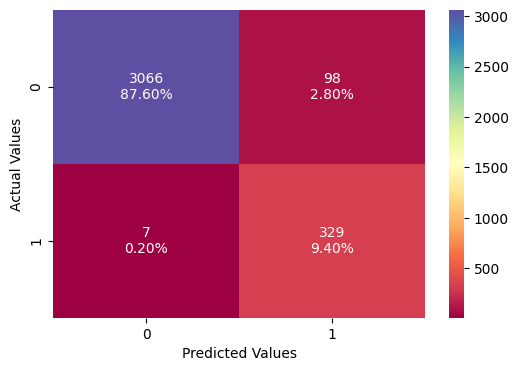

In [ ]:
#Model evaluation -  confusion matrix with training data [without outliers] for Preprune - customWeight Model
confusion_matrix_classification(prepruneModel_customWeight_WO_outliers,treatedX_train,treatedY_train)

In [ ]:
#Model evaluation -  Accuracy,recall, Precision, F1 score with training data [without outliers] for Preprune - customWeight Model
perf_prepruneModel_customWeight_WO_outliers_train = model_evaluation_classification(prepruneModel_customWeight_WO_outliers,treatedX_train,treatedY_train)
perf_prepruneModel_customWeight_WO_outliers_train

Accuracy    Recall  Precision        F1
0      0.97  0.979167   0.770492  0.862385

**Visualizing the Decision Tree**

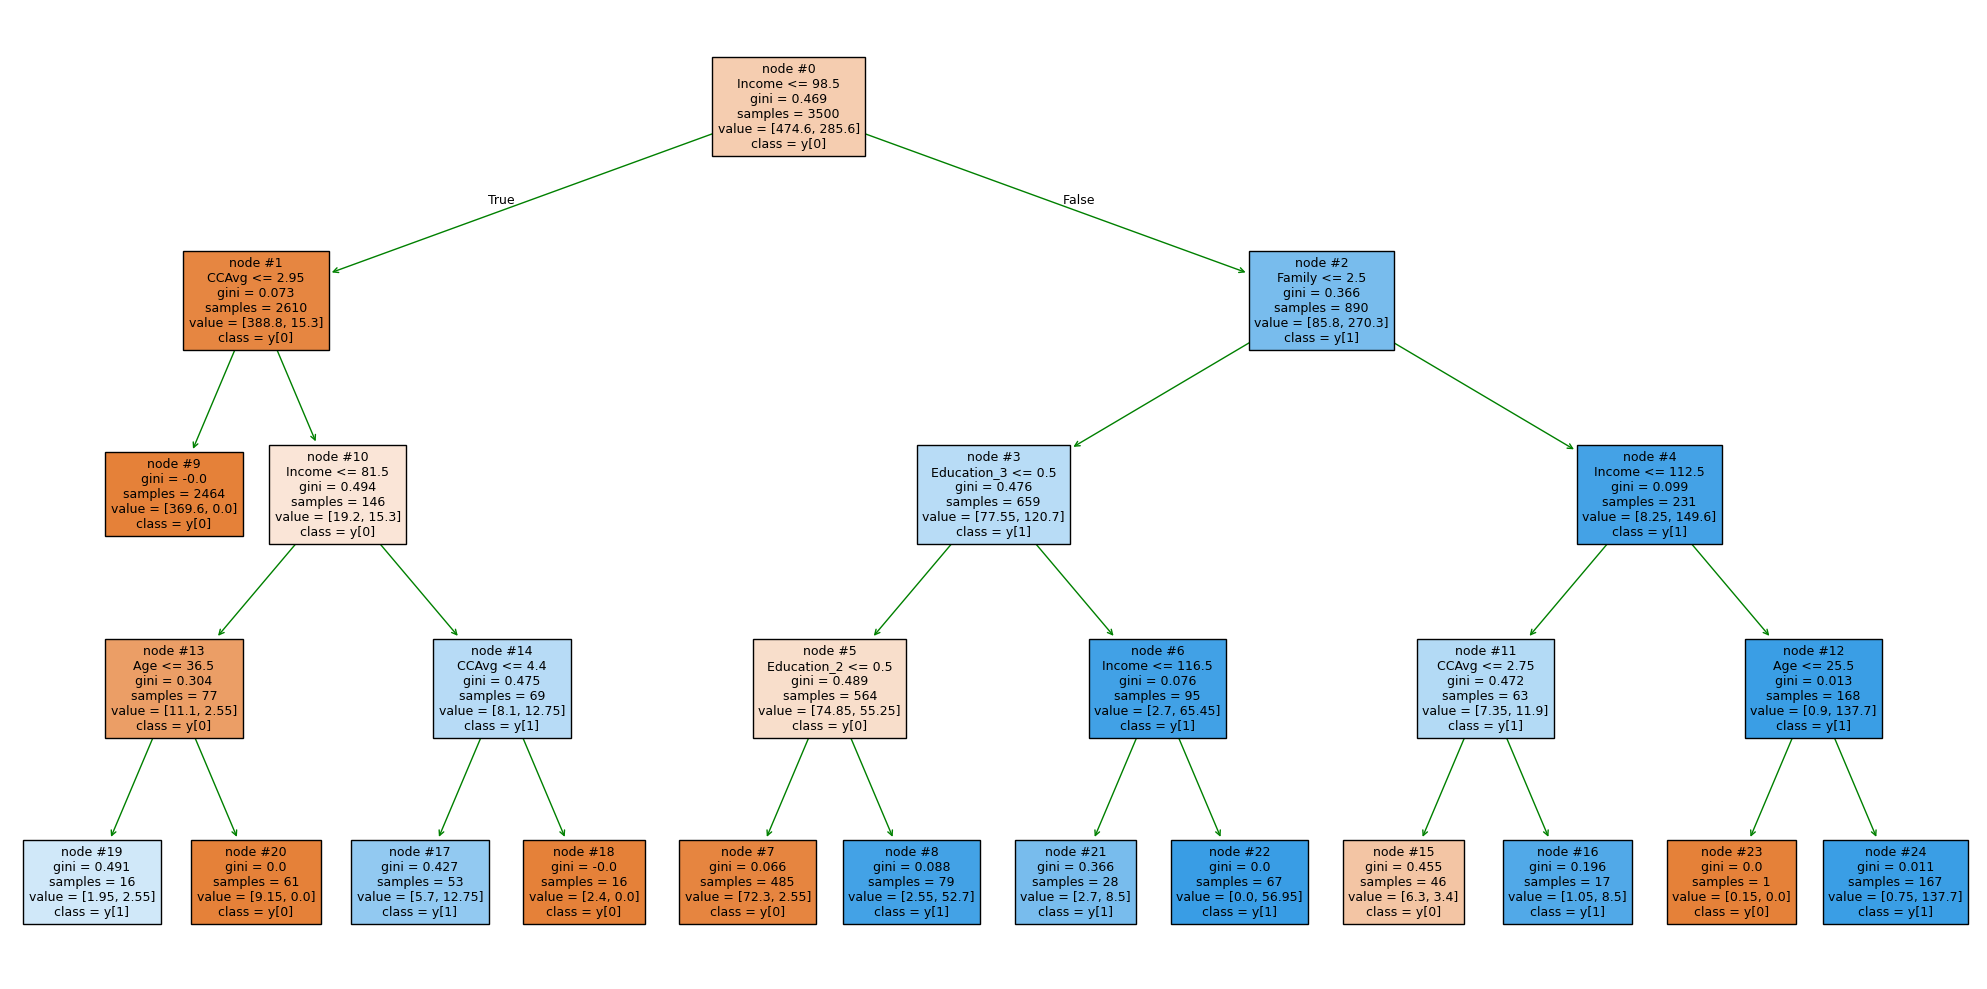

In [ ]:
# Preprune - customWeight Model without outliers decision tree visualization
plt.figure(figsize=(20,10))
cols = treatedX_train.columns.tolist()
out = tree.plot_tree(prepruneModel_customWeight_WO_outliers,feature_names=cols,class_names=True,filled=True,node_ids=True,fontsize=9)
for o in out:
  arrow = o.arrow_patch
  if arrow is not None:
    arrow.set_edgecolor('green')
    arrow.set_linewidth(1)
plt.tight_layout()
plt.show()

In [ ]:
# Preprune - customWeight Model without outliers decision tree visualization in text format
print(tree.export_text(decision_tree=prepruneModel_customWeight_WO_outliers,feature_names=cols,show_weights=True))

|--- Income <= 98.50
|   |--- CCAvg <= 2.95
|   |   |--- weights: [369.60, 0.00] class: 0
|   |--- CCAvg >  2.95
|   |   |--- Income <= 81.50
|   |   |   |--- Age <= 36.50
|   |   |   |   |--- weights: [1.95, 2.55] class: 1
|   |   |   |--- Age >  36.50
|   |   |   |   |--- weights: [9.15, 0.00] class: 0
|   |   |--- Income >  81.50
|   |   |   |--- CCAvg <= 4.40
|   |   |   |   |--- weights: [5.70, 12.75] class: 1
|   |   |   |--- CCAvg >  4.40
|   |   |   |   |--- weights: [2.40, 0.00] class: 0
|--- Income >  98.50
|   |--- Family <= 2.50
|   |   |--- Education_3 <= 0.50
|   |   |   |--- Education_2 <= 0.50
|   |   |   |   |--- weights: [72.30, 2.55] class: 0
|   |   |   |--- Education_2 >  0.50
|   |   |   |   |--- weights: [2.55, 52.70] class: 1
|   |   |--- Education_3 >  0.50
|   |   |   |--- Income <= 116.50
|   |   |   |   |--- weights: [2.70, 8.50] class: 1
|   |   |   |--- Income >  116.50
|   |   |   |   |--- weights: [0.00, 56.95] class: 1
|   |--- Family >  2.50
|   |   |-

**Feature Importance**

In [ ]:
# Feature Importances in Dataframe format for Preprune - customWeight Model without outliers
pd.DataFrame(prepruneModel_customWeight_WO_outliers.feature_importances_,columns=['Imp'],index=treatedX_train.columns).sort_values(by='Imp',ascending=False)

Imp
Income              0.633324
Education_2         0.165561
Education_3         0.079019
Family              0.062143
CCAvg               0.053077
Age                 0.006876
Mortgage            0.000000
Securities_Account  0.000000
CD_Account          0.000000
Online              0.000000
CreditCard          0.000000
County              0.000000
State_CA            0.000000

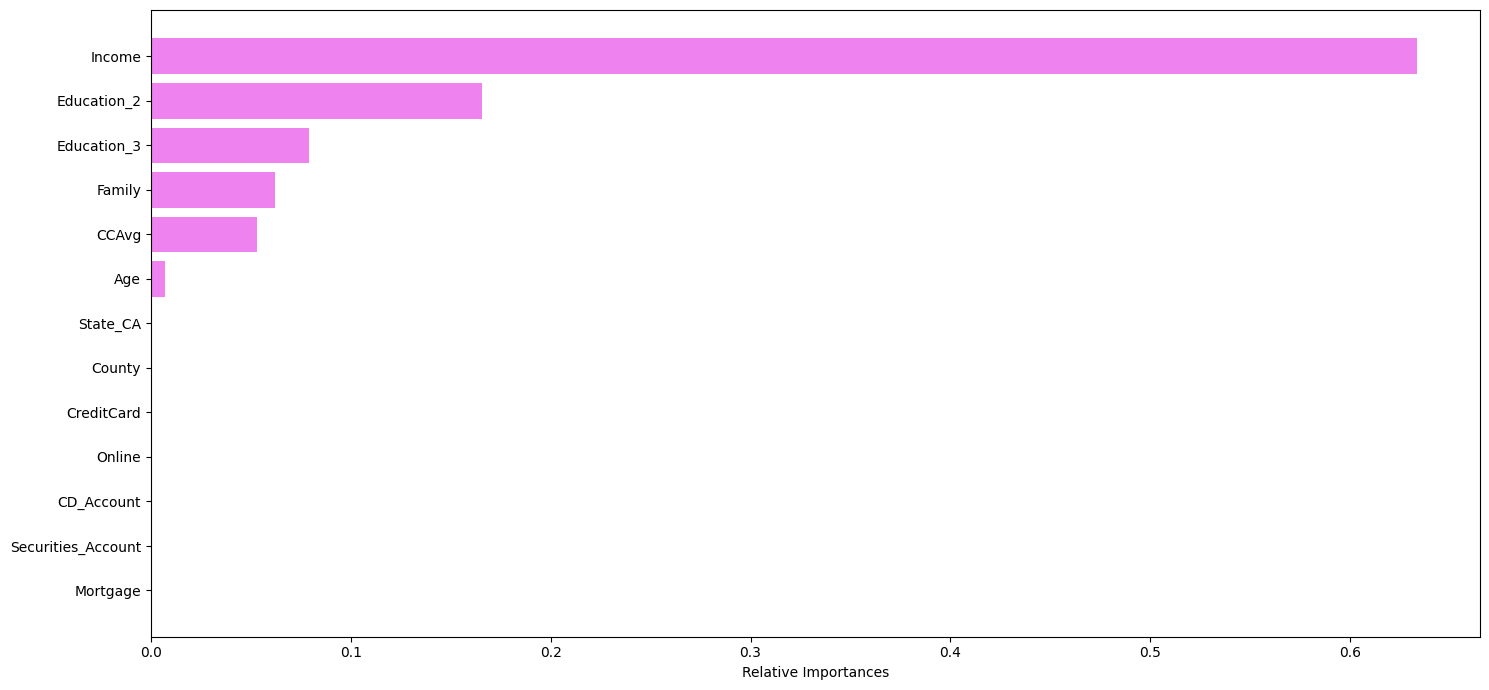

In [ ]:
# Feature Importances in Horizontal bar plot for Preprune - customWeight Model without outliers
plt.figure(figsize=(15,7))
importances = prepruneModel_customWeight_WO_outliers.feature_importances_
indices = np.argsort(importances)
plt.barh(range(len(indices)),importances[indices],align='center',color='violet')
plt.yticks(range(len(indices)),[treatedX_train.columns[i] for i in indices])
plt.xlabel("Relative Importances")
plt.tight_layout()
plt.show()

**Checking model performance on test data**

[[1312   44]
 [   5  139]]


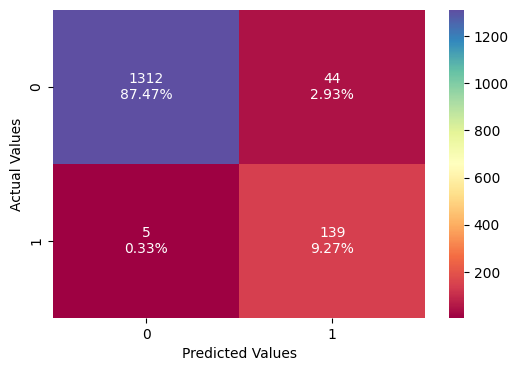

In [ ]:
#Model evaluation -  confusion matrix with test data [without outliers] for Preprune - customWeight Model
confusion_matrix_classification( prepruneModel_customWeight_WO_outliers,treatedX_test,treatedY_test)

In [ ]:
#Model evaluation -  Accuracy,recall, Precision, F1 score with test data [without outliers] for Preprune - customWeight Model
perf_preprunemodel_customWeight_WO_outliers_test =model_evaluation_classification(prepruneModel_customWeight_WO_outliers,treatedX_test,treatedY_test)
perf_preprunemodel_customWeight_WO_outliers_test

Accuracy    Recall  Precision        F1
0  0.967333  0.965278   0.759563  0.850153

Preprune - customWeight Model demonstrates very good generalizability and has 0.965 Recall score and 0.85 F1 score. Can tune with 'Balanced' class weight and check performance.

##### Balanced Weight Classifer - Performance and feature importances

In [ ]:
#Pre-pruning - For the given list of hyperparameters, Initialize and train with training data for Decision Tree classifier with Balanced as class weight with those params for dataset without outliers
max_depth_values = np.arange(2,7,2)
max_leaf_nodes_values = [50, 75, 100, 150, 250]
min_samples_split_values = [10, 30, 50, 70, 90]

best_estimator = None
best_recall_score_diff = float('inf')
best_recall_test = 0.0

for max_depth in max_depth_values:
  for max_leaf_nodes in max_leaf_nodes_values:
    for min_samples_split in min_samples_split_values:
      estimator = DecisionTreeClassifier(random_state=1,max_depth=max_depth,max_leaf_nodes=max_leaf_nodes,min_samples_split=min_samples_split,class_weight='balanced')
      estimator.fit(treatedX_train,treatedY_train)
      y_pred_train = estimator.predict(treatedX_train)
      y_pred_test = estimator.predict(treatedX_test)
#Assess the best recall score for test and best minimum recall score difference of training and test for assessment of the model on generalizability
      recall_train = recall_score(treatedY_train,y_pred_train)
      recall_test = recall_score(treatedY_test,y_pred_test)
      score_diff = np.abs(recall_train - recall_test)
      if score_diff < best_recall_score_diff and recall_test > best_recall_test:
        best_recall_score_diff = score_diff
        best_recall_test = recall_test
        best_estimator = estimator

print("Best Estimator:",best_estimator,"\nmax_depth:",best_estimator.tree_.max_depth,"\nmax_leaf_nodes:",best_estimator.max_leaf_nodes,
      "\nmin_samples_split:",best_estimator.min_samples_split,"\nrecall score difference:{:.3f}".format(best_recall_score_diff),"\nrecall test score:{:.3f}".format(recall_test))

Best Estimator: DecisionTreeClassifier(class_weight='balanced', max_depth=2, max_leaf_nodes=50,
                       min_samples_split=10, random_state=1) 
max_depth: 2 
max_leaf_nodes: 50 
min_samples_split: 10 
recall score difference:0.000 
recall test score:0.951


In [ ]:
# Assign the best_estimator found in previous step and train with training data without outliers
prepruneModel_balanced_WO_outliers = best_estimator
prepruneModel_balanced_WO_outliers.fit(treatedX_train,treatedY_train)

DecisionTreeClassifier(class_weight='balanced', max_depth=2, max_leaf_nodes=50,
                       min_samples_split=10, random_state=1)

**Checking performance on training data**

[[2464  700]
 [   0  336]]


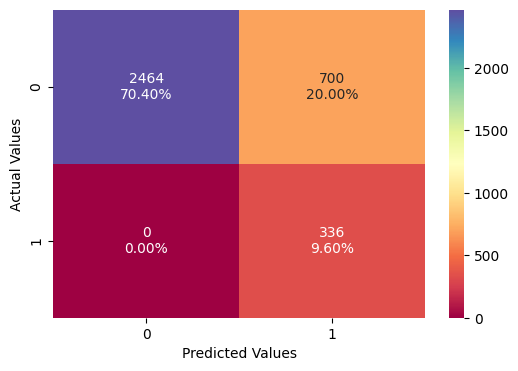

In [ ]:
#Model evaluation -  confusion matrix with training data [without outliers] for Preprune - Balanced Model
confusion_matrix_classification(prepruneModel_balanced_WO_outliers,treatedX_train,treatedY_train)

In [ ]:
#Model evaluation -  Accuracy,recall, Precision, F1 score with training data [without outliers] for Preprune - Balanced Model
perf_prepruneModel_balanced_WO_outliers_train = model_evaluation_classification(prepruneModel_balanced_WO_outliers,treatedX_train,treatedY_train)
perf_prepruneModel_balanced_WO_outliers_train

Accuracy  Recall  Precision        F1
0       0.8     1.0   0.324324  0.489796

**Visualizing the Decision Tree**

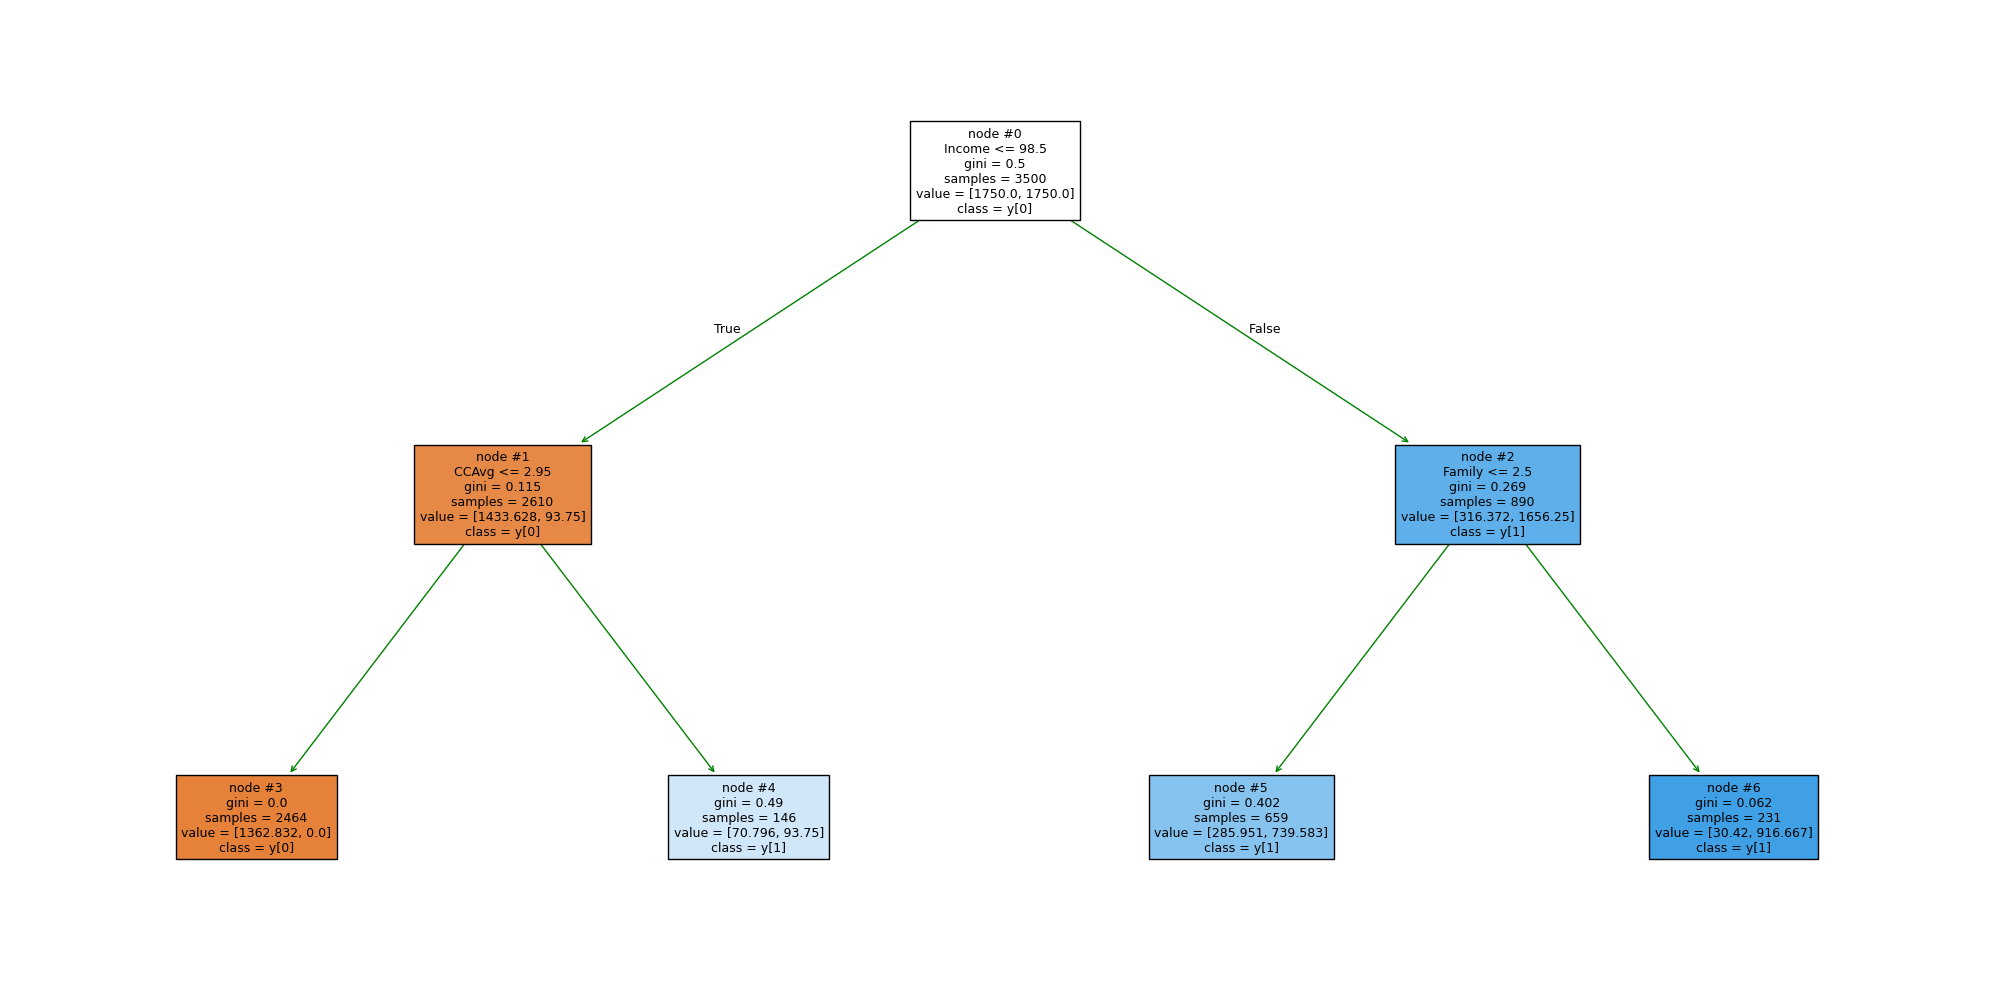

In [ ]:
# Preprune - Balanced Model without outliers decision tree visualization
plt.figure(figsize=(20,10))
cols = treatedX_train.columns.tolist()
out = tree.plot_tree(prepruneModel_balanced_WO_outliers,feature_names=cols,class_names=True,filled=True,node_ids=True,fontsize=9)
for o in out:
  arrow = o.arrow_patch
  if arrow is not None:
    arrow.set_edgecolor('green')
    arrow.set_linewidth(1)
plt.tight_layout()
plt.show()

In [ ]:
# Preprune - Balanced Model without outliers decision tree visualization in text format
print(tree.export_text(decision_tree=prepruneModel_balanced_WO_outliers,feature_names=cols,show_weights=True))

|--- Income <= 98.50
|   |--- CCAvg <= 2.95
|   |   |--- weights: [1362.83, 0.00] class: 0
|   |--- CCAvg >  2.95
|   |   |--- weights: [70.80, 93.75] class: 1
|--- Income >  98.50
|   |--- Family <= 2.50
|   |   |--- weights: [285.95, 739.58] class: 1
|   |--- Family >  2.50
|   |   |--- weights: [30.42, 916.67] class: 1



**Feature Importance**

In [ ]:
# Feature Importances in Dataframe format for Preprune - Balanced Model without outliers
pd.DataFrame(prepruneModel_balanced_WO_outliers.feature_importances_,columns=['Imp'],index=treatedX_train.columns).sort_values(by='Imp',ascending=False)

Imp
Income              0.870403
CCAvg               0.079565
Family              0.050032
Age                 0.000000
Mortgage            0.000000
Securities_Account  0.000000
CD_Account          0.000000
Online              0.000000
CreditCard          0.000000
County              0.000000
Education_2         0.000000
Education_3         0.000000
State_CA            0.000000

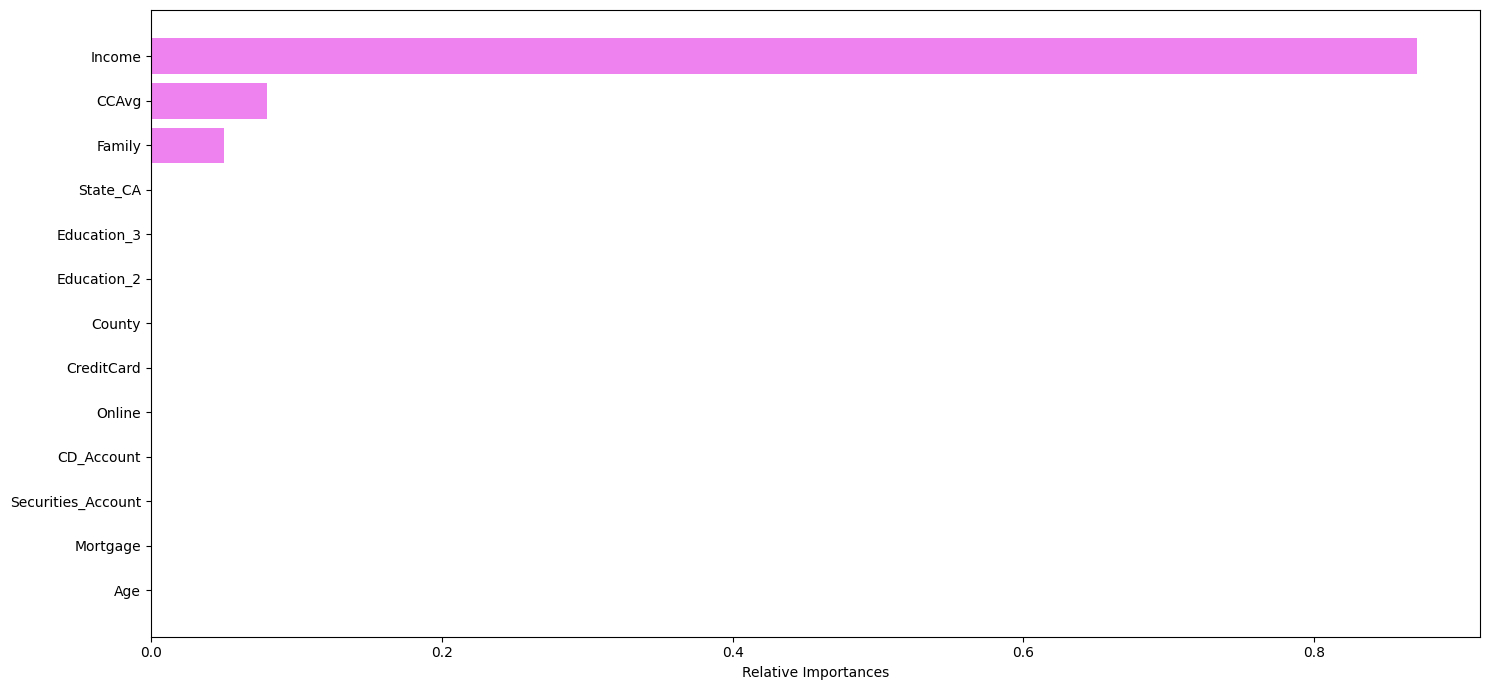

In [ ]:
# Feature Importances in Horizontal bar plot for Preprune - Balanced Model without outliers
plt.figure(figsize=(15,7))
importances = prepruneModel_balanced_WO_outliers.feature_importances_
indices = np.argsort(importances)
plt.barh(range(len(indices)),importances[indices],align='center',color='violet')
plt.yticks(range(len(indices)),[treatedX_train.columns[i] for i in indices])
plt.xlabel("Relative Importances")
plt.tight_layout()
plt.show()

**Checking model performance on test data**

[[1080  276]
 [   0  144]]


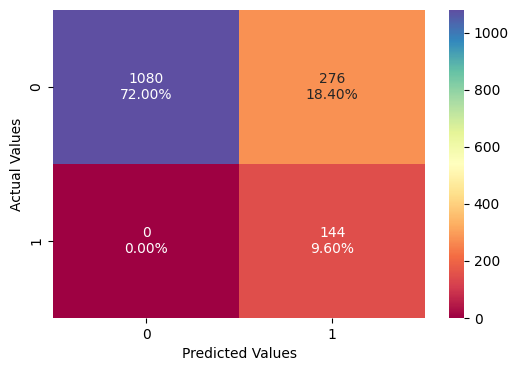

In [ ]:
#Model evaluation -  confusion matrix with test data [without outliers] for Preprune - Balanced Model
confusion_matrix_classification( prepruneModel_balanced_WO_outliers,treatedX_test,treatedY_test)

In [ ]:
#Model evaluation -  Accuracy,recall, Precision, F1 score with test data [without outliers] for Preprune - Balanced Model
perf_preprunemodel_balanced_WO_outliers_test =model_evaluation_classification(prepruneModel_balanced_WO_outliers,treatedX_test,treatedY_test)
perf_preprunemodel_balanced_WO_outliers_test

Accuracy  Recall  Precision        F1
0     0.816     1.0   0.342857  0.510638

Preprune - Balanced Model demonstrates very good generalizability and has ideal 1 Recall score BUT 0.51 F1 score,though F1 score is better with test data. If its trade off of recall and F1 score, this model would need to be traded second when compared with PrePrune customWeight Model


### Decision Tree - Post-Pruning - Sklearn

####Dataset with outliers

In [ ]:
#Postpruning - Initialize and find the cost complexity path with training data with outliers for Decision Tree classifier and find the CCP_Alphas and impurities.
clf = DecisionTreeClassifier(random_state=1)
path = clf.cost_complexity_pruning_path(X_train,Y_train)
ccp_alphas,impurities = path.ccp_alphas,path.impurities
path_df = pd.DataFrame(path)
path_df

ccp_alphas  impurities
0     0.000000    0.000000
1     0.000250    0.000500
2     0.000257    0.001014
3     0.000276    0.001566
4     0.000286    0.002137
5     0.000300    0.003337
6     0.000343    0.003680
7     0.000381    0.004061
8     0.000404    0.006080
9     0.000429    0.006509
10    0.000429    0.006937
11    0.000454    0.008755
12    0.000467    0.009222
13    0.000484    0.010189
14    0.000488    0.010677
15    0.000495    0.011667
16    0.000508    0.012175
17    0.000583    0.012758
18    0.000595    0.013354
19    0.000667    0.016023
20    0.000938    0.016961
21    0.000989    0.017950
22    0.000994    0.018944
23    0.001076    0.021097
24    0.001625    0.022723
25    0.001782    0.024505
26    0.001908    0.026413
27    0.002335    0.028748
28    0.002970    0.031718
29    0.008156    0.039874
30    0.025722    0.091318
31    0.034690    0.126007
32    0.047561    0.173568

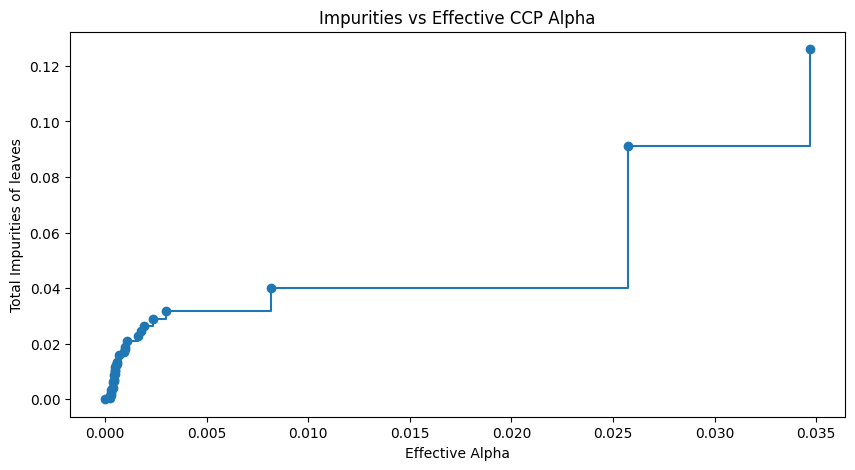

In [ ]:
# Step Plot to illustrate increase in Impurities vs Effective CCP_Alpha
plt.figure(figsize=(10,5))
plt.step(ccp_alphas[:-1],impurities[:-1],marker="o",where='post')
plt.xlabel("Effective Alpha")
plt.ylabel("Total Impurities of leaves")
plt.title("Impurities vs Effective CCP Alpha")
plt.show()

In [ ]:
#Postpruning - For every value of CCP_Alpha, Initialize decision tree classifier and train for dataset with outliers
clfs = []

recall_scores_test = []
recall_scores_train = []

node_count_clfs = []
max_depth_clfs = []

for ccp_alpha in ccp_alphas:
  clf = DecisionTreeClassifier(random_state=1,ccp_alpha=ccp_alpha)
  clf.fit(X_train,Y_train)
  clfs.append(clf)
  y_pred_train = clf.predict(X_train)
  y_pred_test = clf.predict(X_test)
#Iteratively,for every Decision Tree classifier initialized for every ccp_alpha value,
#Assess and record the recall scores for test and train data, and record the max_depth and node_count of the classifier as well.
  recall_train = recall_score(Y_train,y_pred_train)
  recall_test = recall_score(Y_test,y_pred_test)
  recall_scores_test.append(recall_test)
  recall_scores_train.append(recall_train)
  node_count_clfs.append(clf.tree_.node_count)
  max_depth_clfs.append(clf.tree_.max_depth)


In [ ]:
#As the last value of ccp_alpha prunes full tree, Removing last classifier ,last record for recall scores of both test and training data,last records for node_count and max_depth
clfs = clfs[:-1]
node_count_clfs = node_count_clfs[:-1]
max_depth_clfs = max_depth_clfs[:-1]
ccp_alphas = ccp_alphas[:-1]
recall_scores_test = recall_scores_test[:-1]
recall_scores_train = recall_scores_train[:-1]

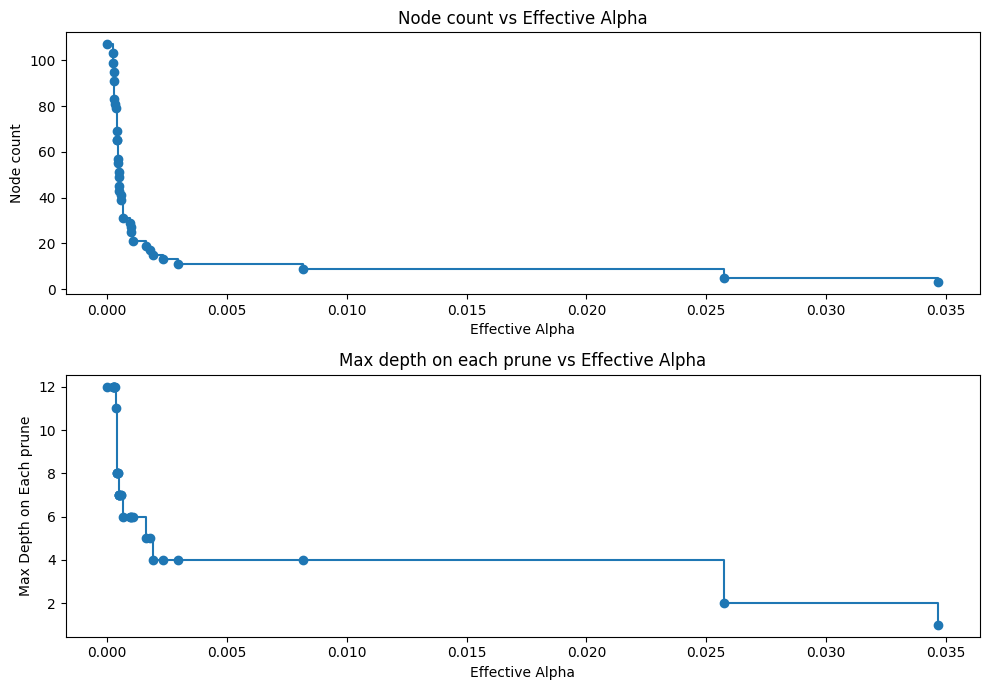

In [ ]:
# Step subPlots to illustrate decrease in Nodecount vs progressing ccp_alpha,decrease in max depth vs progressing ccp_alpha
fig,ax = plt.subplots(nrows=2,ncols=1,figsize=(10,7))
ax[0].step(ccp_alphas,node_count_clfs,marker ='o',where='post')
ax[0].set_title("Node count vs Effective Alpha")
ax[0].set_xlabel("Effective Alpha")
ax[0].set_ylabel("Node count")
ax[1].step(ccp_alphas,max_depth_clfs,marker='o',where='post')
ax[1].set_title("Max depth on each prune vs Effective Alpha")
ax[1].set_xlabel("Effective Alpha")
ax[1].set_ylabel("Max Depth on Each prune")
fig.tight_layout()

**Recall vs Alpha**

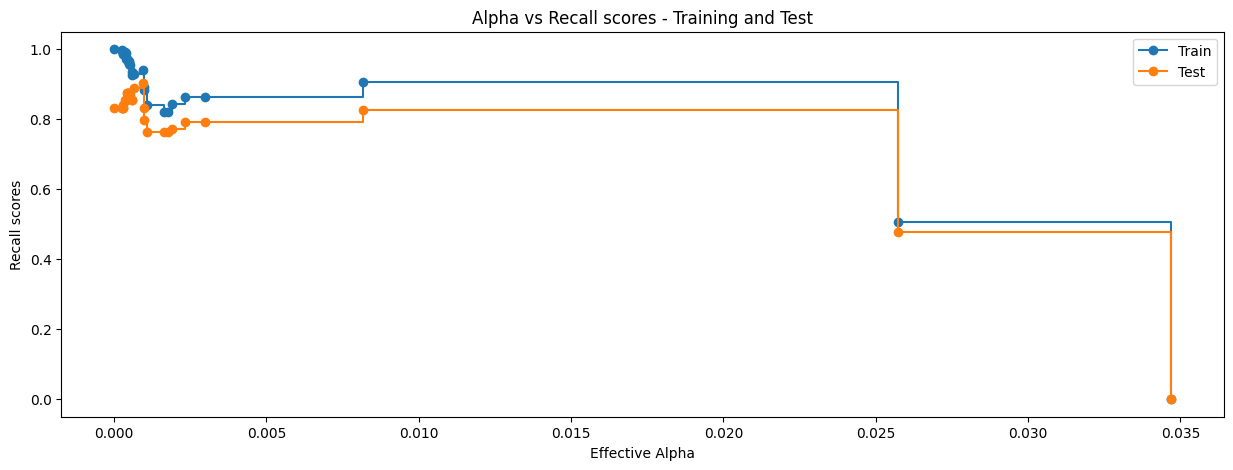

In [ ]:
# Step subPlots to illustrate recall scores of test and train data vs progressing ccp_alpha
fig,ax = plt.subplots(figsize=(15,5))
ax.set_xlabel("Effective Alpha")
ax.set_ylabel("Recall scores")
ax.set_title("Alpha vs Recall scores - Training and Test")
ax.step(ccp_alphas,recall_scores_train,label='Train',where='post',marker='o')
ax.step(ccp_alphas,recall_scores_test,label='Test',where='post',marker='o')
plt.legend()
plt.show()

In [ ]:
# Find the Index of the max recall test score and identify the respective Decision Tree classifier and its ccp_alpha value
index_recall_test_best = np.argmax(recall_scores_test)
postpruneModel = clfs[index_recall_test_best]
print(recall_scores_test[index_recall_test_best])
print(postpruneModel)
ccp_alpha_postpruneModel = postpruneModel.ccp_alpha

0.9027777777777778
DecisionTreeClassifier(ccp_alpha=0.0009377289377289376, random_state=1)


In [ ]:
#2 classifiers with best recall test score's CCP_Alpha - one with custom weight for Classes and another with balanced weight ratios for the classes
estimator_customWeight = DecisionTreeClassifier(ccp_alpha= ccp_alpha_postpruneModel,random_state=1,class_weight={0:0.15,1:0.85})
estimator_balanced = DecisionTreeClassifier(ccp_alpha= ccp_alpha_postpruneModel,random_state=1,class_weight="balanced")
estimator_customWeight.fit(X_train,Y_train)
estimator_balanced.fit(X_train,Y_train)

DecisionTreeClassifier(ccp_alpha=0.0009377289377289376, class_weight='balanced',
                       random_state=1)

##### Custom Weight Classifer - Performance and feature importances

**1. Custom Weight DecisionTreeClassifier - Checking performance on training data**

[[3125   39]
 [   0  336]]


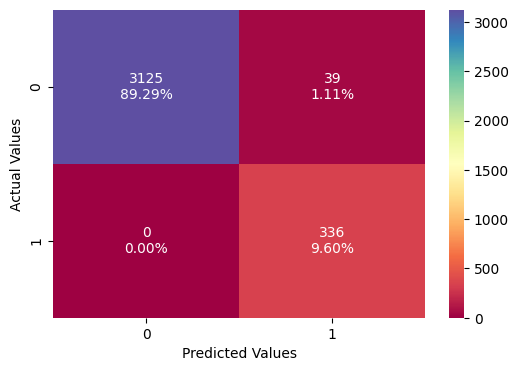

In [ ]:
#Model evaluation -  confusion matrix with training data [with outliers] for Postprune - customWeight Model
confusion_matrix_classification(estimator_customWeight,X_train,Y_train)

In [ ]:
#Model evaluation -  Accuracy,recall, Precision, F1 score with training data [with outliers] for Postprune - customWeight Model
perf_postpruneModel_customWeight_outliers_train = model_evaluation_classification(estimator_customWeight,X_train,Y_train)
perf_postpruneModel_customWeight_outliers_train

Accuracy  Recall  Precision        F1
0  0.988857     1.0      0.896  0.945148

**2.Custom Weight Classifier - Visualizing the Decision Tree**

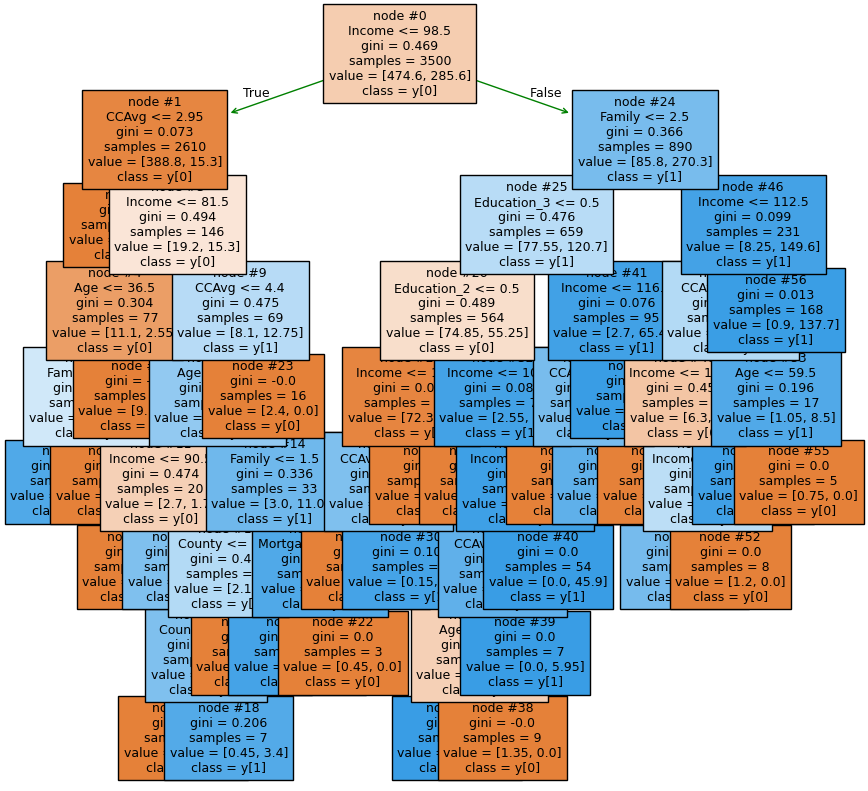

In [ ]:
# Postprune - customWeight Model with outliers decision tree visualization
plt.figure(figsize=(10,10))
out = tree.plot_tree(estimator_customWeight,filled=True,class_names=True,node_ids=True,fontsize=9,feature_names=X_train.columns)
for o in out:
  arrow = o.arrow_patch
  if arrow is not None:
    arrow.set_edgecolor('green')
    arrow.set_linewidth(1)
plt.show();

In [ ]:
# Postprune - customWeight Model with outliers decision tree visualization in text format
print(tree.export_text(estimator_customWeight,show_weights=True,feature_names=X_train.columns))

|--- Income <= 98.50
|   |--- CCAvg <= 2.95
|   |   |--- weights: [369.60, 0.00] class: 0
|   |--- CCAvg >  2.95
|   |   |--- Income <= 81.50
|   |   |   |--- Age <= 36.50
|   |   |   |   |--- Family <= 3.50
|   |   |   |   |   |--- weights: [0.30, 2.55] class: 1
|   |   |   |   |--- Family >  3.50
|   |   |   |   |   |--- weights: [1.65, 0.00] class: 0
|   |   |   |--- Age >  36.50
|   |   |   |   |--- weights: [9.15, 0.00] class: 0
|   |   |--- Income >  81.50
|   |   |   |--- CCAvg <= 4.40
|   |   |   |   |--- Age <= 46.00
|   |   |   |   |   |--- Income <= 90.50
|   |   |   |   |   |   |--- weights: [2.10, 0.00] class: 0
|   |   |   |   |   |--- Income >  90.50
|   |   |   |   |   |   |--- weights: [0.60, 1.70] class: 1
|   |   |   |   |--- Age >  46.00
|   |   |   |   |   |--- Family <= 1.50
|   |   |   |   |   |   |--- County <= 24.50
|   |   |   |   |   |   |   |--- County <= 6.50
|   |   |   |   |   |   |   |   |--- weights: [0.75, 0.00] class: 0
|   |   |   |   |   |   |   |--

**3. Custom Weight Classifier - Feature Importances**

In [ ]:
# Feature Importances in Dataframe format for Postprune - customWeight Model with outliers
pd.DataFrame(estimator_customWeight.feature_importances_,columns=['Imp'],index=X_train.columns).sort_values(by='Imp',ascending=False)

Imp
Income              0.623214
Education_2         0.155209
Education_3         0.074078
Family              0.064564
CCAvg               0.060122
Age                 0.015419
County              0.005199
Mortgage            0.002195
Securities_Account  0.000000
CD_Account          0.000000
Online              0.000000
CreditCard          0.000000
State_CA            0.000000

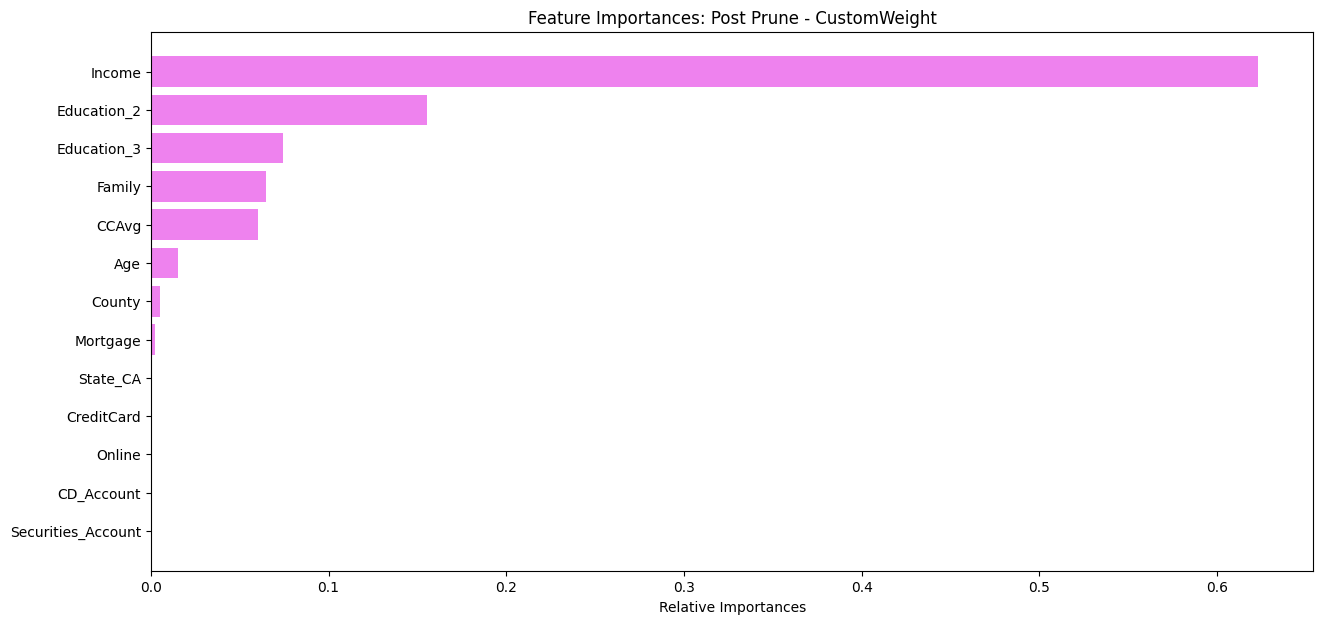

In [ ]:
# Feature Importances in Horizontal bar plot for Postprune - customWeight Model with outliers
plt.figure(figsize=(15,7))
importances = estimator_customWeight.feature_importances_
indices = np.argsort(importances)
plt.barh(range(len(indices)),importances[indices],color='violet',align='center')
plt.yticks(range(len(indices)),[ X_train.columns[i] for i in indices])
plt.xlabel("Relative Importances")
plt.title("Feature Importances: Post Prune - CustomWeight")
plt.show();

**4. Custom weight Classifier - Checking performance on test data**

[[1329   27]
 [   9  135]]


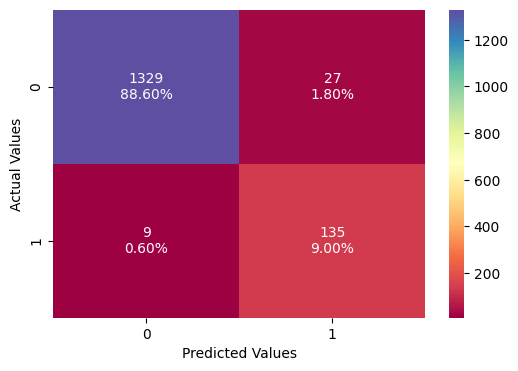

In [ ]:
#Model evaluation -  confusion matrix with test data [with outliers] for Postprune - customWeight Model
confusion_matrix_classification(estimator_customWeight,X_test,Y_test)

In [ ]:
#Model evaluation -  Accuracy,recall, Precision, F1 score with test data [with outliers] for Postprune - customWeight Model
perf_postpruneModel_customWeight_outliers_test = model_evaluation_classification(estimator_customWeight,X_test,Y_test)
perf_postpruneModel_customWeight_outliers_test

Accuracy  Recall  Precision        F1
0     0.976  0.9375   0.833333  0.882353

In [ ]:
# Assign the PostpruneModel for better naming
postpruneModel_customWeight = estimator_customWeight

Postprune - customWeight Model suffers from generalizability but has 0.937 Recall score and 0.882 F1 score. Can tune with 'Balanced' class weight and check performance. But since it suffers from generalizability, this model wouldnt be an apt fit for our dataset.


#####Balanced Weight Classifier - Performance and feature importances

**1. Balanced Weight DecisionTreeClassifier - Checking performance on training data**

[[3102   62]
 [   0  336]]


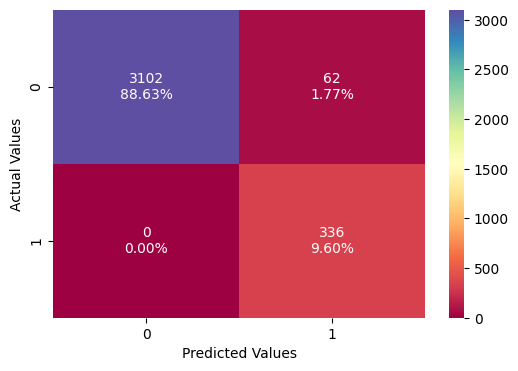

In [ ]:
#Model evaluation -  confusion matrix with training data [with outliers] for Postprune - Balanced Model
confusion_matrix_classification(estimator_balanced,X_train,Y_train)

In [ ]:
#Model evaluation -  Accuracy,recall, Precision, F1 score with training data [with outliers] for Postprune - Balanced Model
perf_postpruneModel_balanced_outliers_train = model_evaluation_classification(estimator_balanced,X_train,Y_train)
perf_postpruneModel_balanced_outliers_train

Accuracy  Recall  Precision        F1
0  0.982286     1.0   0.844221  0.915531

**2.Balanced Weight Classifier - Visualizing the Decision Tree**

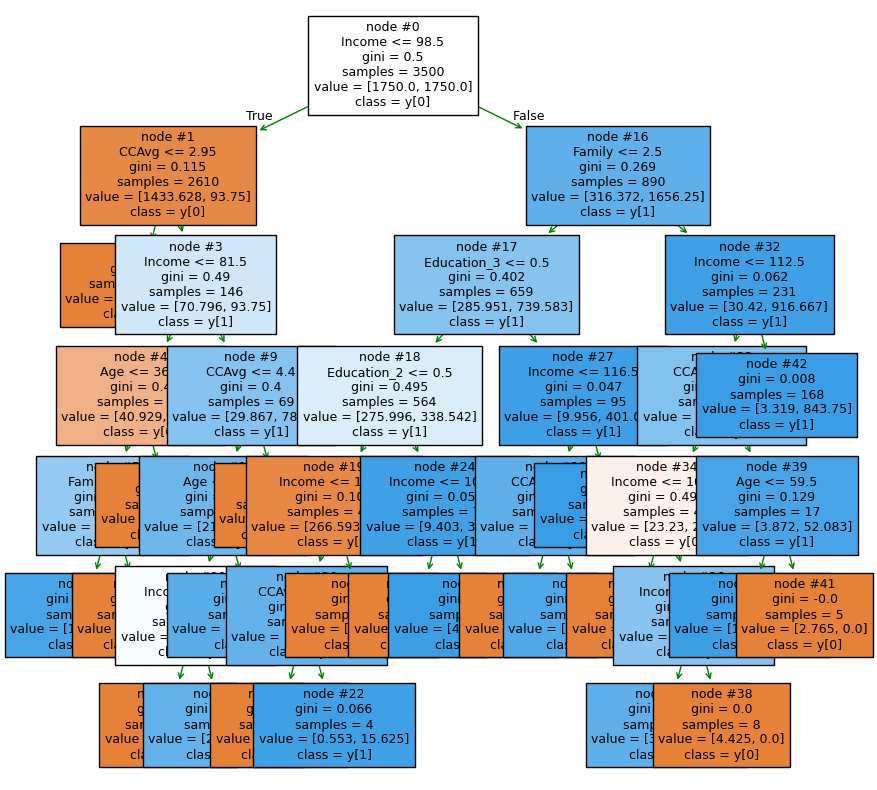

In [ ]:
# Postprune - Balanced Model with outliers decision tree visualization
plt.figure(figsize=(10,10))
out = tree.plot_tree(estimator_balanced,filled=True,class_names=True,node_ids=True,fontsize=9,feature_names=X_train.columns)
for o in out:
  arrow = o.arrow_patch
  if arrow is not None:
    arrow.set_edgecolor('green')
    arrow.set_linewidth(1)
plt.show();

In [ ]:
# Postprune - Balanced Model with outliers decision tree visualization in text format
print(tree.export_text(estimator_balanced,show_weights=True,feature_names=X_train.columns))

|--- Income <= 98.50
|   |--- CCAvg <= 2.95
|   |   |--- weights: [1362.83, 0.00] class: 0
|   |--- CCAvg >  2.95
|   |   |--- Income <= 81.50
|   |   |   |--- Age <= 36.50
|   |   |   |   |--- Family <= 3.50
|   |   |   |   |   |--- weights: [1.11, 15.62] class: 1
|   |   |   |   |--- Family >  3.50
|   |   |   |   |   |--- weights: [6.08, 0.00] class: 0
|   |   |   |--- Age >  36.50
|   |   |   |   |--- weights: [33.74, 0.00] class: 0
|   |   |--- Income >  81.50
|   |   |   |--- CCAvg <= 4.40
|   |   |   |   |--- Age <= 46.00
|   |   |   |   |   |--- Income <= 90.50
|   |   |   |   |   |   |--- weights: [7.74, 0.00] class: 0
|   |   |   |   |   |--- Income >  90.50
|   |   |   |   |   |   |--- weights: [2.21, 10.42] class: 1
|   |   |   |   |--- Age >  46.00
|   |   |   |   |   |--- weights: [11.06, 67.71] class: 1
|   |   |   |--- CCAvg >  4.40
|   |   |   |   |--- weights: [8.85, 0.00] class: 0
|--- Income >  98.50
|   |--- Family <= 2.50
|   |   |--- Education_3 <= 0.50
|   |   |

**3. Balanced Weight Classifier - Feature Importances**

In [ ]:
# Feature Importances in Dataframe format for Postprune - Balanced Model with outliers
pd.DataFrame(estimator_balanced.feature_importances_,columns=['Imp'],index=X_train.columns).sort_values(by='Imp',ascending=False)

Imp
Income              0.667899
Education_2         0.151815
CCAvg               0.074623
Education_3         0.052674
Family              0.040114
Age                 0.012875
Mortgage            0.000000
Securities_Account  0.000000
CD_Account          0.000000
Online              0.000000
CreditCard          0.000000
County              0.000000
State_CA            0.000000

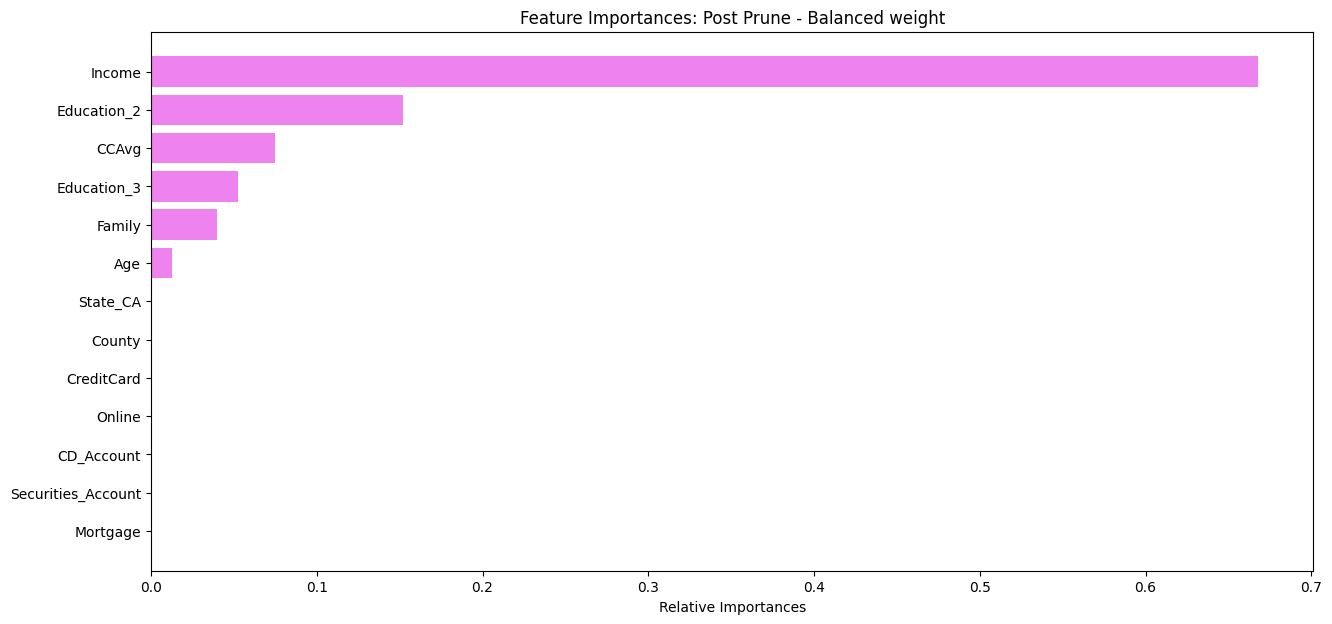

In [ ]:
# Feature Importances in Horizontal bar plot for Postprune - Balanced Model with outliers
plt.figure(figsize=(15,7))
importances = estimator_balanced.feature_importances_
indices = np.argsort(importances)
plt.barh(range(len(indices)),importances[indices],color='violet',align='center')
plt.yticks(range(len(indices)),[ X_train.columns[i] for i in indices])
plt.xlabel("Relative Importances")
plt.title("Feature Importances: Post Prune - Balanced weight")
plt.show();

**4. Balanced Weight Classifier - Checking performance on test data**

[[1321   35]
 [   8  136]]


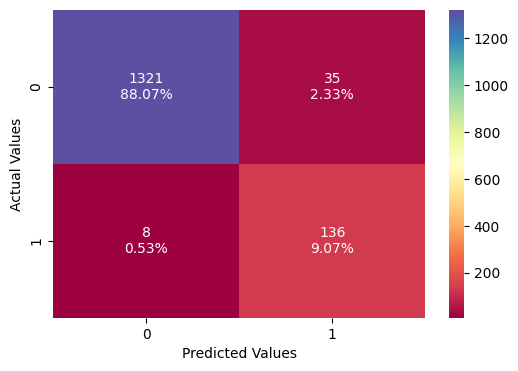

In [ ]:
#Model evaluation -  confusion matrix with test data [with outliers] for Postprune - Balanced Model
confusion_matrix_classification(estimator_balanced,X_test,Y_test)

In [ ]:
#Model evaluation -  Accuracy,recall, Precision, F1 score with test data [with outliers] for Postprune - Balanced Model
perf_postpruneModel_balanced_outliers_test = model_evaluation_classification(estimator_balanced,X_test,Y_test)
perf_postpruneModel_balanced_outliers_test

Accuracy    Recall  Precision        F1
0  0.971333  0.944444   0.795322  0.863492

In [ ]:
# Assign Balanced postpruning model for better naming convention
postpruneModel_balanced = estimator_balanced

Postprune - Balanced Model suffers from generalizability but has 0.944 Recall score and 0.863 F1 score. But when compared to postprune - customWeight model, this model has higher recall score but a bit lower on F1 score. Also, since it suffers from generalizability, this model wouldnt be an apt fit for our dataset.


####Dataset without outliers

In [ ]:
#Postpruning - Initialize and find the cost complexity path with training data without outliers for Decision Tree classifier and find the CCP_Alphas and impurities.
clf = DecisionTreeClassifier(random_state=1)
path = clf.cost_complexity_pruning_path(treatedX_train,treatedY_train)
ccp_alphas,impurities = path.ccp_alphas,path.impurities
path_df = pd.DataFrame(path)
path_df

ccp_alphas  impurities
0     0.000000    0.000000
1     0.000250    0.000500
2     0.000257    0.001014
3     0.000276    0.001566
4     0.000286    0.002137
5     0.000300    0.003337
6     0.000343    0.003680
7     0.000381    0.004061
8     0.000404    0.006080
9     0.000429    0.006509
10    0.000429    0.006937
11    0.000454    0.008755
12    0.000467    0.009222
13    0.000484    0.010189
14    0.000488    0.010677
15    0.000495    0.011667
16    0.000508    0.012175
17    0.000583    0.012758
18    0.000595    0.013354
19    0.000667    0.016023
20    0.000938    0.016961
21    0.000989    0.017950
22    0.000994    0.018944
23    0.001076    0.021097
24    0.001625    0.022723
25    0.001782    0.024505
26    0.001908    0.026413
27    0.002335    0.028748
28    0.002970    0.031718
29    0.008156    0.039874
30    0.025722    0.091318
31    0.034690    0.126007
32    0.047561    0.173568

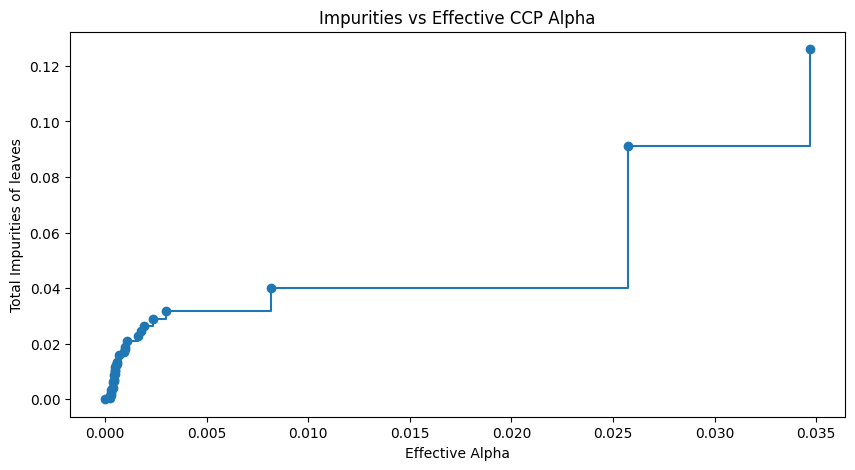

In [ ]:
# Step Plot to illustrate increase in Impurities vs Effective CCP_Alpha
plt.figure(figsize=(10,5))
plt.step(ccp_alphas[:-1],impurities[:-1],marker="o",where='post')
plt.xlabel("Effective Alpha")
plt.ylabel("Total Impurities of leaves")
plt.title("Impurities vs Effective CCP Alpha")
plt.show()

In [ ]:
#Postpruning - For every value of CCP_Alpha, Initialize decision tree classifier and train for dataset without outliers
clfs = []

recall_scores_test = []
recall_scores_train = []

node_count_clfs = []
max_depth_clfs = []

for ccp_alpha in ccp_alphas:
  clf = DecisionTreeClassifier(random_state=1,ccp_alpha=ccp_alpha)
  clf.fit(treatedX_train,treatedY_train)
  clfs.append(clf)
  y_pred_train = clf.predict(treatedX_train)
  y_pred_test = clf.predict(treatedX_test)
#Iteratively,for every Decision Tree classifier initialized for every ccp_alpha value,
#Assess and record the recall scores for test and train data, and record the max_depth and node_count of the classifier as well.
  recall_train = recall_score(treatedY_train,y_pred_train)
  recall_test = recall_score(treatedY_test,y_pred_test)
  recall_scores_test.append(recall_test)
  recall_scores_train.append(recall_train)
  node_count_clfs.append(clf.tree_.node_count)
  max_depth_clfs.append(clf.tree_.max_depth)


In [ ]:
#As the last value of ccp_alpha prunes full tree, Removing last classifier ,last record for recall scores of both test and training data,last records for node_count and max_depth
clfs = clfs[:-1]
node_count_clfs = node_count_clfs[:-1]
max_depth_clfs = max_depth_clfs[:-1]
ccp_alphas = ccp_alphas[:-1]
recall_scores_test = recall_scores_test[:-1]
recall_scores_train = recall_scores_train[:-1]

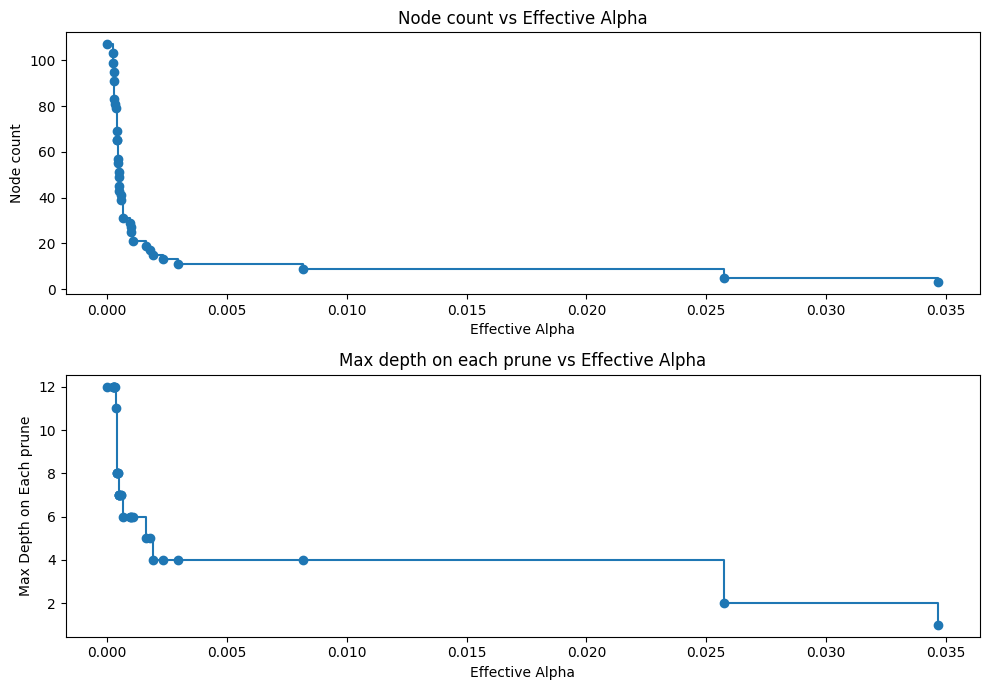

In [ ]:
# Step subPlots to illustrate decrease in Nodecount vs progressing ccp_alpha,decrease in max depth vs progressing ccp_alpha
fig,ax = plt.subplots(nrows=2,ncols=1,figsize=(10,7))
ax[0].step(ccp_alphas,node_count_clfs,marker ='o',where='post')
ax[0].set_title("Node count vs Effective Alpha")
ax[0].set_xlabel("Effective Alpha")
ax[0].set_ylabel("Node count")
ax[1].step(ccp_alphas,max_depth_clfs,marker='o',where='post')
ax[1].set_title("Max depth on each prune vs Effective Alpha")
ax[1].set_xlabel("Effective Alpha")
ax[1].set_ylabel("Max Depth on Each prune")
fig.tight_layout()

**Recall vs Alpha**

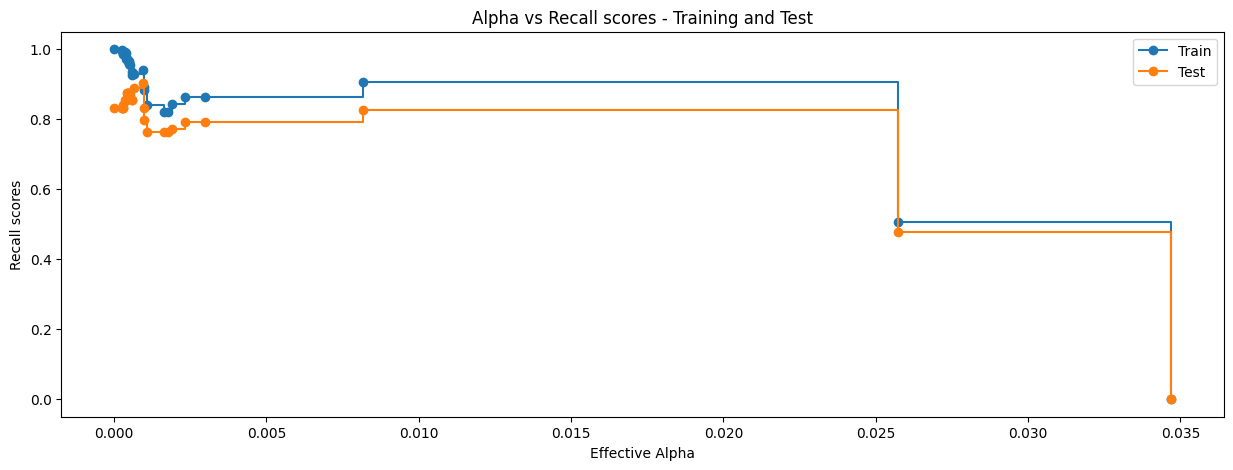

In [ ]:
# Step subPlots to illustrate recall scores of test and train data vs progressing ccp_alpha
fig,ax = plt.subplots(figsize=(15,5))
ax.set_xlabel("Effective Alpha")
ax.set_ylabel("Recall scores")
ax.set_title("Alpha vs Recall scores - Training and Test")
ax.step(ccp_alphas,recall_scores_train,label='Train',where='post',marker='o')
ax.step(ccp_alphas,recall_scores_test,label='Test',where='post',marker='o')
plt.legend()
plt.show()

In [ ]:
# Find the Index of the max recall test score and identify the respective Decision Tree classifier and its ccp_alpha value
index_recall_test_best = np.argmax(recall_scores_test)
postpruneModel = clfs[index_recall_test_best]
print(recall_scores_test[index_recall_test_best])
print(postpruneModel)
ccp_alpha_postpruneModel = postpruneModel.ccp_alpha

0.9027777777777778
DecisionTreeClassifier(ccp_alpha=0.0009377289377289376, random_state=1)


In [ ]:
#2 classifiers with best recall test score's CCP_Alpha - one with custom weight for Classes and another with balanced weight ratios for the classes
estimator_customWeight = DecisionTreeClassifier(ccp_alpha= ccp_alpha_postpruneModel,random_state=1,class_weight={0:0.15,1:0.85})
estimator_balanced = DecisionTreeClassifier(ccp_alpha= ccp_alpha_postpruneModel,random_state=1,class_weight="balanced")
estimator_customWeight.fit(treatedX_train,treatedY_train)
estimator_balanced.fit(treatedX_train,treatedY_train)

DecisionTreeClassifier(ccp_alpha=0.0009377289377289376, class_weight='balanced',
                       random_state=1)

##### Custom Weight Classifer - Performance and feature importances

**1. Custom Weight DecisionTreeClassifier - Checking performance on training data**

[[3125   39]
 [   0  336]]


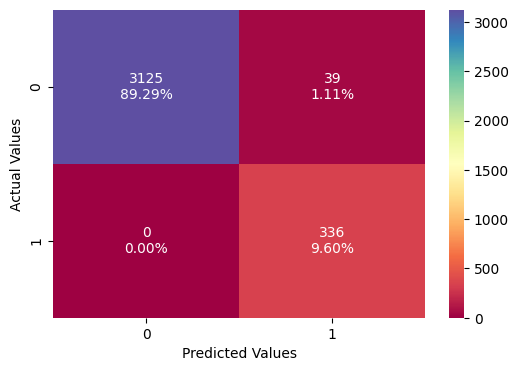

In [ ]:
#Model evaluation -  confusion matrix with training data [without outliers] for Postprune - customWeight Model
confusion_matrix_classification(estimator_customWeight,treatedX_train,treatedY_train)

In [ ]:
#Model evaluation -  Accuracy,recall, Precision, F1 score with training data [without outliers] for Postprune - customWeight Model
perf_postpruneModel_customWeight_WO_outliers_train = model_evaluation_classification(estimator_customWeight,treatedX_train,treatedY_train)
perf_postpruneModel_customWeight_WO_outliers_train

Accuracy  Recall  Precision        F1
0  0.988857     1.0      0.896  0.945148

**2.Custom Weight Classifier - Visualizing the Decision Tree**

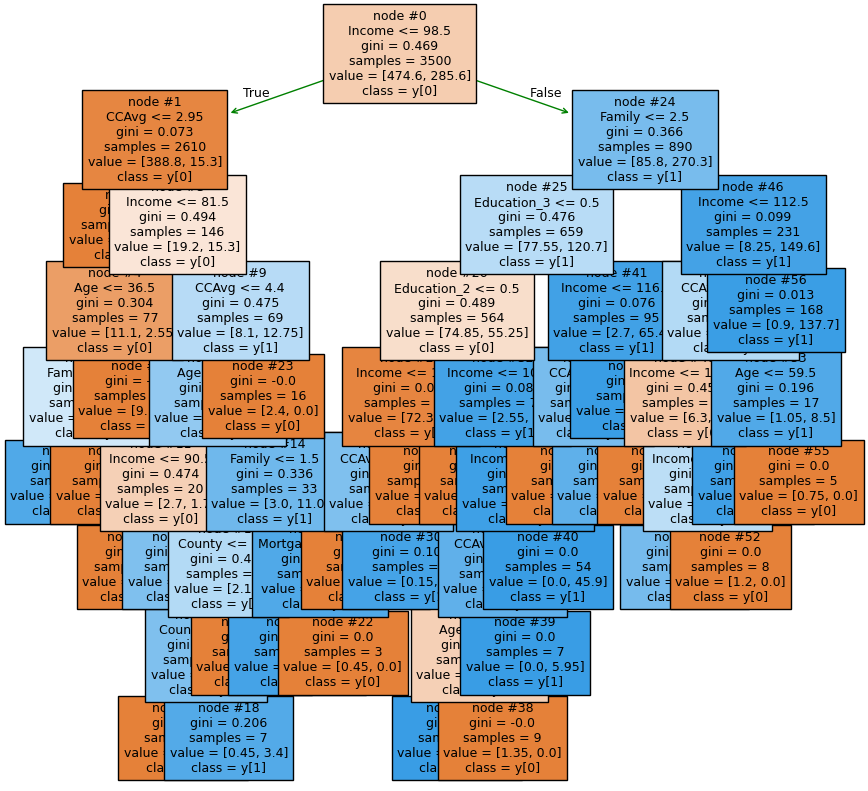

In [ ]:
# Postprune - customWeight Model without outliers decision tree visualization
plt.figure(figsize=(10,10))
out = tree.plot_tree(estimator_customWeight,filled=True,class_names=True,node_ids=True,fontsize=9,feature_names=treatedX_train.columns)
for o in out:
  arrow = o.arrow_patch
  if arrow is not None:
    arrow.set_edgecolor('green')
    arrow.set_linewidth(1)
plt.show();

In [ ]:
# Postprune - customWeight Model without outliers decision tree visualization in text format
print(tree.export_text(estimator_customWeight,show_weights=True,feature_names=treatedX_train.columns))

|--- Income <= 98.50
|   |--- CCAvg <= 2.95
|   |   |--- weights: [369.60, 0.00] class: 0
|   |--- CCAvg >  2.95
|   |   |--- Income <= 81.50
|   |   |   |--- Age <= 36.50
|   |   |   |   |--- Family <= 3.50
|   |   |   |   |   |--- weights: [0.30, 2.55] class: 1
|   |   |   |   |--- Family >  3.50
|   |   |   |   |   |--- weights: [1.65, 0.00] class: 0
|   |   |   |--- Age >  36.50
|   |   |   |   |--- weights: [9.15, 0.00] class: 0
|   |   |--- Income >  81.50
|   |   |   |--- CCAvg <= 4.40
|   |   |   |   |--- Age <= 46.00
|   |   |   |   |   |--- Income <= 90.50
|   |   |   |   |   |   |--- weights: [2.10, 0.00] class: 0
|   |   |   |   |   |--- Income >  90.50
|   |   |   |   |   |   |--- weights: [0.60, 1.70] class: 1
|   |   |   |   |--- Age >  46.00
|   |   |   |   |   |--- Family <= 1.50
|   |   |   |   |   |   |--- County <= 24.50
|   |   |   |   |   |   |   |--- County <= 6.50
|   |   |   |   |   |   |   |   |--- weights: [0.75, 0.00] class: 0
|   |   |   |   |   |   |   |--

**3. Custom Weight Classifier - Feature Importances**

In [ ]:
# Feature Importances in Dataframe format for Postprune - customWeight Model without outliers
pd.DataFrame(estimator_customWeight.feature_importances_,columns=['Imp'],index=treatedX_train.columns).sort_values(by='Imp',ascending=False)

Imp
Income              0.623214
Education_2         0.155209
Education_3         0.074078
Family              0.064564
CCAvg               0.060122
Age                 0.015419
County              0.005199
Mortgage            0.002195
Securities_Account  0.000000
CD_Account          0.000000
Online              0.000000
CreditCard          0.000000
State_CA            0.000000

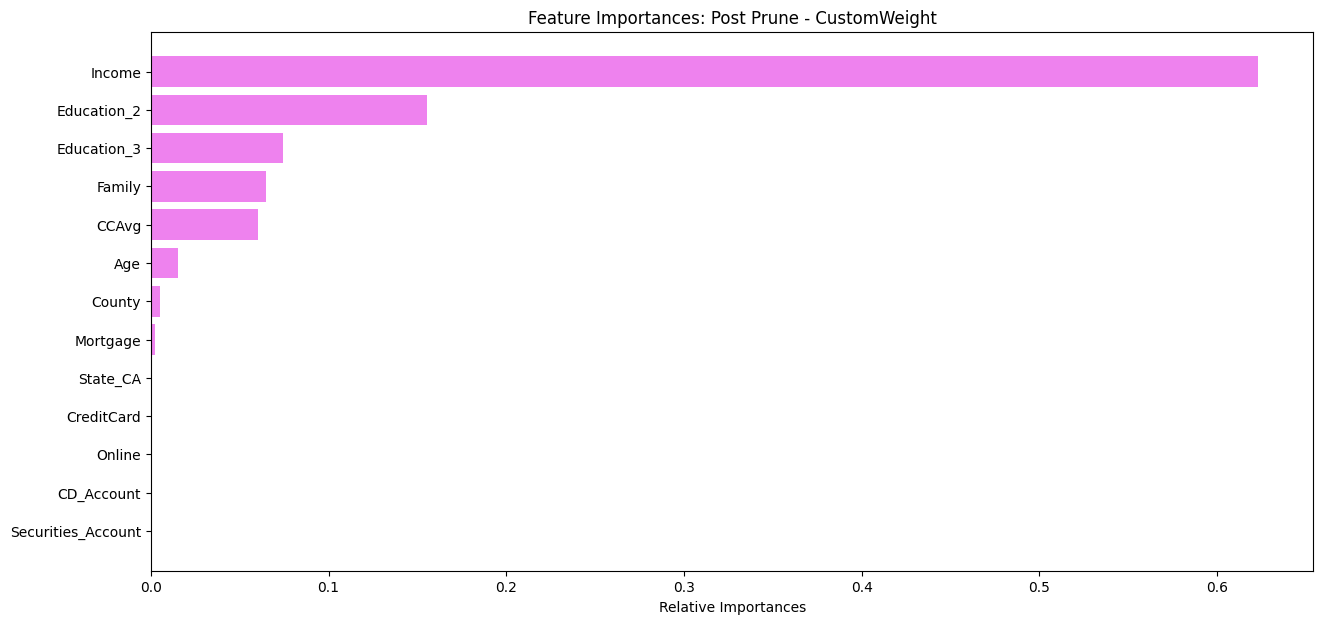

In [ ]:
# Feature Importances in Horizontal bar plot for Postprune - customWeight Model without outliers
plt.figure(figsize=(15,7))
importances = estimator_customWeight.feature_importances_
indices = np.argsort(importances)
plt.barh(range(len(indices)),importances[indices],color='violet',align='center')
plt.yticks(range(len(indices)),[ treatedX_train.columns[i] for i in indices])
plt.xlabel("Relative Importances")
plt.title("Feature Importances: Post Prune - CustomWeight")
plt.show();

**4. Custom weight Classifier - Checking performance on test data**

[[1329   27]
 [   9  135]]


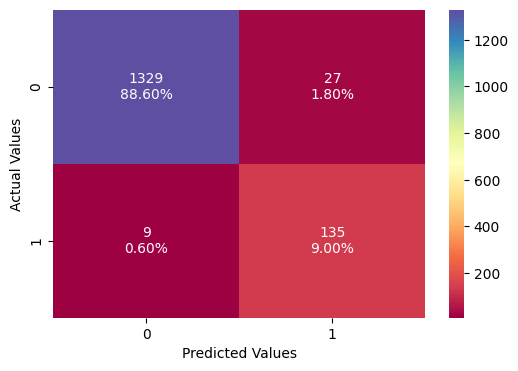

In [ ]:
#Model evaluation -  confusion matrix with test data [without outliers] for Postprune - customWeight Model
confusion_matrix_classification(estimator_customWeight,treatedX_test,treatedY_test)

In [ ]:
#Model evaluation -  Accuracy,recall, Precision, F1 score with test data [without outliers] for Postprune - customWeight Model
perf_postpruneModel_customWeight_WO_outliers_test = model_evaluation_classification(estimator_customWeight,treatedX_test,treatedY_test)
perf_postpruneModel_customWeight_WO_outliers_test

Accuracy  Recall  Precision        F1
0     0.976  0.9375   0.833333  0.882353

Postprune - customWeight Model suffers from generalizability but has 0.937 Recall score and 0.882 F1 score. Can tune with 'Balanced' class weight and check performance. But since it suffers from generalizability, this model wouldnt be an apt fit for our dataset.


#####Balanced Weight Classifier - Performance and feature importances

**1. Balanced Weight DecisionTreeClassifier - Checking performance on training data**

[[3102   62]
 [   0  336]]


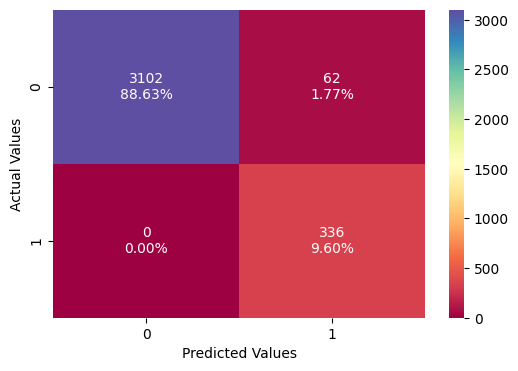

In [ ]:
#Model evaluation -  confusion matrix with training data [without outliers] for Postprune - Balanced Model
confusion_matrix_classification(estimator_balanced,treatedX_train,treatedY_train)

In [ ]:
#Model evaluation -  Accuracy,recall, Precision, F1 score with training data [without outliers] for Postprune - Balanced Model
perf_postpruneModel_balanced_WO_outliers_train = model_evaluation_classification(estimator_balanced,treatedX_train,treatedY_train)
perf_postpruneModel_balanced_WO_outliers_train

Accuracy  Recall  Precision        F1
0  0.982286     1.0   0.844221  0.915531

**2.Balanced Weight Classifier - Visualizing the Decision Tree**

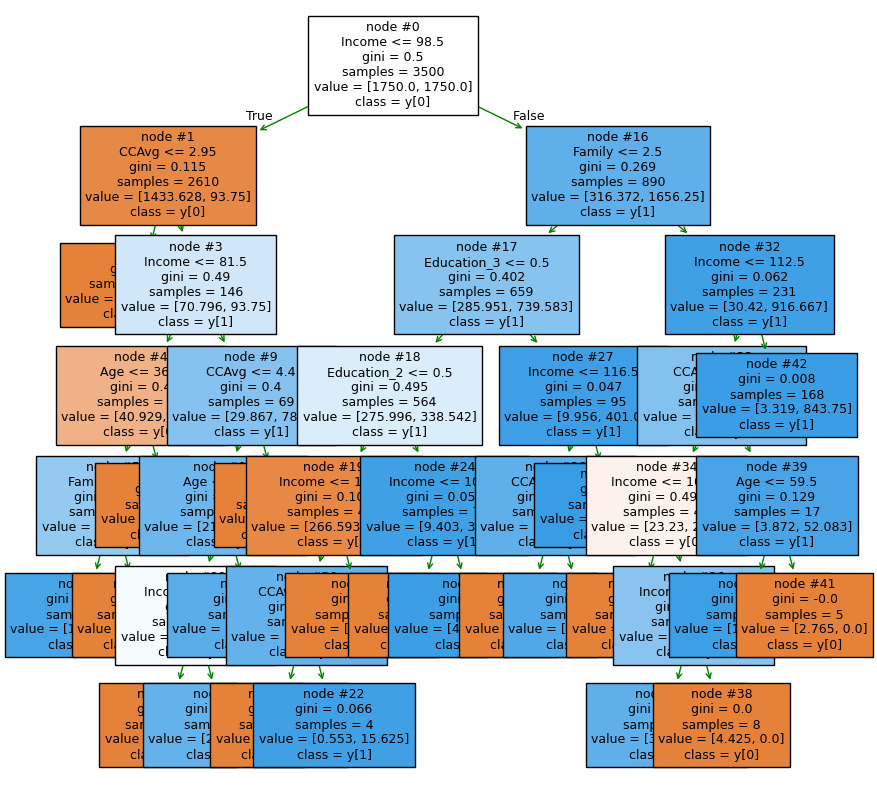

In [ ]:
# Postprune - Balanced Model without outliers decision tree visualization
plt.figure(figsize=(10,10))
out = tree.plot_tree(estimator_balanced,filled=True,class_names=True,node_ids=True,fontsize=9,feature_names=treatedX_train.columns)
for o in out:
  arrow = o.arrow_patch
  if arrow is not None:
    arrow.set_edgecolor('green')
    arrow.set_linewidth(1)
plt.show();

In [ ]:
# Postprune - Balanced Model without outliers decision tree visualization in text format
print(tree.export_text(estimator_balanced,show_weights=True,feature_names=treatedX_train.columns))

|--- Income <= 98.50
|   |--- CCAvg <= 2.95
|   |   |--- weights: [1362.83, 0.00] class: 0
|   |--- CCAvg >  2.95
|   |   |--- Income <= 81.50
|   |   |   |--- Age <= 36.50
|   |   |   |   |--- Family <= 3.50
|   |   |   |   |   |--- weights: [1.11, 15.62] class: 1
|   |   |   |   |--- Family >  3.50
|   |   |   |   |   |--- weights: [6.08, 0.00] class: 0
|   |   |   |--- Age >  36.50
|   |   |   |   |--- weights: [33.74, 0.00] class: 0
|   |   |--- Income >  81.50
|   |   |   |--- CCAvg <= 4.40
|   |   |   |   |--- Age <= 46.00
|   |   |   |   |   |--- Income <= 90.50
|   |   |   |   |   |   |--- weights: [7.74, 0.00] class: 0
|   |   |   |   |   |--- Income >  90.50
|   |   |   |   |   |   |--- weights: [2.21, 10.42] class: 1
|   |   |   |   |--- Age >  46.00
|   |   |   |   |   |--- weights: [11.06, 67.71] class: 1
|   |   |   |--- CCAvg >  4.40
|   |   |   |   |--- weights: [8.85, 0.00] class: 0
|--- Income >  98.50
|   |--- Family <= 2.50
|   |   |--- Education_3 <= 0.50
|   |   |

**3. Balanced Weight Classifier - Feature Importances**

In [ ]:
# Feature Importances in Dataframe format for Postprune - Balanced Model without outliers
pd.DataFrame(estimator_balanced.feature_importances_,columns=['Imp'],index=treatedX_train.columns).sort_values(by='Imp',ascending=False)

Imp
Income              0.667899
Education_2         0.151815
CCAvg               0.074623
Education_3         0.052674
Family              0.040114
Age                 0.012875
Mortgage            0.000000
Securities_Account  0.000000
CD_Account          0.000000
Online              0.000000
CreditCard          0.000000
County              0.000000
State_CA            0.000000

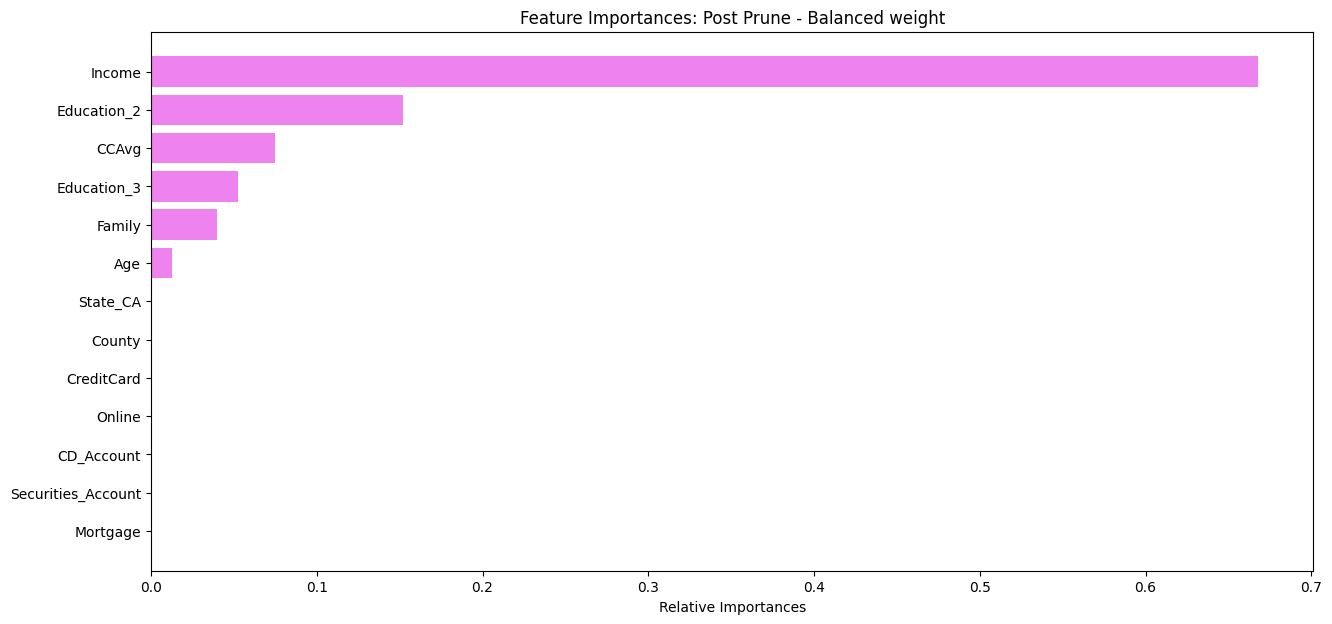

In [ ]:
# Feature Importances in Horizontal bar plot for Postprune - Balanced Model without outliers
plt.figure(figsize=(15,7))
importances = estimator_balanced.feature_importances_
indices = np.argsort(importances)
plt.barh(range(len(indices)),importances[indices],color='violet',align='center')
plt.yticks(range(len(indices)),[ treatedX_train.columns[i] for i in indices])
plt.xlabel("Relative Importances")
plt.title("Feature Importances: Post Prune - Balanced weight")
plt.show();

**4. Balanced Weight Classifier - Checking performance on test data**

[[1321   35]
 [   8  136]]


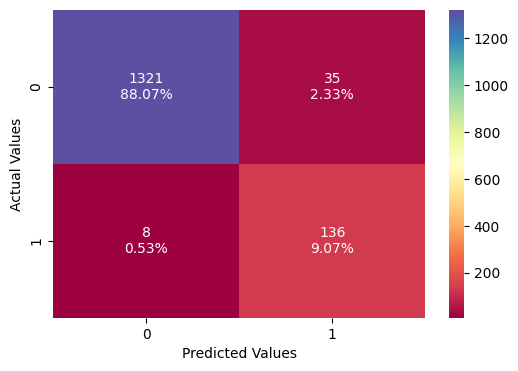

In [ ]:
#Model evaluation -  confusion matrix with test data [without outliers] for Postprune - Balanced Model
confusion_matrix_classification(estimator_balanced,treatedX_test,treatedY_test)

In [ ]:
#Model evaluation -  Accuracy,recall, Precision, F1 score with test data [without outliers] for Postprune - Balanced Model
perf_postpruneModel_balanced_WO_outliers_test = model_evaluation_classification(estimator_balanced,treatedX_test,treatedY_test)
perf_postpruneModel_balanced_WO_outliers_test

Accuracy    Recall  Precision        F1
0  0.971333  0.944444   0.795322  0.863492

Postprune - Balanced Model suffers from generalizability but has 0.944 Recall score and 0.863 F1 score. But when compared to postprune - customWeight model, this model has higher recall score but a bit lower on F1 score. Also, since it suffers from generalizability, this model wouldnt be an apt fit for our dataset.

## Model Performance Comparison and Final Model Selection

### Exhaustive Comparison - Including Dataset with and without Outliers

In [ ]:
#Exhaustive Comparison - Training Data - Including Dataset with and without Outliers
perf_models_train_comp_df = pd.concat([
    perf_defaultModel_outliers_train.T,
    perf_defaultModel_WO_outliers_train.T,
    perf_prepruneModel_customWeight_outliers_train.T,
    perf_prepruneModel_customWeight_WO_outliers_train.T,
    perf_prepruneModel_balanced_outliers_train.T,
    perf_prepruneModel_balanced_WO_outliers_train.T,
    perf_postpruneModel_customWeight_outliers_train.T,
    perf_postpruneModel_customWeight_WO_outliers_train.T,
    perf_postpruneModel_balanced_outliers_train.T,
    perf_postpruneModel_balanced_WO_outliers_train.T],axis=1
)
perf_models_train_comp_df.columns = ["DTree - default - Outliers","DTree - default - W/O Outliers",
                                  "DTree - Preprune - CustomWeight - Outliers","DTree - Preprune - CustomWeight - W/O Outliers",
                                  "DTree - Preprune - Balanced - Outliers","DTree - Preprune - Balanced - W/O Outliers",
                                  "DTree - Postprune - CustomWeight - Outliers","DTree - Postprune - CustomWeight - W/O Outliers",
                                  "DTree - Postprune - Balanced - Outliers","DTree - Postprune - Balanced - W/O Outliers"]
print("Training performance comparison:")
perf_models_train_comp_df

Training performance comparison:


DTree - default - Outliers  DTree - default - W/O Outliers  \
Accuracy                          1.0                             1.0   
Recall                            1.0                             1.0   
Precision                         1.0                             1.0   
F1                                1.0                             1.0   

           DTree - Preprune - CustomWeight - Outliers  \
Accuracy                                     0.970000   
Recall                                       0.979167   
Precision                                    0.770492   
F1                                           0.862385   

           DTree - Preprune - CustomWeight - W/O Outliers  \
Accuracy                                         0.970000   
Recall                                           0.979167   
Precision                                        0.770492   
F1                                               0.862385   

           DTree - Preprune - Balanced - Outliers  \
Accuracy                                 0.800000   
Recall                                   1.000000   
Precision                                0.324324   
F1                                       0.489796   

           DTree - Preprune - Balanced - W/O Outliers  \
Accuracy                                     0.800000   
Recall                                       1.000000   
Precision                                    0.324324   
F1                                           0.489796   

           DTree - Postprune - CustomWeight - Outliers  \
Accuracy                                      0.988857   
Recall                                        1.000000   
Precision                                     0.896000   
F1                                            0.945148   

           DTree - Postprune - CustomWeight - W/O Outliers  \
Accuracy                                          0.988857   
Recall                                            1.000000   
Precision                                         0.896000   
F1                                                0.945148   

           DTree - Postprune - Balanced - Outliers  \
Accuracy                                  0.982286   
Recall                                    1.000000   
Precision                                 0.844221   
F1                                        0.915531   

           DTree - Postprune - Balanced - W/O Outliers  
Accuracy                                      0.982286  
Recall                                        1.000000  
Precision                                     0.844221  
F1                                            0.915531

In [ ]:
#Exhaustive Comparison - Test Data - Including Dataset with and without Outliers
perf_models_test_comp_df = pd.concat([
    perf_defaultModel_outliers_test.T,
    perf_defaultModel_WO_outliers_test.T,
    perf_preprunemodel_customWeight_outliers_test.T,
    perf_preprunemodel_customWeight_WO_outliers_test.T,
    perf_preprunemodel_balanced_outliers_test.T,
    perf_preprunemodel_balanced_WO_outliers_test.T,
    perf_postpruneModel_customWeight_outliers_test.T,
    perf_postpruneModel_customWeight_WO_outliers_test.T,
    perf_postpruneModel_balanced_outliers_test.T,
    perf_postpruneModel_balanced_WO_outliers_test.T],axis=1)
perf_models_test_comp_df.columns = ["DTree - default - Outliers","DTree - default - W/O Outliers",
                                  "DTree - Preprune - CustomWeight - Outliers","DTree - Preprune - CustomWeight - W/O Outliers",
                                  "DTree - Preprune - Balanced - Outliers","DTree - Preprune - Balanced - W/O Outliers",
                                  "DTree - Postprune - CustomWeight - Outliers","DTree - Postprune - CustomWeight - W/O Outliers",
                                  "DTree - Postprune - Balanced - Outliers","DTree - Postprune - Balanced - W/O Outliers"]
print("Test set performance comparison:")
perf_models_test_comp_df

Test set performance comparison:


DTree - default - Outliers  DTree - default - W/O Outliers  \
Accuracy                     0.976667                        0.976667   
Recall                       0.833333                        0.833333   
Precision                    0.916031                        0.916031   
F1                           0.872727                        0.872727   

           DTree - Preprune - CustomWeight - Outliers  \
Accuracy                                     0.967333   
Recall                                       0.965278   
Precision                                    0.759563   
F1                                           0.850153   

           DTree - Preprune - CustomWeight - W/O Outliers  \
Accuracy                                         0.967333   
Recall                                           0.965278   
Precision                                        0.759563   
F1                                               0.850153   

           DTree - Preprune - Balanced - Outliers  \
Accuracy                                 0.816000   
Recall                                   1.000000   
Precision                                0.342857   
F1                                       0.510638   

           DTree - Preprune - Balanced - W/O Outliers  \
Accuracy                                     0.816000   
Recall                                       1.000000   
Precision                                    0.342857   
F1                                           0.510638   

           DTree - Postprune - CustomWeight - Outliers  \
Accuracy                                      0.976000   
Recall                                        0.937500   
Precision                                     0.833333   
F1                                            0.882353   

           DTree - Postprune - CustomWeight - W/O Outliers  \
Accuracy                                          0.976000   
Recall                                            0.937500   
Precision                                         0.833333   
F1                                                0.882353   

           DTree - Postprune - Balanced - Outliers  \
Accuracy                                  0.971333   
Recall                                    0.944444   
Precision                                 0.795322   
F1                                        0.863492   

           DTree - Postprune - Balanced - W/O Outliers  
Accuracy                                      0.971333  
Recall                                        0.944444  
Precision                                     0.795322  
F1                                            0.863492

Dataset with and without outliers - do not have any performance variation so, moving on to granular comparisons considering the outliers.

### Granular Comparison - Considering the dataset with Outliers

In [ ]:
#Granular Comparison - Training Data - Including Dataset with Outliers
perf_models_train_comp_df = pd.concat([
    perf_defaultModel_outliers_train.T,
    perf_prepruneModel_customWeight_outliers_train.T,
    perf_prepruneModel_balanced_outliers_train.T,
    perf_postpruneModel_customWeight_outliers_train.T,
    perf_postpruneModel_balanced_outliers_train.T ],axis=1
)
perf_models_train_comp_df.columns = ["DTree - default",
                                  "DTree - Preprune - CustomWeight",
                                  "DTree - Preprune - Balanced",
                                  "DTree - Postprune - CustomWeight",
                                  "DTree - Postprune - Balanced"]
print("Training performance comparison:")
perf_models_train_comp_df

Training performance comparison:


DTree - default  DTree - Preprune - CustomWeight  \
Accuracy               1.0                         0.970000   
Recall                 1.0                         0.979167   
Precision              1.0                         0.770492   
F1                     1.0                         0.862385   

           DTree - Preprune - Balanced  DTree - Postprune - CustomWeight  \
Accuracy                      0.800000                          0.988857   
Recall                        1.000000                          1.000000   
Precision                     0.324324                          0.896000   
F1                            0.489796                          0.945148   

           DTree - Postprune - Balanced  
Accuracy                       0.982286  
Recall                         1.000000  
Precision                      0.844221  
F1                             0.915531

In [ ]:
#Granular Comparison - Test Data - Including Dataset with Outliers
perf_models_test_comp_df = pd.concat([
    perf_defaultModel_outliers_test.T,
    perf_preprunemodel_customWeight_outliers_test.T,
    perf_preprunemodel_balanced_outliers_test.T,
    perf_postpruneModel_customWeight_outliers_test.T,
    perf_postpruneModel_balanced_outliers_test.T],axis=1)
perf_models_test_comp_df.columns = ["DTree - default",
                                  "DTree - Preprune - CustomWeight",
                                  "DTree - Preprune - Balanced",
                                  "DTree - Postprune - CustomWeight",
                                  "DTree - Postprune - Balanced"]
print("Test set performance comparison:")
perf_models_test_comp_df

Test set performance comparison:


DTree - default  DTree - Preprune - CustomWeight  \
Accuracy          0.976667                         0.967333   
Recall            0.833333                         0.965278   
Precision         0.916031                         0.759563   
F1                0.872727                         0.850153   

           DTree - Preprune - Balanced  DTree - Postprune - CustomWeight  \
Accuracy                      0.816000                          0.976000   
Recall                        1.000000                          0.937500   
Precision                     0.342857                          0.833333   
F1                            0.510638                          0.882353   

           DTree - Postprune - Balanced  
Accuracy                       0.971333  
Recall                         0.944444  
Precision                      0.795322  
F1                             0.863492

* DTree - Preprune - Balanced in Test gives ideal 1 recall score but F1 score is suffering as 0.51, but generalizes well when compared to its training [DTree - Preprune - Balanced]
* If there needs to be a trade off between Recall and F1 score, Either higher Recall and decent F1 score [OR] Decent Recall value and Higher F1 score could be considered
    * DTree - Postprune - CustomWeight with Recall as 0.9375 and F1 as 0.8823 OR
    * DTree - Preprune - CustomWeight with Recall as 0.9652 and F1 as 0.8501
* BUT BOTH DTree- **Postprune** - CustomWeight/Balanced class in Test DO NOT generalize well when compared to DTree - **PostPrune** - CustomWeight/Balanced - Training stats.
* So, the best model choices that generalize well and has a good performance stats are either
  * DTree - Preprune - Balanced Model with ideal 1 Recall score and F1 score as 0.51
  * DTree - Preprune - CustomWeight with Recall as 0.9652 and F1 as 0.8501



###Prediction and Final Model Chosen

####Loan Accepted TestCase

In [ ]:
%%time
positivetest_chk = Y_test[Y_test == 1].index.tolist()[:20]
applicant_details = X_test[X_test.index.isin(positivetest_chk)]
# 1st Model with Ideal Recall score: prepruneModel_balanced_outliers
# making a prediction
approval_prediction = prepruneModel_balanced_outliers.predict(applicant_details)

print("Prediction for Loan Approval:DTree Prepruned Model - Balanced Class Weight:\n" ,approval_prediction)

approval_likelihood = prepruneModel_balanced_outliers.predict_proba(applicant_details)

print("Prediction Likelihood in % for Loan Approval: DTree Prepruned Model - Balanced Class Weight: \n{} ".format(approval_likelihood[:,1] *100))

Prediction for Loan Approval:DTree Prepruned Model - Balanced Class Weight:
 [1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1]
Prediction Likelihood in % for Loan Approval: DTree Prepruned Model - Balanced Class Weight: 
[96.78800857 96.78800857 72.11685393 96.78800857 96.78800857 96.78800857
 72.11685393 72.11685393 96.78800857 96.78800857 96.78800857 56.97478992
 96.78800857 56.97478992 96.78800857 96.78800857 72.11685393 72.11685393
 96.78800857 72.11685393] 
CPU times: user 9.97 ms, sys: 0 ns, total: 9.97 ms
Wall time: 12.8 ms


In [ ]:
%%time
applicant_details = X_test[X_test.index.isin(positivetest_chk)]
  # 2nd Model with decent recall and F1 score: prepruneModel_customWeight_outliers
  # making a prediction
approval_prediction = prepruneModel_customWeight_outliers.predict(applicant_details)

print("Prediction for Loan Approval:DTree Prepruned Model - CustomWeight Class Weight: \n" ,approval_prediction)

approval_likelihood = prepruneModel_customWeight_outliers.predict_proba(applicant_details)

print("Prediction Likelihood for Loan Approval: DTree Prepruned Model - CustomWeight Class Weight: \n{}".format(approval_likelihood[:,1] *100))

Prediction for Loan Approval:DTree Prepruned Model - CustomWeight Class Weight: 
 [1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1]
Prediction Likelihood for Loan Approval: DTree Prepruned Model - CustomWeight Class Weight: 
[ 99.45828819  99.45828819  95.38461538  99.45828819  99.45828819
  99.45828819 100.         100.          99.45828819  99.45828819
  99.45828819  69.10569106  89.0052356   69.10569106  99.45828819
  99.45828819 100.         100.          99.45828819  95.38461538]
CPU times: user 9.33 ms, sys: 0 ns, total: 9.33 ms
Wall time: 10.3 ms


For a sample of 20 Positive Loan Accepted records in Test,
* DTree - Prepruned - Balanced Class Weighted Model predicts class 1 - Loan Accepted for all records and the probability of Loan Acceptance ranges from 96.8%[12 cases] - 72%[6 cases] - 56%[2 cases]
* **DTree - Prepruned - Customweight Class Weighted Model** predicts class 1 - Loan Accepted for all records and the probability of Loan Acceptance ranges from 100%[4 cases] - 99.45%[11 cases] - 95%[2 cases] - 89%[1 case] - 69%[2 cases]

* **DTree - Prepruned - Customweight Class Weighted Model** performs well for Positive Test cases though both models accurately predicted the class as Loan Accepted.

####Loan Not Accepted TestCase

In [ ]:
%%time
negativetest_chk = Y_test[Y_test == 0].index.tolist()[:20]
applicant_details = X_test[X_test.index.isin(negativetest_chk)]
# 1st Model with Ideal Recall score: prepruneModel_balanced_outliers
# making a prediction
loan_NotApproval_prediction = prepruneModel_balanced_outliers.predict(applicant_details)

print("Prediction for Loan not Accepted - DTree Prepruned Model - Balanced Class Weight:\n" ,loan_NotApproval_prediction)

loan_NotApproval_likelihood = prepruneModel_balanced_outliers.predict_proba(applicant_details)

print("Prediction Likelihood in % for Loan not Accepted: DTree Prepruned Model - Balanced Class Weight: \n{} ".format(loan_NotApproval_likelihood[:,0] *100))

Prediction for Loan not Accepted - DTree Prepruned Model - Balanced Class Weight:
 [0 0 0 1 0 0 1 0 0 0 0 0 0 0 0 1 0 1 0 1]
Prediction Likelihood in % for Loan not Accepted: DTree Prepruned Model - Balanced Class Weight: 
[100.         100.         100.          27.88314607 100.
 100.          43.02521008 100.         100.         100.
 100.         100.         100.         100.         100.
  27.88314607 100.          27.88314607 100.           3.21199143] 
CPU times: user 10.7 ms, sys: 0 ns, total: 10.7 ms
Wall time: 11.3 ms


In [ ]:
%%time
applicant_details = X_test[X_test.index.isin(negativetest_chk)]
  # 2nd Model with decent recall and F1 score: prepruneModel_customWeight_outliers
  # making a prediction
loan_NotApproval_prediction = prepruneModel_customWeight_outliers.predict(applicant_details)

print("Prediction for Loan not Accepted - DTree Prepruned Model - CustomWeight Class Weight: \n" ,loan_NotApproval_prediction)

loan_NotApproval_likelihood = prepruneModel_customWeight_outliers.predict_proba(applicant_details)

print("Prediction Likelihood for Loan not Accepted: DTree Prepruned Model - CustomWeight Class Weight: \n{}".format(loan_NotApproval_likelihood[:,0] *100))

Prediction for Loan not Accepted - DTree Prepruned Model - CustomWeight Class Weight: 
 [0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0]
Prediction Likelihood for Loan not Accepted: DTree Prepruned Model - CustomWeight Class Weight: 
[100.         100.         100.          96.59318637 100.
 100.          30.89430894 100.         100.         100.
 100.         100.         100.         100.         100.
  96.59318637 100.          96.59318637 100.          64.94845361]
CPU times: user 8.15 ms, sys: 0 ns, total: 8.15 ms
Wall time: 8.9 ms


For a sample of 20 Negative Loan Not Accepted records in Test
* DTree - Prepruned - Balanced Class Weighted Model predicts class 0 - Loan Not Accepted for 75% of records and the probability of Loan Not Accepted ranges from 100%[15 cases] - 43%[1 case] - 27%[3 cases] - 3%[1 case]
* **DTree - Prepruned - Customweight Class Weighted Model** predicts class 0 - Loan Not Accepted for 75% of the records as well and the probability of Loan Not Accepted ranges from 100%[15 cases] - 96.5%[3 cases] - 64.9%[1 cases] - 30.8%[1 case]

* **DTree - Prepruned - Customweight Class Weighted Model** performs well for Negative Test cases though both models has same accuracy with prediction but probability of prediction is better with customWeight Model.

#### Final Model chosen

* **Final Model:** **DTree - Prepruned - Customweight Class Weighted Model**[Recall: 0.965, F1 score: 0.85]
  * Performs well for both postive and Negative Test cases though both models has same accuracy with prediction but probability of prediction is better with Prepruned - customWeight Model.
  * Gives result in less than half a second
  * Also, Prepruned-customWeight model generalizes well when compared to its training data and has a good performance stats, though it does not have a 1 recall score as Prepruned - Balanced Model[Recall: 1, F1 Score: 0.51], it has a very well decent balance in both Recall and F1 score and high likelihood of loan approval predictions.
* Second Best: **DTree - Prepruned - Balanced Class Weighted Model**[Recall: 1, F1 score: 0.51], **If business prefers higher recall as the ONLY parameter**, they can choose to go with this model as well, but the reasons for this being second best are
  * F1 score is very low, indicating lot of False positives, leading to unintended Business expenditure in non targetted customer base. It matters if there is a tight budget.
  * Prediction Likelihood of Loan Approval is lower when compared to customWeight model.
* Both of these models generalizes well against training data and perform equally well.

## Actionable Insights and Business Recommendations


#### Insights on chosen Model

* Final Model: **DTree - Prepruned - Customweight Class Weighted Model**[Recall: 0.965, F1 score: 0.85]
    * Performs well for both postive and Negative Test cases though both models has same accuracy with prediction but probability of prediction is better with Prepruned - customWeight Model.
    * Also, Prepruned-customWeight model generalizes well and has a good performance stats, though it does not have a 1 recall score as Prepruned - Balanced Model[Recall: 1, F1 Score: 0.51], it has a very well decent balance in both Recall and F1 score and high likelihood of loan approval predictions than the Prepruned - Balanced Model.
    * Gives result in less than half a second
* Second Best: **DTree - Prepruned - Balanced Class Weighted Model**[Recall: 1, F1 score: 0.51], **If business prefers higher recall as the ONLY parameter**, they can choose to go with this model as well, but the reasons for this being second best are
  * F1 score is very low, indicating lot of False positives, leading to Business expenditure in unintended customer base.
  * Prediction Likelihood of Loan Approval is lower when compared to customWeight model.
* Both of these models generalizes well against training data and perform equally well.

* Instead of outputting an approve or reject, the model can be made to output the likelihood of approval.

* In case the likelihood of approval is below a certain threshold, say 60%, then the customer record can be reviewed manually with the below identified target segments and dealt with accordingly.

* This would reduce the overall TAT in identifying the potential customer who will purchase a loan.




####Customer Attributes Driving the purchase

Below are the customer attributes influencing the Loan purchase. Final model chosen is highlighted but attributes driving the purchase of loan are the same,in fact, better assessed with the chosen Model
- Preprune Balanced Model :
  * Income - 87%
  * Average Amount spent on Credit Cards  - 8%
  * Family - 5%
* **Preprune CustomWeight Model**:
  * Income - 63%
  * Education - Graduate Level - 16.5%
  * Education - Advanced/Professional Level - 8%
  * Family - 6.2%
  * Average Amount spent on Credit Cards - 5.3%
  * Age - 0.7%




#### Customer Segment for Targetting

Customer segment to target for purchasing a loan,

**- With Preprune CustomWeight Model** :
* There are 5 Income brackets which could be focussed on
  * Low [L] -> Lesser/Equal to 81.5K [0K - 81.5K]
  * Low to Middle [L2M] -> Higher than 81.5K but less than 98.5K -> [81.5K - 98.5K]
  * Middle to High : Contains 2 ranges.
    * [M2Ha] -> [98.5K - 112.5K]
    * [M2Hb] -> [98.5K - 116.5K]
  * High : Contains 2 ranges
    * [Ha] -> [112.5K - ]
    * [Hb] -> [116.5K - ]

* Target Low Income Customers[L] with
  * Age younger than 36.5 Years and Average Amount spent in CreditCard is higher than 2.95K
* Target Low to Middle Income Customers [L2M] with
  * Average Amount spent in CreditCard is lesser than 4.4K,so when they purchase a loan, they have the capacity to pay interests as well.
* Target Middle to High Income customers [M2Ha] with
  * Family size is greater than 2 and Average Amount spent in CreditCard is lesser than 2.75K
* Target Middle to High Income customers [M2Hb] with
  * Family with 2 persons or less but with an Advanced Degree in the household.
* Target High Income customers [Ha] with
  * Age higher than 25.5Years with a Family of more than 2 persons in the household.
* Target High Income customers [Hb] with
  * Family with 2 persons or less but with an Advanced Degree in the household.
* Target Income of 98.5K or higher with
 * Family with 2 persons or less but just with a Graduate degree but not an Advanced Degree in the household.

**- With Preprune Balanced Model**: Though not the final model chosen, this is the second best model that exhibits similar behavior
  * Customers with Income range higher than 98.5K irrespective of Family size,
    * Probability for purchasing a loan is even higher when Family size is greater than 2.,
  * Customers with Income range less than 98.5K and Average Amount spent in Credit card is higher than 2.95K